<div align="center">

# **Systematic Fundamental Alpha Capture**

*An Exploration into developing an alpha capture model, using principal axis factoring. The goal of our project is to determine unique alphas from multiple different strategies and constructs an optimal portfolio.*

<br>

**Contributors**  
Arjun Doshi &emsp; Arohan Sharma &emsp; Ayush Singh &emsp; Sahil Nayyar &emsp; Tyler McLaughlin

</div>

---

### ✅ Project Requirements  
- ✅ *Non-Traditional Data Sources:* Uses fundamental information (analyst ratings, insider ownership, sentiment) rather than standard Twitter, equity prices, VWAPs, or volumes.  
- ✅ *Diverse Asset Holdings:* Simultaneously holds at least five distinct assets (e.g., different currencies, commodities, option maturities/strikes).  
- ✅ *Sufficient Trade Activity:* Generates 40 or more trades over the analysis period without excessive clustering.  
- ✅ *Leverage & Risk Control:* Employs leverage with documented and reasonable capital and risk control assumptions.  
- ✅ *Implementation in R/Python:* The strategy is fully expressed and executed using either R or Python.  

### 🚀 Extended Enhancements  
- 🔥 *Advanced Alpha Generation:* Developed multi-layer fundamental alpha capture models by integrating analyst ratings, insider ownership, and sentiment signals.  
- 📈 *Dynamic Portfolio Optimization:* Constructed a portfolio optimization framework with factor-neutral constraints using principal axis factoring to minimize volatility.  
- 💰 *Realistic Transaction Cost Modeling:* Incorporated transaction cost estimates (5bps) that account for slippage, market impact, and adverse selection.  
- 🛠 *Customized Backtesting Engine:* Built a backtesting system that stress-tests performance over different business cycles and adapts to changing market conditions.  
- 🔍 *Overfitting Prevention:* Implemented regularization techniques and factor exposure constraints to mitigate overfitting and ensure robust out-of-sample performance.  


# Table of Contents

## 1. Introduction
- <a href="#1-1" class="toc-link">1.1 Idea & Motivation</a>
- <a href="#1-2" class="toc-link">1.2 Conceptual Framework</a>
  - 1.2.1 Stock Selection Framework</a>
  - 1.2.2 Principal Axis Factoring (PAF) for Market Neutrality</a>
- <a href="#1-3" class="toc-link">1.3 Methodology</a>
  - 1.3.1 Data Sources</a>
  - 1.3.2 Signal Construction</a>
  - 1.3.3 Stock Selection</a>
  - 1.3.4 Portfolio Construction & Optimization</a>
  - 1.3.5 Execution & Monitoring</a>

## 2. Imports and Loading Data
- <a href="#2-0" class="toc-link">2.0 Imports</a>
- <a href="#2-1" class="toc-link">2.1 Read in Analyst Ratings and Russell 1000 Returns</a>
- <a href="#2-2" class="toc-link">2.2 Read in Insider Ownership</a>
- <a href="#2-3" class="toc-link">2.3 Read in Sentiment Scores</a>
- <a href="#2-4" class="toc-link">2.4 Read in SVOL, SPY, and Fama French Factors</a>

## 3. Data Processing and EDA for Analyst Ratings and Russell 1000 Returns
- <a href="#3-0" class="toc-link">3.0 Overview and Rationale</a>

## 4. Analyst Ratings Analysis
- <a href="#4-1" class="toc-link">4.1 Analyst Ratings Strategy</a>
- <a href="#4-2" class="toc-link">4.2 Analyst Ratings Strategy Backtest</a>

## 5. Data Processing and EDA for Insider Ownership
- <a href="#5-0" class="toc-link">5.0 Overview</a>
- <a href="#5-1" class="toc-link">5.1 Analyzing Alpha Potential</a>
- <a href="#5-2" class="toc-link">5.2 Data Processing and Signal Generation</a>

## 6. Analysing Insider Ownership
- <a href="#6-0" class="toc-link">6.0 Overview</a>
- <a href="#6-1" class="toc-link">6.1 Constructing Simple Long-Short Insider Ownership Strategy</a>
- <a href="#6-2" class="toc-link">6.2 Testing and Benchmarking Against Fama–French Factors</a>

## 7. Data Processing and EDA for Sentiment Scores
- <a href="#7-0" class="toc-link">7.0 Overview</a>

## 8. Sentiment Scores Analysis
- <a href="#8-1" class="toc-link">8.1 Sentiment Scores Strategy</a>
- <a href="#8-2" class="toc-link">8.2 Investor Sentiment Strategy Backtest</a>

## 9. Principal Axis Factoring
- <a href="#9-0" class="toc-link">9.0 Overview</a>
- <a href="#9-1" class="toc-link">9.1 Principal Axis Factoring (PAF) – `paf`</a>
- <a href="#9-2" class="toc-link">9.2 Compute Angle Matrix – `compute_angle_matrix`</a>
- <a href="#9-3" class="toc-link">9.3 Find Columns In Range – `find_columns_in_range`</a>
- <a href="#9-4" class="toc-link">9.4 Factor Decomposition Function – `factor_decomposition`</a>
- <a href="#9-5" class="toc-link">9.5 Summary</a>

## 10. Portfolio Optimization
- <a href="#10-0" class="toc-link">10.0 Overview</a>

## 11. Combined Scores
- <a href="#11-0" class="toc-link">11.0 Overview</a>
- <a href="#11-1" class="toc-link">11.1 `combine_ratings` Function</a>

## 12. Strategy Backtest
- <a href="#12-1" class="toc-link">12.1 Methodology Overview</a>
- <a href="#12-2" class="toc-link">12.2 Implementation Details</a>
- <a href="#12-3" class="toc-link">12.3 Configuration and Parameters</a>
- <a href="#12-4" class="toc-link">12.4 Additional Analysis: Summary Statistics and Visualization</a>
- <a href="#12-5" class="toc-link">12.5 Summary</a>
- <a href="#12-6" class="toc-link">12.6 Strategy Analysis</a>
- <a href="#12-7" class="toc-link">12.7 Performance Analysis</a>

# 1 Introduction

<br> 

## 1.1 Idea & Motivation <a id="1-1"></a>

The core idea behind this strategy is to extract alpha from sell-side analyst ratings while ensuring market neutrality through principal axis factoring (PAF). Sell-side analysts provide ratings on stocks, and their updates often contain valuable information about expected future performance. By systematically capturing signals from these ratings and filtering out market-wide risk factors, we aim to construct a portfolio with pure alpha exposure aimed at exclusively capturing the alpha coming from fundamental research.

Additionally, we incorporate insider ownership changes as an auxiliary signal. Corporate insiders typically have a deeper understanding of their company's fundamentals. If insiders are increasing their ownership, it can be considered a bullish signal, whereas a decrease in ownership can be interpreted as a bearish signal. Combining these two signals, we create an aggregate indicator to drive our stock selection and portfolio construction. This signal further augments our alpha from fundamental ratings by research analysts as those ratings are not frequently updated and are on a discrete scale from 1-5 indicating there's a lot of room for interpretation (e.g. a 4-rated stock may be a buy moving to a 5, a strong-buy, or moving to a 3, hold, rating). We can further add more signals to the strategy to further augment our research rating signal to try to gauge the 'momentum' (where might the rating go in the future) of research ratings.

The primary motivation is to develop a market-neutral strategy that maximizes alpha while minimizing exposure to systematic risk factors. This aligns with quantitative investment methodologies that seek to isolate idiosyncratic stock performance from broader market trends. Most traditional absolute return strategies aim to neutralize exposure to known factors like the Fama-French Factors or those provided by MSCI Barra. Our hypothesis with this project, though, is that the factors, and their associated risk premia, are often dynamic and, thus, treating the factors as static is not an ideal solution. We thus try to compute 'statistical' factors and try to compute 'principal components' of our universe of assets which explain most of the variance of assets in our universe. However, instead of using the traditional Principal Component Analysis approach, which assumes that the principal components _completely_ explain all the variance in the market and that there is no idiosyncratic variance attached to stocks themselves, we use an alternative approach called the 'Pricipal Axis Factoring' (PAF). PAF assumes that there is an idiosyncratic component to variance of assets and adjusts the correlation matrix accordingly by replacing the diagonal elements with something called 'communalities'. We will explain this further in the next section.

## 1.2 Conceptual Framework <a id="1-2"></a>

### 1.2.1 Stock Selection Framework
Sell-side analysts adjust their ratings based on new information, including earnings reports, industry trends, and macroeconomic changes. Insider ownership further augments this information as company insiders may be quicker to adapt to changes in company fundamentals. We first create factor scores by normalizing research ratings data and insider ownership data:

$$
Research \; Score = z_{score}(Bloomberg \; Ratings)
$$
$$
Insider \; Score = z_{score}(\Delta Insider \; Ownership)
$$

$$
Sentiment \; Score = z_{score}(Sentiment \; Score)
$$

We then create a combined score by equally weighting these two scores:
$$

Combined \; Score = {(Research \; Score + Insider \; Score + Sentiment \; Score)\over3}
$$

We have more details in 11.2 

Through the course of this analysis, we will try different weighting schemes for combining these individual signals. We will use this combined score for identifying investment opportunities and stocks we may want to go long or short on.

### 1.2.2 Principal Axis Factoring (PAF) for Market Neutrality
To ensure our portfolio is market-neutral, we extract the primary market risk factors using Principal Axis Factoring (PAF). Given a return matrix $ X $, the covariance matrix $ \Sigma $ is decomposed as:
$$
\Sigma = \Lambda \Lambda' + \Psi
$$
where $ \Lambda $ represents factor loadings, and $ \Psi $ is the specific variance matrix. We extract the first $ k $ components that explain the most variance and construct our portfolio such that exposure to these factors is minimized. The essential difference from standard PCA is the specific variance matrix, $\Psi$. We implement this approach by using 'communalities'. The diagonal of a correlation matrix is always 1, which is an asset's correlation to itself. It can be broken down as follows:
$$
communality + idiosyncratic\; volatility\; component = 1
$$

The 'communalities' ($u$) are the proportion of variance explained through the common factors in the market. Thus, for Principal Axis Factoring, we replace the diagonal of the correlation matrix with the vector of communalities $u$. We start with an initial estimate of communalities and iteratively apply Singular Value Decomposition such that each communality is the sum of squared factor loadings. We run the iterations until we hit our tolerance level. The communalities are computed as follows:
1. Start with an initial estimate $u_0$
2. Reduce the correlation matrix: $\Sigma_{adj} = \Sigma - I + diag(u_0)$
3. Apply Singular Value Decomposition to the correlation matrix: $\Sigma_{adj} = Q\Lambda Q^{-1}$
4. Compute Factor Loadings by adjusting with the factor variances: $F=Q\Lambda^{0.5}$
5. Compute new communalities, u_t, as sum of squared factor loadings (for each asset)
6. Repeat till $|u_t - u_{t-1}| <= 10^{-3}$

This process will give us $k$ principal components which we will treat as our factors. We now decompose the return of each assets as follows:
$$
r_{i} = \beta R^k + \alpha_i +  \epsilon_i
$$

Where $R^k$ is the matrix of factor returns computed using the principal components. For market neutrality, we regress our portfolio's returns and short the $\beta$ exposures to the computed principal components. We define the optimization problem as follows:
$$
\min \sigma_p
$$
$$
Subject \; To:
$$
$$
\beta = 0
$$

We restrict our buy-universe to the top performing stocks according to our buy signal and the short-universe as the bottom performing stocks. The objective of minimizing volatility of the portfolio is in line with the idea of a market neutral strategy such that we are generating a virtually 'risk-free' return capturing only the $\alpha$. For practical considerations, we'll also add a min/max weight constraint so that we don't get a trivial 0 allocation portfolio.

### References:
- Fama, E. F., & French, K. R. (1993). *Common risk factors in the returns on stocks and bonds.*
- Jegadeesh, N., & Titman, S. (1993). *Returns to buying winners and selling losers: Implications for stock market efficiency.*
- Asquith, P., Mikhail, M. B., & Au, A. S. (2005). *Information content of equity analyst reports.*

## 1.3 Methodology <a id="1-3"></a>

### 1.3.1 Data Sources
- **Bloomberg**: Sell-side analyst ratings and market returns
- **Bloomberg**: Insider ownership changes
- **Google Trends Data**: Sentiment Analysis
- **Yahoo Finance**: Google Trends Data

### 1.3.2 Signal Construction
1. **Analyst Ratings Signal**: Compute changes in analyst ratings and normalize them across stocks.
2. **Insider Ownership Signal**: Compute percentage changes in insider ownership and normalize.
3. **Google Trends Signal**: Extract Google Trends data and normalize.
4. **Aggregate Signal**: Combine the three signals using a weighted sum approach.

### 1.3.3 Stock Selection
- **Long Portfolio**: Top 40/50/100 stocks based on the aggregate signal.
- **Short Portfolio**: Bottom 40/50/100 stocks based on the aggregate signal.

### 1.3.4 Portfolio Construction & Optimization
1. Compute factor loadings from historical returns using PAF and extract the top $ k $ components.
2. Optimize the portfolio to minimize volatility while ensuring:
   - Net market exposure is zero.
   - Exposure to top $ k $ market factors is zero.
3. Implement a rebalance frequency (weekly, monthly, or quarterly).

### 1.3.5 Execution & Monitoring
- Backtest strategy performance over multiple timeframes.
- Evaluate Sharpe ratio, alpha, and factor neutrality.
- Regularly update the model parameters based on new data.

This methodology provides a structured approach to capturing alpha from analyst ratings while systematically neutralizing exposure to known market factors.

# 2 Imports and Loading Data

## 2.0 Imports <a id="2-0"></a>

In [1]:
import os
import datetime
import quandl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import plotnine as p9
import sys
sys.path.append(os.path.abspath("modules"))
import quandl
from backtest import BacktestEngine # Custom python file included in submission
import matplotlib.pyplot as plt
from itertools import product
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import cvxpy as cp
from scipy.stats import skew, kurtosis
warnings.filterwarnings("ignore")

In [2]:
DATA_DIR =  r"E:\PendriveBackup\Arjun2\CodingFiles-Arjun\ComputerScience\MSFM\Q2\QTS\proj\data" # Path to the data directory
DATA_PATH = lambda filename: os.path.join(DATA_DIR, filename)

## 2.1 Read in Analyst Ratings and Russell 1000 Returns <a id="2-1"></a>

**Data Source:**  
  Both of the dataframes shown below were generated using Python scripts that retrieve data directly from Bloomberg. We refer to the data extraction script as `name_example`, which uses the Bloomberg API calls and data formatting logic.

In [3]:
ratings = pd.read_csv(DATA_PATH("russell_1000_analyst_ratings.csv"), index_col=0)
returns = pd.read_csv(DATA_PATH('russell_1000_retuns.csv'), index_col=0)

In [4]:
ratings.head(2)

,VRSK US Equity,VZ US Equity,RCL US Equity,JPM US Equity,LII US Equity,KO US Equity,DIS US Equity,IBM US Equity,JNJ US Equity,LPLA US Equity,...,TWKS US Equity,ST US Equity,WDAY US Equity,IPGP US Equity,LIN US Equity,AWI US Equity,LOPE US Equity,AVT US Equity,SAIC US Equity,TMUS US Equity
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,3.632,3.5,4.5,3.464,2.579,4.077,4.394,3.400,4.182,3.833,...,NaN,3.455,3.816,3.923,3.727,3.444,5.0,2.778,4.636,4.478
2020-01-07,3.737,NaN,NaN,3.379,2.579,4.077,NaN,3.417,4.182,NaN,...,NaN,3.455,NaN,NaN,3.727,NaN,NaN,NaN,4.600,4.565


In [5]:
returns.head(2)

,VRSK US Equity,VZ US Equity,RCL US Equity,JPM US Equity,LII US Equity,KO US Equity,DIS US Equity,IBM US Equity,JNJ US Equity,LPLA US Equity,...,TWKS US Equity,ST US Equity,WDAY US Equity,IPGP US Equity,LIN US Equity,AWI US Equity,LOPE US Equity,AVT US Equity,SAIC US Equity,TMUS US Equity
date,,,,,,,,,,,,,,,,,,,,,
2022-10-28,0.026699,0.041182,0.046700,0.011878,0.043099,0.020662,0.014458,0.027751,0.014857,0.031108,...,0.024573,0.016390,0.015524,0.03031,0.029121,0.007215,0.148663,0.015455,0.032371,0.073740
2022-10-31,0.009441,-0.007964,0.013482,-0.001587,-0.016216,-0.014978,0.005569,-0.001588,-0.005147,-0.017449,...,0.002086,-0.002481,-0.011608,-0.01946,-0.014745,0.002254,0.002990,0.002746,0.011011,0.003709


## 2.2 Read in Insider Ownership <a id="2-2"></a>

In [6]:
df = pd.read_csv(DATA_PATH('historical_insider_data.csv'), parse_dates=['Date'])

In [7]:
df.head(2)

,Date,PCT_INSIDER_SHARES_OUT,Ticker
0,2015-03-08,0.385,A US Equity
1,2015-03-08,0.314,AA US Equity


## 2.3 Read in Sentiment Scores <a id="2-3"></a>

In [8]:
sentiment = pd.read_csv(DATA_PATH('google_trends_data.csv'), index_col=0)

In [9]:
sentiment.head(2)

,VRSK,VZ,RCL,JPM,LII,KO,DIS,IBM,JNJ,LPLA,...,ZEN,ST,WDAY,IPGP,LIN,AWI,LOPE,AVT,SAIC,TMUS
date,,,,,,,,,,,,,,,,,,,,,
2022-08-28,0,0,0,45,0,41,69,31,66,0,...,78,0,0,0,31,0,0,0,0,0
2022-09-04,0,0,0,50,0,39,70,0,64,0,...,71,0,0,0,21,0,0,0,0,0


## 2.4 Read in SVOL, SPY, and Fama French Factors <a id="2-4"></a>

In [10]:
def grab_quandl_table(
    table_path,
    avoid_download=False,
    replace_existing=False,
    date_override=None,
    allow_old_file=False,
    **kwargs,
):
    root_data_dir = os.path.join(os.environ["HOME"], "quandl_data_table_downloads")
    data_symlink = os.path.join(root_data_dir, f"{table_path}_latest.zip")
    if avoid_download and os.path.exists(data_symlink):
        print(f"Skipping any possible download of {table_path}")
        return data_symlink
    
    table_dir = os.path.dirname(data_symlink)
    if not os.path.isdir(table_dir):
        print(f'Creating new data dir {table_dir}')
        os.mkdir(table_dir)

    if date_override is None:
        my_date = datetime.datetime.now().strftime("%Y%m%d")
    else:
        my_date = date_override
    data_file = os.path.join(root_data_dir, f"{table_path}_{my_date}.zip")

    if os.path.exists(data_file):
        file_size = os.stat(data_file).st_size
        if replace_existing or not file_size > 0:
            print(f"Removing old file {data_file} size {file_size}")
        else:
            print(
                f"Data file {data_file} size {file_size} exists already, no need to download"
            )
            return data_file

    dl = quandl.export_table(
        table_path, filename=data_file, api_key="ecBW7z975yUCSJz6yczx", **kwargs
    )
    file_size = os.stat(data_file).st_size
    if os.path.exists(data_file) and file_size > 0:
        print(f"Download finished: {file_size} bytes")
        if not date_override:
            if os.path.exists(data_symlink):
                print(f"Removing old symlink")
                os.unlink(data_symlink)
            print(f"Creating symlink: {data_file} -> {data_symlink}")
            os.symlink(
                data_file, data_symlink,
            )
    else:
        print(f"Data file {data_file} failed download")
        return
    return data_symlink if (date_override is None or allow_old_file) else "NoFileAvailable"


def fetch_quandl_table(table_path, avoid_download=True, **kwargs):
    return pd.read_csv(
        grab_quandl_table(table_path, avoid_download=avoid_download, **kwargs)
    )
# prices = fetch_quandl_table('QUOTEMEDIA/PRICES',avoid_download=False)


In [11]:
svol = pd.read_csv(DATA_PATH('svol.csv'), index_col=0)
spy_df = pd.read_csv(DATA_PATH('spy_df.csv'), index_col=0)
spy_df = spy_df.reset_index()
spy_df = spy_df.rename(columns={'date': 'Date'})
spy_df = spy_df.rename(columns={'adj_close': 'Adj Close'})

In [12]:
fama_french = pd.read_csv(DATA_PATH('F-F_Research_Data_Factors_daily.csv'))
fama_french = fama_french.iloc[:-2]
fama_french.rename(columns={fama_french.columns[0]: 'date'}, inplace=True)
fama_french['date'] = pd.to_datetime(fama_french['date'], format='%Y%m%d')
fama_french = fama_french.iloc[:, :-1]

# 3 Data Processing and EDA for Analyst Ratings and Russell 1000 Returns <a id="3-0"></a>

**Rationale for Forward Filling Analyst Ratings:**  
  Analyst ratings typically don't change on a daily basis; they remain valid until a new rating is issued. Forward filling propagates the most recent available rating across subsequent days with missing values, ensuring that the entire time series has an associated rating. This approach is valuable when merging or comparing the ratings with other time-series data, such as returns, to maintain consistency in the analysis.

**Rolling Annualized Returns:**  
  The function first annualizes a series of average returns by multiplying them by 252 (the approximate number of trading days in a year). Then, it uses a rolling window method to compute the moving average of these annualized returns over a specified window size (defaulting to 5). The rolling mean method provides a smooth, aggregated view of the returns over time, which can help in understanding trends and reducing noise in the data. Both of these measures make it easier to visualize and understand the data.


In [13]:
ratings.index = pd.to_datetime(ratings.index)
returns.index = pd.to_datetime(returns.index)
ratings = ratings.asfreq('D')
ratings = ratings.ffill()


def rolling_annualized_returns(average_returns, window=5):
    annualized_returns = average_returns * 252
    rolling_week_returns = annualized_returns.rolling(window=window).mean()
    return rolling_week_returns

**Rationale for Shifting Ratings:**  
  Shifting the ratings ensures that the analyst ratings from the previous day (day t-1) are used to make trading decisions for today (day t). This mirrors a realistic scenario where traders base their decisions on the most recent information available at the time.

In [14]:
ratings = ratings.shift(1)
ratings = ratings[ratings.index >= returns.index[0]]

**Average Ratings Calculation and Visualization:**  
  The code computes the daily average ratings by taking the mean across different ratings entries (using `axis=1`). It then plots these average ratings over time. This visualization serves to capture overall market sentiment or consensus among analysts on a given day.

**Average Returns Calculation and Rolling Annualization:**  
  Similarly, the code calculates the daily average returns. It then applies a rolling window method to compute the annualized returns over a 7-day window. This rolling annualization smooths out short-term fluctuations, highlighting longer-term performance trends.

**Why Visualizing Both Together Makes Sense:**  
  By visualizing average ratings (sentiment) alongside average annualized returns (performance), one can intuitively assess how changes in analyst opinions correlate with market performance. This side-by-side comparison can reveal if shifts in sentiment are followed by changes in returns, providing valuable insights into market behavior.


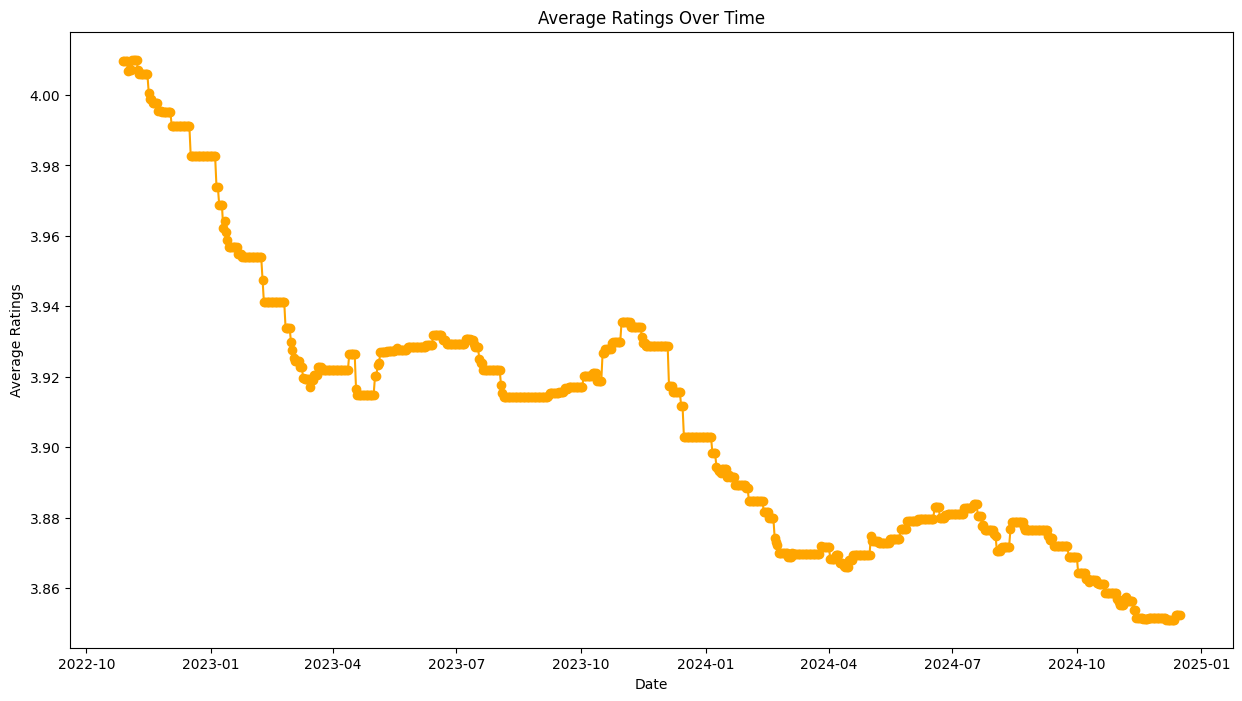

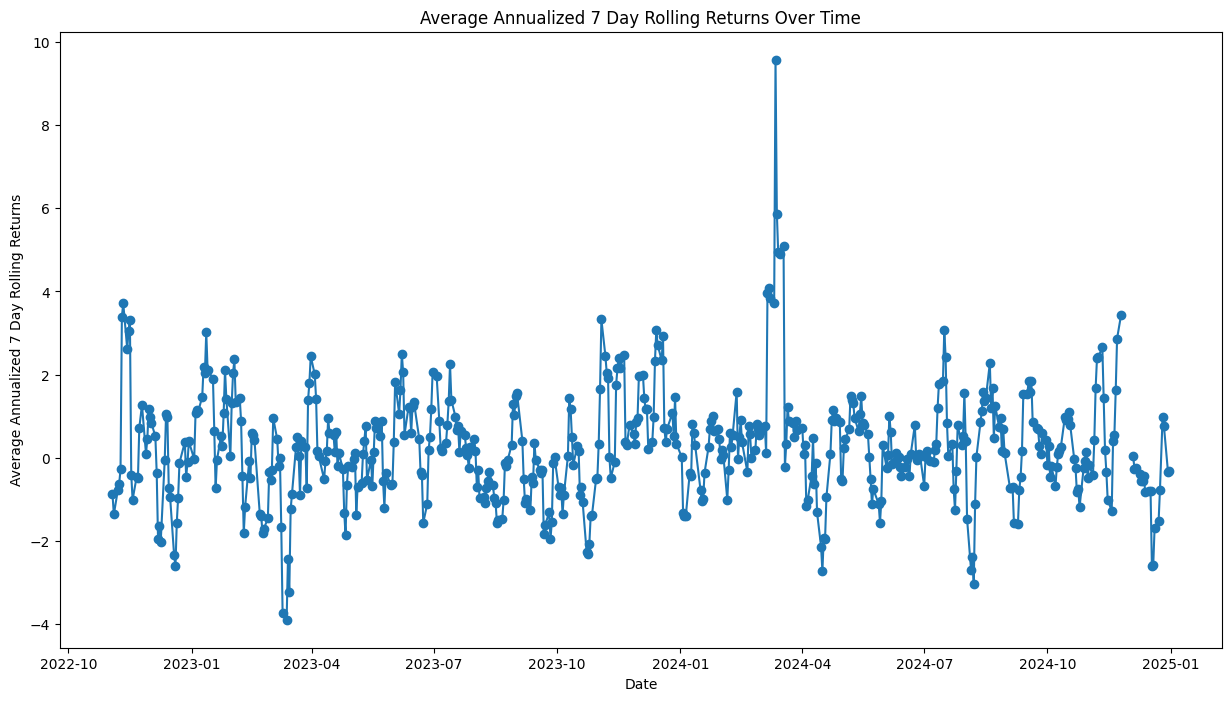

In [15]:
average_ratings = ratings.mean(axis=1)

plt.figure(figsize=(15, 8))
plt.plot(average_ratings.index, average_ratings, marker='o', linestyle='-', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Average Ratings')
plt.title('Average Ratings Over Time')
plt.show()

average_returns = returns.mean(axis=1)
rolling_week_returns = rolling_annualized_returns(average_returns)

plt.figure(figsize=(15, 8))
plt.plot(rolling_week_returns.index, rolling_week_returns, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Annualized 7 Day Rolling Returns')
plt.title('Average Annualized 7 Day Rolling Returns Over Time')
plt.show()

**Analysis of Average Ratings Over Time (Top Chart):**  
- The average ratings start relatively low in 2020 but trend upward, reaching a peak in early 2022. This suggests a period where analysts became increasingly optimistic about the rated assets.  
- After peaking in 2022, ratings gradually decline, indicating a shift in sentiment as analysts become more cautious or bearish.  
- The steady downward trend into 2024 and 2025 may reflect deteriorating fundamentals, external macroeconomic conditions, or market corrections that led analysts to lower their ratings over time.  
- Notably, even during the decline, there are periods of stabilization where ratings temporarily level off before resuming their downward trajectory.

**Analysis of Average Annualized 7-Day Rolling Returns (Bottom Chart):**  
- Unlike the relatively smooth trend in ratings, the rolling annualized returns exhibit significant fluctuations, with multiple spikes and dips.  
- Returns remain mostly within a range of -4% to 6%, but a sharp spike occurs around early 2024, briefly exceeding 9%. This could be attributed to a sudden market rally, earnings surprises, or major economic events.  
- Following the spike, returns quickly revert to a more volatile but lower range, suggesting that gains were short-lived and possibly unsustainable.  
- The overall pattern suggests that returns do not always move in direct alignment with analyst ratings—implying that other factors, such as market conditions and investor sentiment, influence short-term performance.

**Relationship Between Ratings and Returns**   
- The peak in analyst ratings (2022) does not directly correspond to a sustained period of high returns. Instead, returns remain volatile, suggesting that high ratings do not guarantee strong future performance.  
- While the average ratings gradually taper off, the returns show periodic peaks and valleys. This discrepancy can arise when analyst sentiment reacts more slowly to market conditions, or when external factors (macroeconomic shifts, sector-specific news, etc.) drive returns independently of analyst opinions.  
- Notably, a declining trend in analyst ratings does not always align with immediate dips in returns, highlighting that sentiment and performance can diverge in the short term. Over longer horizons, however, sustained changes in sentiment often coincide with shifts in market performance.
- Overall, while analyst ratings provide a long-term sentiment indicator, returns are more dynamic and influenced by multiple factors beyond just analyst sentiment.

# 4 Analyst Ratings Analysis

## 4.1 Analyst Ratings Strategy <a id="4-1"></a>

**Function Purpose:**  
This function, `get_top_n_stats`, iterates over each row of a DataFrame to extract statistical information for either the highest or lowest n values in that row. It returns a list of tuples containing the row index, the average of the selected values, and the columns from which these values were chosen.

**Row Iteration and Value Selection:**  
For each row in the DataFrame, the function uses pandas’ built-in methods to select values:  
- If the mode is set to `'top'`, it selects the n largest values using `nlargest(n)`.  
- If the mode is set to `'bot'`, it selects the n smallest values using `nsmallest(n)`.  

**Aggregation and Data Collection:**  
After selecting the appropriate values, the function computes the mean of these values and collects the corresponding column names. It then stores this aggregated information as a tuple (row index, average value, list of column names) in a results list.

**Return of Results:**  
Finally, the function returns the list of tuples, effectively summarizing the top or bottom n statistics for each row in the DataFrame.

In [16]:
def get_top_n_stats(df, n, mode='top'):
    results = []
    for idx, row in df.iterrows():
        if mode == 'top':
            chosen_n = row.nlargest(n)
        elif mode == 'bot':
            chosen_n = row.nsmallest(n)
        avg = chosen_n.mean()
        cols = list(chosen_n.index)
        results.append((idx, avg, cols))
    return results

**Function Purpose:**  
The `extract_cumulative_returns_from_top_columns` function computes the cumulative returns over a specified holding period for a set of selected top columns. It aligns rebalance dates from `top_stats` with corresponding returns data from `returns_df` and calculates the cumulative performance over the next `rebalance_period` days.

**Row Matching and Index Handling:**  
- For each tuple in `top_stats` (which includes a rebalance date, an average statistic value that is not used in this calculation, and a list of top columns):
  - The function checks if the exact rebalance date exists in the `returns_df` DataFrame.
  - If the exact date is missing, it selects the next available date using a backfill method.
  - The identified start date is used to locate the beginning of the holding period in the DataFrame.
  - The end of the holding period is determined by adding the `rebalance_period` to the start date’s position, ensuring it does not exceed the available data range.

**Data Collection and Output:**  
- Once the start and end dates are established, the function extracts returns for the specified top columns from `returns_df` for the entire period.
- It computes the cumulative return for each column by taking the product of (1 + daily return) over the period and then subtracting 1.
- Finally, the function aggregates these results into a list of tuples, each containing the original rebalance date and the list of cumulative returns, thereby aligning the top statistical information with the corresponding performance data.


In [17]:
def extract_returns_from_top_columns(top_stats, returns_df, rebalance_period=7):
    results = []
    for rebalance_date, _, top_cols in top_stats:
        if rebalance_date in returns_df.index:
            start_date = rebalance_date
        else:
            idx = returns_df.index.get_indexer([rebalance_date], method='bfill')[0]
            start_date = returns_df.index[idx] if idx != -1 else returns_df.index[-1]
        start_loc = returns_df.index.get_loc(start_date)
        end_loc = start_loc + rebalance_period
        if end_loc >= len(returns_df.index):
            end_loc = len(returns_df.index) - 1
        end_date = returns_df.index[end_loc]
        period_returns = returns_df.loc[start_date:end_date, top_cols]
        cumulative_return = period_returns.add(1).prod() - 1
        results.append((rebalance_date, cumulative_return.tolist()))
    return results

**average_returns Function:**  
This function takes a list of tuples (each tuple containing an index and a list of returns) and computes the average return for each index. It constructs a pandas Series where each index is mapped to the mean of its associated returns, calculated by summing the returns and dividing by their count.

**get_top_bot_returns Function:**  
This function computes both the top and bottom average returns from given ratings and returns DataFrames based on a specified number (n). It works in the following steps:
- **Top Returns Extraction:**  
  It first uses a helper function to extract the top n statistics from the ratings DataFrame (using the 'top' mode). Then, it retrieves the corresponding returns from the returns DataFrame for these top columns and computes their average using the `average_returns` function.
  
- **Bottom Returns Extraction:**  
  In a similar fashion, it extracts the bottom n statistics from the ratings (using the 'bot' mode), retrieves the corresponding returns, and computes their average.

- **Final Output:**  
  The function returns a tuple containing two pandas Series: one for the average top returns and another for the average bottom returns. This provides a clear comparison of performance between the highest-rated and lowest-rated items.


In [18]:
def average_returns(top_returns):
    return pd.Series({idx: sum(returns) / len(returns) for idx, returns in top_returns})

def get_top_bot_returns(ratings, returns, n, rebalance_per=7):
    top_15 = get_top_n_stats(ratings, n, 'top')
    top_15_returns = extract_returns_from_top_columns(top_15, returns, rebalance_per)
    avg_top15_returns = average_returns(top_15_returns)
    bot_15 = get_top_n_stats(ratings, n, 'bot')
    bot_15_returns = extract_returns_from_top_columns(bot_15, returns, rebalance_per)
    avg_bot15_returns = average_returns(bot_15_returns)
    return avg_top15_returns, avg_bot15_returns

**Function Purpose:**  
The `plot_top_vs_bot` function visualizes the rolling annualized returns for both the top-rated and bottom-rated items based on analyst ratings. It provides a side-by-side comparison of performance over time.

**Data Extraction and Rolling Calculation:**  
- The function first retrieves the top and bottom average returns using the `get_top_bot_returns` function, which internally calculates the average returns for the highest and lowest rated items.  
- It then applies a rolling window calculation using `rolling_annualized_returns` to smooth the data over a specified window. This step transforms raw returns into a rolling annualized measure that highlights trends and reduces noise.

**Visualization:**  
- A plot is generated with a large figure size (15x10) to ensure clarity.  
- Two lines are drawn: one for the top-rated items (displayed in blue) and one for the bottom-rated items (displayed in red).  
- The plot is labeled with a title, x-axis (Date), y-axis (Annualized Return), and a legend to differentiate between the two lines.

**Intuitive Rationale:**  
Visualizing the rolling annualized returns for both the top and bottom rated items helps to intuitively assess the performance divergence over time. Observing these trends together can reveal how market sentiment (reflected by analyst ratings) correlates with actual returns, enabling a deeper understanding of performance dynamics.


In [19]:
def plot_top_vs_bot(ratings, returns, n, window):
    top, bot = get_top_bot_returns(ratings, returns, n)
    top = rolling_annualized_returns(top, window=window)
    bot = rolling_annualized_returns(bot, window=window)

    plt.figure(figsize=(15, 10))
    plt.plot(top.index, top, marker='o', linestyle='-', color='blue', label='Top 15 Rolling Annualized Returns')
    plt.plot(bot.index, bot, marker='o', linestyle='-', color='red', label='Bottom 15 Rolling Annualized Returns')
    plt.xlabel('Date')
    plt.ylabel('Annualized Return')
    plt.title('Rolling Annualized Returns for Top and Bottom 15')
    plt.legend()
    plt.show()

**Plotting:** 

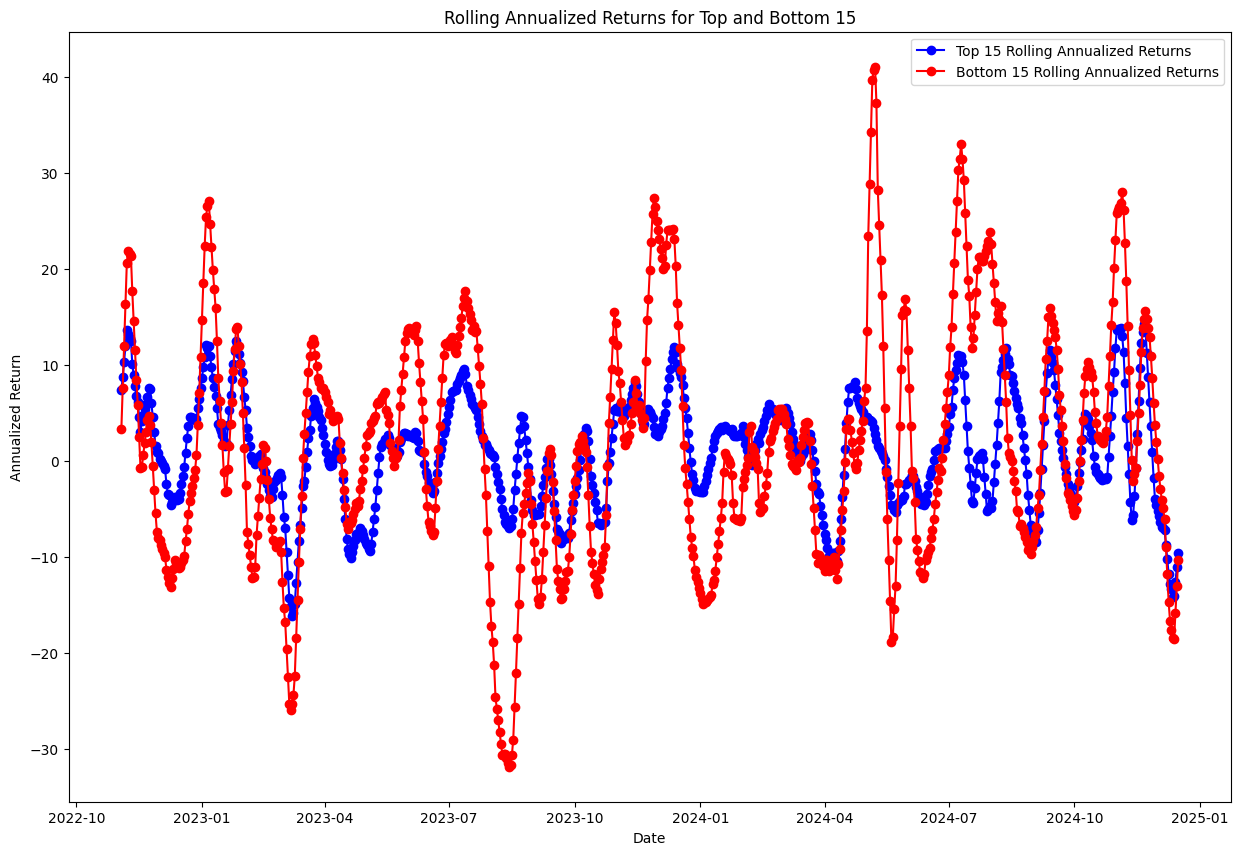

In [20]:
plot_top_vs_bot(ratings, returns, 15, 7)

**Top 15 vs. Bottom 15 (7-Day Rolling Annualized Returns)**  
- **Frequent Crossovers:** The red (Top 15) and blue (Bottom 15) lines cross each other multiple times, indicating that neither group consistently outperforms the other in this short-term (7-day) rolling window.  
- **High Volatility Range:** Returns oscillate between roughly -20% and +40%. This wide band suggests that these short-term annualized returns are quite sensitive to daily price movements.  
- **Short-Term Cycles:** The patterns appear cyclical, with alternating peaks and troughs. Such fluctuations might reflect market microcycles or sector-specific events that disproportionately affect the small set of top or bottom items.  
- **Overall Insight:** Because only 15 items are in each group, any single outlier can have a significant effect, leading to larger swings in the rolling returns. The frequent overlap suggests that, on a short rolling basis, top-rated items aren’t always outperforming bottom-rated items—and vice versa.


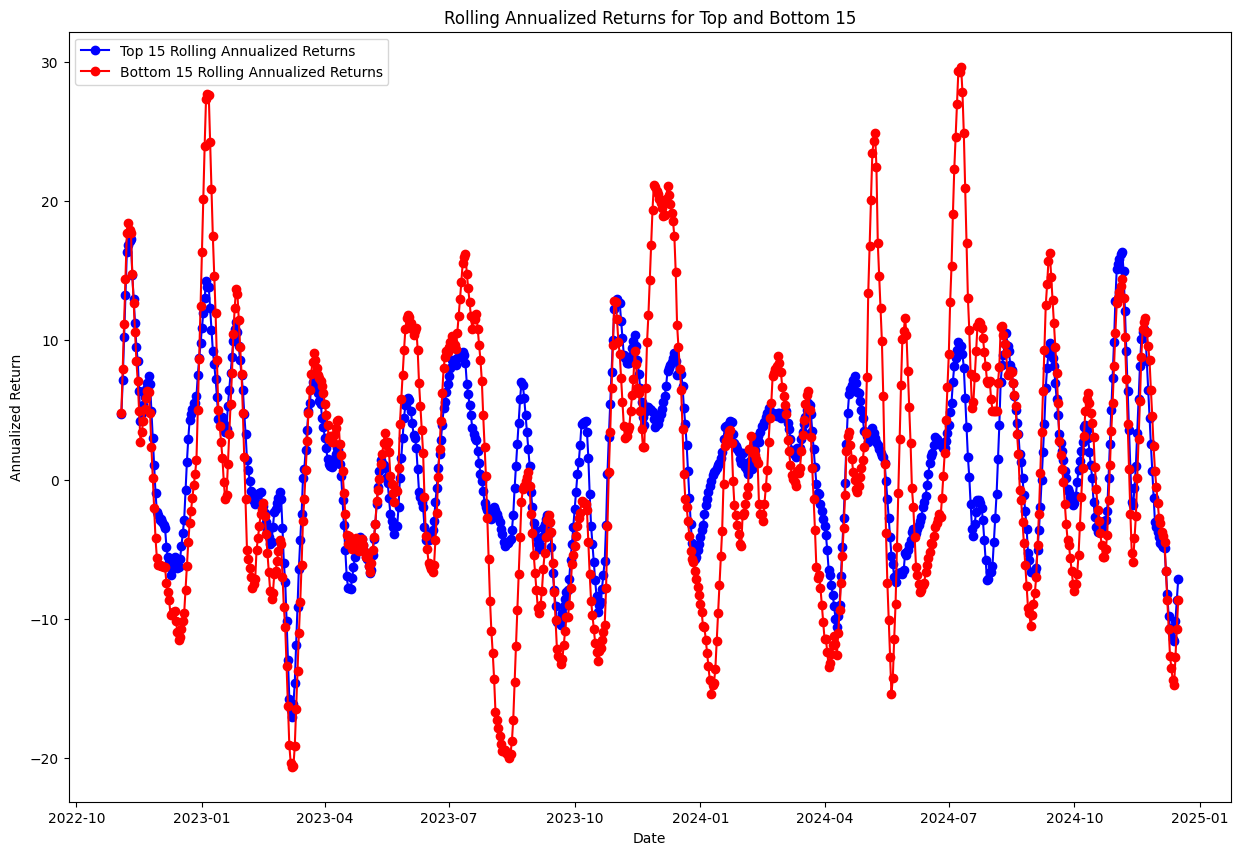

In [21]:
plot_top_vs_bot(ratings, returns, 30, 7)

**Top 30 vs. Bottom 30 (7-Day Rolling Annualized Returns)**  
- **Similar Volatility, Slightly Broader Base:** Expanding each group to 30 items still shows considerable fluctuations (from about -20% to +40%), but the lines can appear slightly smoother at times due to a larger sample size in each group.  
- **Continued Crossovers:** As with the Top 15 vs. Bottom 15, the red (Top 30) and blue (Bottom 30) lines frequently intersect. Even with more items, short-term performance differences can swing rapidly.  
- **Potential Diversification Effect:** Including more items in each group can reduce the impact of any single outlier, but the overall trends still show that both top- and bottom-rated cohorts experience similar cyclical patterns in this short window.  
- **Overall Insight:** While increasing the group size to 30 slightly dampens extreme outliers, the rolling annualized returns remain volatile and continue to converge or diverge quickly. This underscores that, over short 7-day windows, ratings alone may not consistently predict outperformance or underperformance.

---

**General Takeaway (Comparing Both Charts):**  
- Short-term (7-day) annualized returns can be very noisy, making it hard to see a persistent gap between top- and bottom-rated items.  
- The frequent crossovers suggest that market dynamics, news events, or sector-specific shocks can overshadow any immediate advantage that top-rated items might have, at least in the short run.  
- Increasing the sample size from 15 to 30 items in each group introduces some diversification, but the overall picture—frequent volatility and crossovers—remains similar, indicating that analyst ratings may not translate into stable short-term outperformance.


## 4.2 Analyst Ratings Strategy Backtest <a id="4-2"></a>

**Function Purpose:**  
The `get_backtesting_results` function runs a backtest of a given strategy against market data and displays a suite of metrics and visualizations that evaluate the strategy’s performance. 

**Backtest Execution:**  
- This function instantiates a `BacktestEngine` object, providing it with the strategy, along with market and factor data (`spy_df`, `fama_french`, and `svol`).  
- Once initialized, the backtest is run, generating a range of performance metrics.

**Metrics and Visualizations:**  
- The method `get_all_metrics()` returns a dictionary of key performance indicators (e.g., Sharpe ratio, drawdown), which are printed to the console.  
- Several plotting methods (`plot_strategy`, `plot_svol_vs_strategy_vol`, `plot_rolling_volatility`, `plot_drawdown`, `plot_return_distribution`) are called in sequence. These plots collectively showcase how the strategy performs over time, including volatility comparisons, drawdowns, and return distributions.

In [22]:
def get_backtesting_results(strategy):
    results = BacktestEngine(strategy, spy_df, fama_french, svol)

    for key, value in results.get_all_metrics().items():
        print(f"{key:<40} : {value}")
    results.plot_strategy()
    results.plot_svol_vs_strategy_vol()
    results.plot_rolling_volatility()
    results.plot_drawdown()
    results.plot_return_distribution()

**Function Purpose:**  
The `analyst_returns_backtesting` function prepares data  and then calls `get_backtesting_results` to execute and present the results.

**Data Preparation:**  
- The function retrieves the top and bottom returns using `get_top_bot_returns`.  
- It then calculates the difference between top and bottom returns, storing this in `res`. This difference serves as the daily return series for a simple “long top, short bottom” strategy.

**Backtest Initialization:**  
- The daily return series is converted into a DataFrame with columns for date and daily return, making it compatible with the backtesting engine.

**Backtest Execution:**  
- Finally, either`get_backtesting_results` is called with this prepared DataFrame, which runs the backtest and generates the associated performance metrics and plots or the BacktestEngine is returned.

In [23]:
def analyst_returns_backtesting(returns, ratings, n, per, compute_backtest=True):
    top, bot = get_top_bot_returns(ratings, returns, n, per)
    res = top-bot
    final_res = res.reset_index()
    final_res.columns = ['date', 'daily_return']
    if compute_backtest == True:
        get_backtesting_results(final_res)
    else:
        return BacktestEngine(final_res, spy_df, fama_french, svol)

**Function Purpose:**  
The `maximize_score` function iterates over a range of potential parameter values (the `grid`) to identify which one yields the best performance for a given strategy. It measures performance based on a custom score—specifically, the product of the strategy’s annualized return and its Sharpe ratio.

**Iteration Over Grid Values:**  
- For each candidate value in `grid`, the function calls `analyst_returns_backtesting` with `returns`, `ratings`, and the candidate value. This returns a strategy object containing performance metrics.

**Scoring Mechanism:**  
- After retrieving the annualized return and Sharpe ratio for each strategy, the function multiplies them to form a single “score.”  
- This scoring approach balances both the magnitude (annualized return) and risk-adjusted performance (Sharpe ratio).

**Tracking the Best Result:**  
- The function maintains `best_score` and `best_value`
- Whenever a new strategy’s score exceeds the current `best_score`, the function updates `best_score` and `best_value`.

**Return Value:**  
- After evaluating all possible grid values, the function returns `best_value`—the parameter that produced the highest score, indicating the optimal balance of returns and risk (as measured by Sharpe).


In [24]:
def maximize_score(grid, returns, ratings, per):
    best_score = -float('inf')
    best_value = None
    results = {}

    for val in grid:
        strat = analyst_returns_backtesting(returns, ratings, val, per, False)
        sharpe = strat.get_sharpe()
        ann_ret = strat.get_annualized_return()
        score = sharpe

        results[val] = score

        if score > best_score:
            best_score = score
            best_value = val

    return best_value

**Grid Construction:**  
- The code constructs a list `grid` containing candidate parameter values starting at 10, up to (but not including) 60, in steps of 3. This generates potential values that will be tested to find the optimal parameter.

**Optimization Using maximize_score:**  
- The function `maximize_score` is called with the constructed grid, along with `returns` and `ratings`.  
- For each value in the grid, `maximize_score` evaluates a strategy (via `analyst_returns_backtesting`) and computes the Sharpe ratio.  
- The candidate value that produces the highest score is determined to be the best parameter.

**Output of the Best Value:**  
- The optimal parameter value is stored in `best_value`, which is then output. This value represents the parameter setting that maximizes the combined performance metric.

In [25]:
grid = list(range(10, 60, 3))
best_value = maximize_score(grid, returns, ratings, 7)
best_value

46

Annualized Sharpe                        : 0.670668032064794
Annualized Sortino                       : 0.89361335758031
Information Ratio                        : 0.1259075727688067
Downside Beta                            : -0.12077802815640512
Max Drawdown                             : -0.5835639287886303
Calmar Ratio                             : 0.4919622466155871
Treynor Ratio                            : -0.8544661635904688
Standard Beta                            : -0.28858834714470494
Omega Ratio                              : 1.1369524586940476
Value at Risk (VaR)                      : -0.03922055950920152
Conditional Value at Risk (CVaR)         : -0.05681303205266805
Max Drawdown Duration                    : 124
Profit Factor                            : 1.1369524586940476
Annualized Return                        : 0.2415468472507587
Annualized Volatility                    : 0.3676734513890437
Recovery Factor                          : 1.0064111002630296
Fama-French Regr

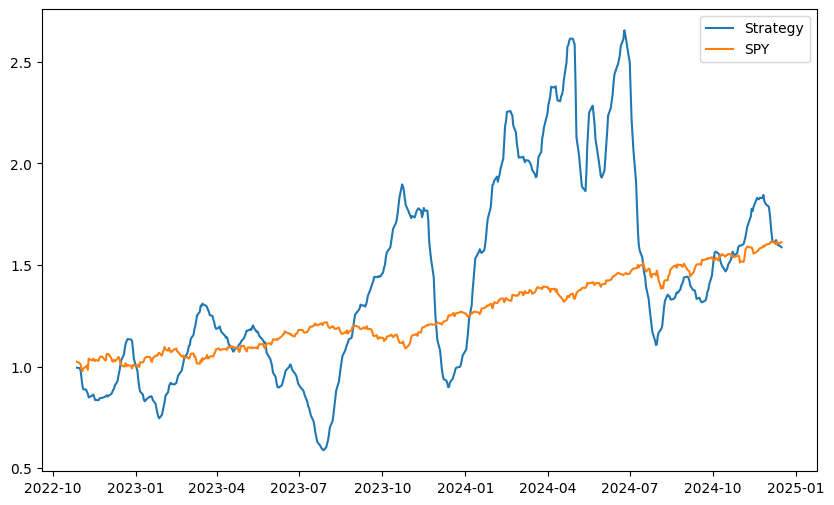

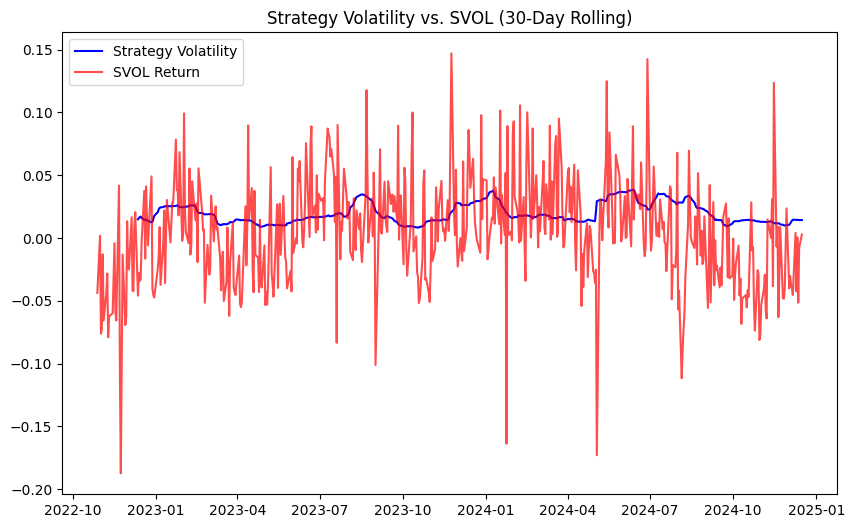

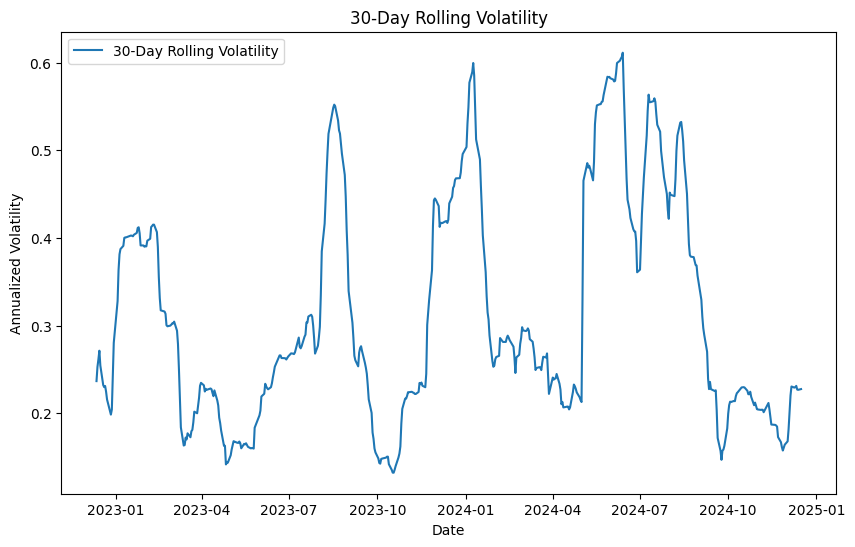

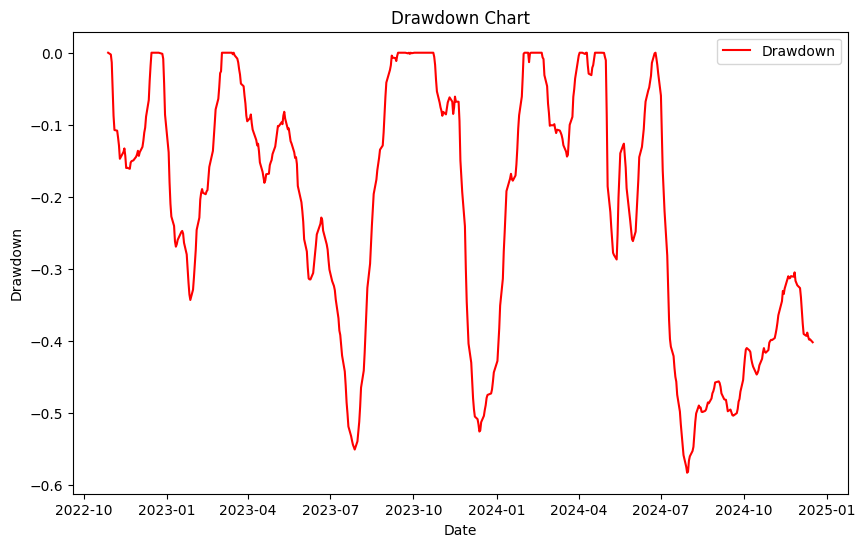

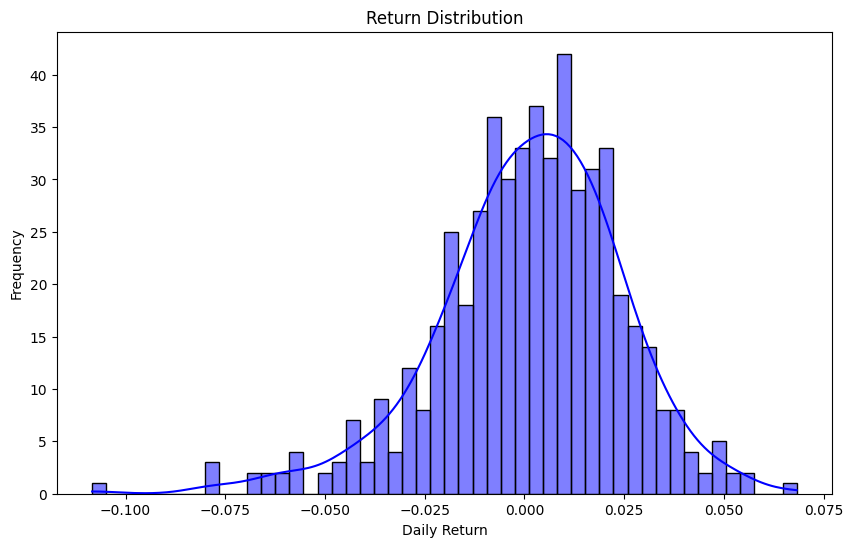

In [26]:
analyst_returns_backtesting(returns, ratings, 46, 7, True)

## Detailed Analysis of the Strategy’s Backtest Results

Below is an interpretation of the newly provided performance metrics and the accompanying charts. This analysis focuses on what the actual figures indicate about the strategy’s historical behavior, referencing the numeric values and visual evidence.

---

### Numerical Performance Highlights

1. **Annualized Return: 24.15%**  
   The strategy achieved a notable annual growth rate, outpacing what many traditional benchmarks might return. However, this strong upside comes with considerable risk, as evidenced by the volatility and drawdown metrics.

2. **Annualized Volatility: 36.77%**  
   A volatility level of nearly 37% indicates that the strategy’s returns can swing significantly from day to day or month to month. While the high annualized return is appealing, this elevated volatility makes the journey to those returns quite bumpy.

3. **Annualized Sharpe Ratio: 0.67**  
   Despite the robust absolute return, the Sharpe Ratio (excess return per unit of total risk) is only moderate. This value suggests that while the strategy outperforms a risk-free rate in absolute terms, it does so with enough volatility that its overall risk-adjusted performance is somewhat tempered.

4. **Annualized Sortino Ratio: 0.89**  
   The Sortino Ratio focuses on downside volatility, and at 0.89, it’s higher than the Sharpe. This implies that although overall volatility is substantial, the downside portion is somewhat less severe relative to returns—indicating that at least some of the volatility is due to upside swings.

5. **Information Ratio: 0.13**  
   This ratio compares the strategy’s excess returns over a benchmark (likely SPY) to the variability of that excess. A figure near 0.13 indicates that while the strategy does occasionally outperform, it does so inconsistently relative to the market. It’s not a strong or steady alpha generator compared to the benchmark.

6. **Downside Beta: –0.12**  
   A negative downside beta means that on days the market drops, the strategy tends to move in the opposite direction—though only weakly. This can be beneficial if the goal is to hedge or diversify against market downturns, but it does not guarantee immunity to large losses from other factors, as shown below.

7. **Max Drawdown: –58.36%**  
   The largest peak-to-trough loss is over half of the portfolio’s value. This is a substantial drawdown and highlights a key risk: even though the strategy eventually climbed to produce a 24% annualized return, an investor would have faced a significant drawdown along the way.

8. **Calmar Ratio: 0.49**  
   By comparing the annualized return (24.15%) to the max drawdown (58.36%), the Calmar Ratio of ~0.49 underscores that for each unit of drawdown risk, the strategy yields less than one unit of annualized return. This relatively low value reflects the depth of that –58% loss.

9. **Treynor Ratio: –0.85**  
   Treynor uses beta relative to the market. Because the strategy’s standard beta is negative (–0.29), the math behind the Treynor Ratio can yield a negative result if the strategy’s return is positive but the market exposure is net inverse. A negative Treynor does not necessarily mean the strategy is unprofitable; it just means its returns are not driven by traditional market beta in a straightforward way.

10. **Standard Beta: –0.29**  
    This negative beta implies that, on average, the strategy moves inversely to the broader market—though not strongly (|–0.29| < 1). In principle, this could provide diversification benefits, but it also means the strategy’s returns are not primarily explained by rising equity markets.

11. **Omega Ratio: 1.14**  
    The Omega above 1.0 indicates that, on a probability-weighted basis, the strategy’s positive returns outsize its negative returns. While not overwhelmingly high, 1.14 suggests there are slightly more favorable outcomes than unfavorable ones in the distribution of returns.

12. **Profit Factor: 1.14**  
    Similar to the Omega Ratio, this metric shows that total gains modestly exceed total losses (1.14:1). Although profitable, the margin is not large, implying that the strategy doesn’t have a big cushion if trading conditions worsen.

13. **Recovery Factor: 1.01**  
    The net gains over the entire backtest are just enough to exceed the largest drawdown, resulting in a value close to 1. This indicates that while the strategy did manage to break above its worst trough, it wasn’t by a wide margin—reinforcing the reality of a challenging path to recovery.

14. **Value at Risk (VaR): –3.92% / Conditional VaR (CVaR): –5.68%**  
    On any given day, there is a meaningful chance (depending on the confidence level) of losing ~4% or more (VaR), and in the worst scenarios (CVaR), the strategy could lose around 5–6%. These figures align with the relatively high volatility environment in which the strategy operates.

15. **Max Drawdown Duration: 124 Days**  
    This is roughly four months. It means that after experiencing a significant decline, the strategy took about 124 trading days to fully recover to a new high. Combined with the –58% drawdown figure, it paints a picture of a tough, extended period that would test investor patience.

---

### Chart Interpretations

1. **Cumulative Return vs. SPY**  
   - The strategy’s equity curve (blue) trends upward overall, ending well above the initial value. However, the path includes substantial dips—consistent with the large max drawdown.  
   - SPY (orange) rises more steadily, indicating the strategy’s fluctuations are not tightly correlated to the market. The net result is that the strategy ends higher than its starting point, but not necessarily in a smoother manner than the index.

2. **Strategy Volatility vs. SVOL (30-Day Rolling)**  
   - The red series (strategy returns/volatility) frequently oscillates around the blue line (market volatility), sometimes rising above, sometimes dropping below.  
   - While the negative beta suggests partial inverse movement to the market, the chart reveals the strategy still undergoes periods of high volatility that are not strictly tied to SPY’s movements.

3. **30-Day Rolling Volatility**  
   - The strategy’s rolling volatility often hovers in a wide range, at times surging above 40%. This matches the annualized volatility of ~36.8%.  
   - The spikes align with the drawdowns, highlighting that big negative moves typically coincide with surging volatility.

4. **Drawdown Chart**  
   - Multiple deep troughs are visible, with the most severe reaching around –58%. Recoveries occur, but they can take months (up to 124 days) to regain lost ground.  
   - The pattern of repeated drawdowns shows that the strategy’s path is not linear; investors would face large fluctuations before eventually seeing the final gains.

5. **Return Distribution**  
   - The histogram shows a mean daily return above zero, consistent with the positive annualized return. However, there is a noticeable spread, with a long tail extending into negative territory (–0.10 or lower).  
   - The right tail extends up to ~0.075, indicating the presence of some strong positive outliers. Overall, the distribution suggests that while profitable moves occur, the strategy also experiences sizable down days, driving the moderate Sharpe.

---

### Overall Takeaways

- **High Return, High Risk:** An annualized return of 24.15% is compelling, but it comes with 36.77% volatility and a max drawdown of –58.36%. Investors would need a strong risk tolerance and a willingness to endure extended drawdown periods.
- **Moderate Risk-Adjusted Metrics:** A Sharpe Ratio of 0.67 and Sortino of 0.89 indicate that the strategy outperforms cash in absolute terms but not dramatically when adjusted for volatility or downside risk.
- **Mixed Market Correlation:** With a standard beta of –0.29, the strategy behaves inversely to the market on average. Downside beta is also negative (–0.12), suggesting some hedge-like characteristics during market downturns. However, large drawdowns still occur, driven by factors other than typical market drops.
- **Slightly More Wins Than Losses:** The Omega and Profit Factor, both around 1.14, confirm a positive but not overwhelmingly large edge. The distribution of returns leans positive overall, but includes heavy downside outliers.
- **Prolonged Drawdowns:** The Recovery Factor (1.01) and a 124-day max drawdown duration underscore that while the strategy ultimately claws back from deep losses, the road to recovery can be long and psychologically challenging.

In conclusion, the strategy has the potential for outsized gains (24% annually) but at the cost of considerable volatility and extended drawdowns. Its negative beta profile implies some inverse correlation to the market, yet does not insulate it from large losses. The overall result is a moderate risk-adjusted performance (Sharpe ~0.67) with episodes of significant capital drawdown—a high-risk, high-return proposition that may only suit investors who can tolerate substantial fluctuations in pursuit of potentially higher long-term rewards.


# 5 Data Processing and EDA for Insider Ownership<a id="5-0"></a>

## 5.1 Analyzing Alpha Potential <a id="5-1"></a>

In this analysis, we are investigating whether changes in insider ownership can generate actionable alpha. The goal is to create an investment signal based on insider ownership data and test a simple long-short strategy. Here’s an overview of our approach:

1. **Data Processing:**
   - **Insider Ownership Data:**  
     We begin with a Insider Ownership Data obtained from Bloomberg (PCT_INSIDER_SHARES_OUT). The data is pivoted so that each date becomes a row and each ticker becomes a column. We then calculate the daily percent change in insider ownership for each ticker.
   - **Signal Normalization:**  
     The percent changes are converted to z-scores. This standardization normalizes the data across tickers, allowing us to identify statistically significant deviations in insider ownership changes.

2. **Signal Generation:**
   - **Long-Short Signal:**  
     Using the z-scored percent changes, we rank the tickers each day. The top 10% of tickers (those with unusually high increases in insider ownership) receive a long signal, while the bottom 10% (those with unusually low or negative changes) receive a short signal. We normalize these weights so that the total exposure is consistent, forming the basis for our portfolio construction.

3. **Strategy Testing:**
   - **Return Data Integration:**  
     The strategy is tested using daily return data (from the Russell 1000) stored in another CSV file. We ensure proper alignment of dates by reindexing and forward-filling the signal data to match the return data dates.
   - **Performance Metrics:**  
     Daily strategy returns are calculated by taking the weighted sum of individual ticker returns. We then analyze key performance metrics such as cumulative returns, annualized mean return, volatility, maximum drawdown, Value at Risk (VaR), and Conditional VaR (CVaR). A series of plots (line charts, histograms, drawdown curves, etc.) are generated to visualize the strategy’s performance.

4. **Comparison to Fama–French Factors:**
   - **Risk Factor Regression:**  
     To determine if the strategy captures alpha beyond standard risk premia, we regress the raw strategy returns on the Fama–French daily factors (Mkt-RF, SMB, HML). The regression analysis provides insights into the strategy’s sensitivity to these common risk factors.
   - **Correlation and Visualization:**  
     We also produce a correlation heatmap and scatter plots to visually assess the relationships between the strategy returns and the Fama–French factors, offering additional context on whether the observed performance is due to unique alpha or exposure to known risk factors.

Overall, this analysis combines quantitative signal processing with rigorous performance testing and factor regression, enabling us to evaluate the potential of an insider ownership-based investment strategy to generate alpha.

## 5.2 Data Processing and Signal Generation <a id="5-2"></a>
**a. Insider Ownership Data Preparation:**  
- **Data Loading & Pivoting:**  
  The insider ownership data is loaded from a CSV file and then pivoted so that each row represents a date and each column represents a ticker. This results in a matrix where every cell is the reported insider ownership percentage for a given ticker on a given date.

- **Calculating Percent Change:**  
  For each ticker, we calculate the day-over-day percent change in insider ownership. This transformation helps capture the dynamics of insider behavior over time rather than just static levels.

- **Normalizing with Z-Scores:**  
  To account for differences in scales and variability across companies, the percent change series for each ticker is standardized into a z-score. For any given ticker on a given day, the z-score is computed by subtracting the ticker’s historical mean percent change and then dividing by its historical standard deviation. This step converts the raw percent changes into a normalized signal that indicates how “unusual” or extreme a change is relative to its own history.

In [27]:
df = pd.read_csv(DATA_PATH('historical_insider_data.csv'), parse_dates=['Date']) # Already read above but reimported for ease of use

# Pivot the DataFrame:
# - The 'Date' column becomes the index.
# - The unique values in the 'Ticker' column become the columns.
# - The corresponding insider ownership percentages (from 'PCT_INSIDER_SHARES_OUT') fill the cells.
insider_ownership_df = df.pivot(index='Date', columns='Ticker', values='PCT_INSIDER_SHARES_OUT')
insider_ownership_df.sort_index(inplace=True)

# Divide by hundred to convert to a fraction
insider_ownership_df = insider_ownership_df/100

# Print the resulting DataFrame to see the pivoted data.
insider_ownership_df

Ticker,A US Equity,AA US Equity,AAL US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,ABBV US Equity,ABNB US Equity,ABT US Equity,ACGL US Equity,...,YUM US Equity,Z US Equity,ZBH US Equity,ZBRA US Equity,ZG US Equity,ZI US Equity,ZION US Equity,ZM US Equity,ZS US Equity,ZTS US Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-08,0.00385,0.00314,0.00752,0.29666,0.00640,0.00056,0.00116,NaN,0.00278,0.03153,...,0.00315,NaN,0.00219,0.02140,0.03116,NaN,0.01684,NaN,NaN,0.00021
2015-03-15,0.00398,0.00314,0.00752,0.29666,0.00640,0.00056,0.00116,NaN,0.00280,0.03073,...,0.00315,NaN,0.00219,0.02140,0.03116,NaN,0.01672,NaN,NaN,0.00021
2015-03-22,0.00399,0.00314,0.00753,0.29666,0.00630,0.00056,0.00116,NaN,0.00280,0.03073,...,0.00314,NaN,0.00208,0.02105,0.03116,NaN,0.01639,NaN,NaN,0.00021
2015-03-29,0.00421,0.00314,0.00753,0.29666,0.00630,0.00056,0.00116,NaN,0.00280,0.03099,...,0.00314,NaN,0.00246,0.02105,0.03116,NaN,0.01639,NaN,NaN,0.00021
2015-04-05,0.00421,0.00314,0.00753,0.29666,0.00630,0.00057,0.00116,NaN,0.00280,0.03099,...,0.00323,NaN,0.00246,0.02126,0.03116,NaN,0.01638,NaN,NaN,0.00021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-26,0.00429,0.00819,0.01600,0.17164,0.01320,0.00060,0.00098,0.03501,0.00535,0.03104,...,0.00143,0.06636,0.00144,0.00804,0.03596,0.04731,0.01666,0.00204,0.02842,0.00066
2025-02-02,0.00430,0.00895,0.01592,0.17194,0.01321,0.00061,0.00098,0.03453,0.00535,0.03104,...,0.00143,0.06636,0.00144,0.00804,0.03596,0.04731,0.01666,0.00204,0.02842,0.00066
2025-02-09,0.00303,0.00895,0.01592,0.17194,0.01231,0.00061,0.00098,0.03442,0.00535,0.03104,...,0.00143,0.06636,0.00144,0.00817,0.03596,0.04732,0.01666,0.00204,0.02842,0.00066


In [28]:
# -----------------------------
# 2. Compute Percent Change
# -----------------------------
# Calculate the percent change in insider ownership from one date to the next.
# The resulting DataFrame will have the same structure as insider_ownership_df.
insider_ownership_pct_change_df = insider_ownership_df.pct_change()

# -----------------------------
# 3. Compute Z-Score of Percent Changes (Investment Signal)
# -----------------------------
# The z-score is computed as:
#    z = (x - mean(x)) / std(x)
# Here we apply this calculation to each ticker's percent change series.
zscore_pct_change_df = insider_ownership_pct_change_df.apply(lambda x: (x - x.mean()) / x.std())

zscore_pct_change_df

Ticker,A US Equity,AA US Equity,AAL US Equity,AAON US Equity,AAP US Equity,AAPL US Equity,ABBV US Equity,ABNB US Equity,ABT US Equity,ACGL US Equity,...,YUM US Equity,Z US Equity,ZBH US Equity,ZBRA US Equity,ZG US Equity,ZI US Equity,ZION US Equity,ZM US Equity,ZS US Equity,ZTS US Equity
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-15,0.942474,-0.054372,-0.072661,0.101898,-0.043671,-0.018560,-0.033592,NaN,0.120541,-1.424553,...,-0.010339,NaN,-0.022543,0.001188,-0.031548,NaN,-0.447588,NaN,NaN,-0.065677
2015-03-22,0.065888,-0.054372,-0.027086,0.101898,-0.077277,-0.018560,-0.033592,NaN,-0.045328,-0.007053,...,-0.070626,NaN,-1.265602,-0.285543,-0.031548,NaN,-1.218961,NaN,NaN,-0.065677
2015-03-29,1.541893,-0.054372,-0.072661,0.101898,-0.043671,-0.018560,-0.033592,NaN,-0.045328,0.465628,...,-0.010339,NaN,4.498760,0.001188,-0.031548,NaN,-0.011719,NaN,NaN,-0.065677
2015-04-05,-0.004583,-0.054372,-0.072661,0.101898,-0.043671,0.761106,-0.033592,NaN,-0.045328,-0.007053,...,0.533973,NaN,-0.022543,0.176087,-0.031548,NaN,-0.049038,NaN,NaN,-0.065677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-26,-0.069810,-0.054372,-0.072661,0.101898,-0.018950,-0.018560,-0.033592,0.017616,-0.045328,-0.007053,...,-0.010339,NaN,-0.022543,0.001188,-0.031548,NaN,-0.011719,NaN,-0.027923,-0.065677
2025-02-02,0.060795,1.131995,-0.244024,0.280732,-0.042042,0.709129,-0.033592,-0.137079,-0.045328,-0.007053,...,-0.010339,NaN,-0.022543,0.001188,-0.031548,NaN,-0.011719,NaN,-0.027923,-0.065677
2025-02-09,-8.288365,-0.054372,-0.072661,0.101898,-0.190202,-0.018560,-0.033592,0.008990,-0.045328,-0.007053,...,-0.010339,NaN,-0.022543,0.284658,-0.031548,NaN,-0.011719,NaN,-0.027923,-0.065677


# 6 Analysing Insider Ownership <a id="6-0"></a>

## 6.1 Constructing Simple Long-Short Insider Ownership Strategy <a id="6-1"></a>

**a. Ranking the Signal:**  
- **Daily Ranking:**  
  For each trading day, the computed z-scores across all tickers are ranked from the lowest (most negative change) to the highest (most positive change).

**b. Defining the Long and Short Universes:**  
- **Long Signal (Top 10%):**  
  The top 10% of tickers—those with the highest z-scores—are interpreted as having significant increases in insider ownership. The hypothesis is that when insiders are buying, they may be signaling confidence in the company’s future prospects. Thus, these tickers are given a long (buy) signal.

- **Short Signal (Bottom 10%):**  
  Conversely, the bottom 10% of tickers—those with the lowest z-scores—are considered to have abnormal decreases or negative changes in insider ownership. These are given a short (sell) signal.

**c. Weight Assignment and Normalization:**  
- **Assigning Binary Weights:**  
  For each day, the tickers in the top quantile are assigned a weight of +1, while those in the bottom quantile are assigned a weight of –1. All other tickers are given a weight of 0.
  
- **Normalization of Weights:**  
  To ensure the portfolio has a consistent level of exposure regardless of the number of tickers in the long and short groups, the absolute weights are normalized so that the sum of absolute values equals 1. This means that if, for example, there are 20 tickers in total in the long and short groups (10 long and 10 short), each long position might effectively have a weight of +1/10 and each short a weight of –1/10.

---

#### Constructing the Strategy and Computing Returns

**a. Daily Portfolio Return Calculation:**  
- **Using Return Data:**  
  Daily returns for each ticker are provided from a separate returns file. For each day, the strategy’s return is computed as the weighted sum of the individual ticker returns, where the weights are derived from the long–short signal.
  
- **Aggregation into Portfolio Return:**  
  The individual contributions (weight multiplied by ticker return) are summed across all tickers to yield a single portfolio-level daily return.

**b. Cumulative Return Computation:**  
- **Compounding Returns:**  
  The daily returns are compounded over time to create a cumulative return series for the strategy. This gives a sense of how an initial investment would grow over time under the strategy.

---

#### Performance Evaluation

**a. Key Metrics:**  
- **Annualized Return and Volatility:**  
  By scaling daily returns to an annual basis (typically using 252 trading days), the average return and volatility of the strategy are computed.
  
- **Maximum Drawdown:**  
  This metric captures the largest peak-to-trough decline in the portfolio’s cumulative return, highlighting potential downside risks.

- **Risk Measures – VaR and CVaR:**  
  The Value at Risk (VaR) at the 5% level shows the worst loss expected on 5% of days, while the Conditional VaR (CVaR) represents the average loss on days when the loss exceeds the VaR threshold.

**b. Visualization:**  
- **Plots:**  
  Several visualizations are generated, including:
  - A line plot of cumulative returns to visualize growth over time.
  - Histograms of daily returns to assess the distribution and tail risk.
  - Drawdown plots to show the severity and duration of losses.
  - Time-series plots of daily strategy returns to monitor consistency.

Summary Statistics:
Annualized Mean: 0.0073
Annualized Volatility: 0.0197
Max Drawdown: -0.0207
5% VaR: -0.0018
5% CVaR: -0.0026


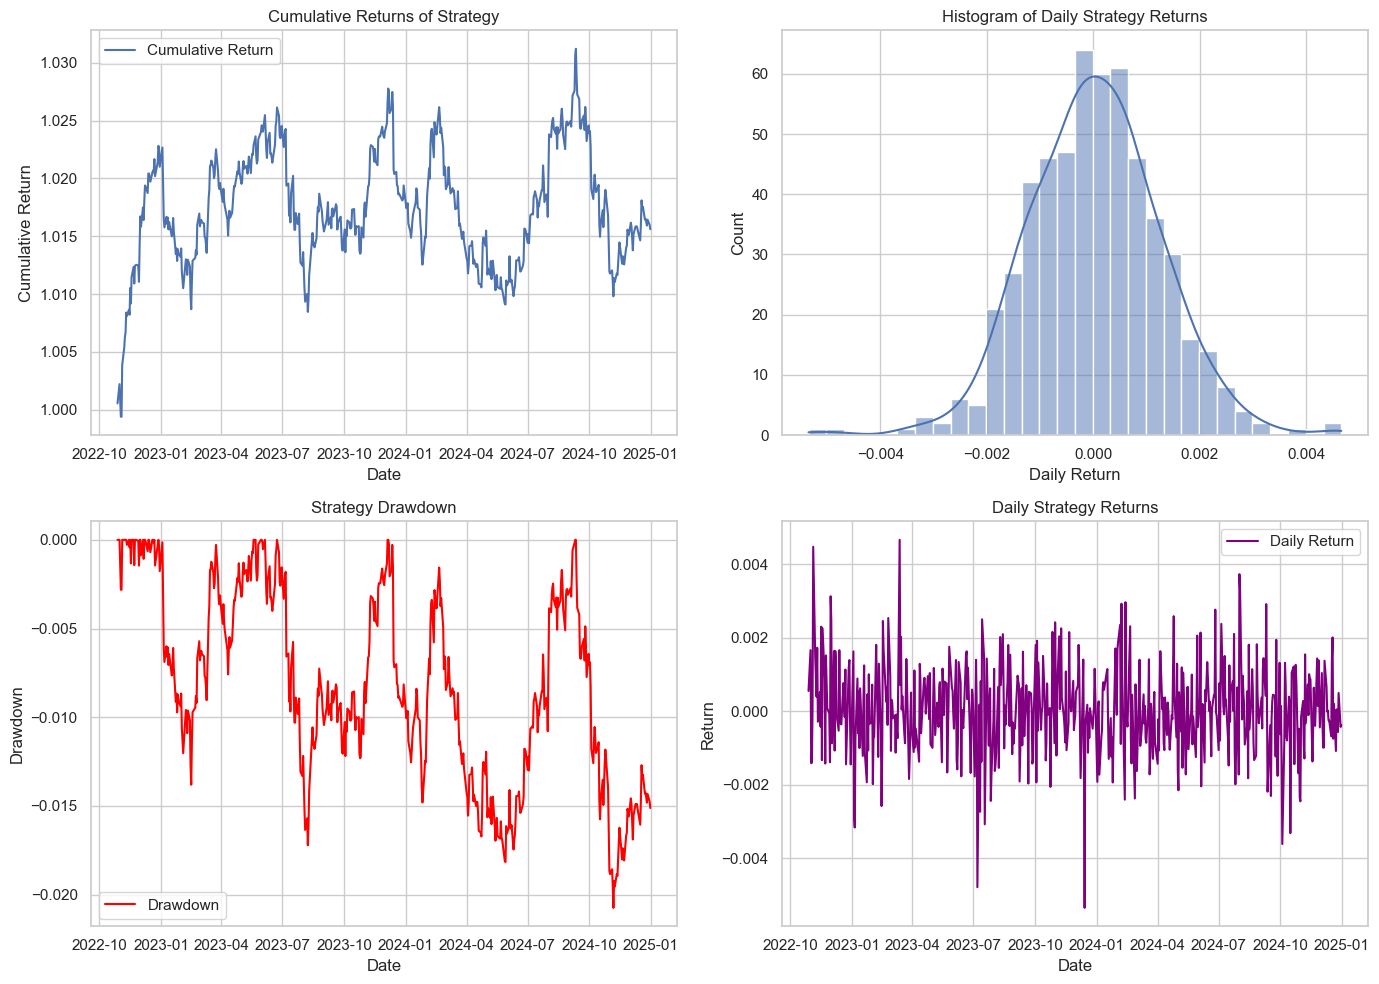

In [30]:
sns.set(style="whitegrid")

zscore_signal = zscore_pct_change_df

# -----------------------------
# 2. Load Returns Data and Align with Z-Score Signal
# -----------------------------
returns_df = pd.read_csv(DATA_PATH('russell_1000_retuns.csv'), parse_dates=['date'], index_col='date')
returns_df.sort_index(inplace=True)

# Align tickers between returns and signal data.
common_tickers = returns_df.columns.intersection(zscore_signal.columns)
returns_df = returns_df[common_tickers]
zscore_signal = zscore_signal[common_tickers]

# Reindex the signal data to match the returns dates and forward-fill missing values.
zscore_signal = zscore_signal.reindex(returns_df.index, method='ffill')

# ---------------------------------------------------
# 3. Construct the Strategy Signal
# ---------------------------------------------------
def get_strategy_weights(row, quantile=0.25):
    """
    For a given day's z-scores, assign:
      - +1 weight to the top quantile (highest z-scores) [long]
      - -1 weight to the bottom quantile (lowest z-scores) [short]
    Normalize the weights so that the sum of absolute weights equals 1.
    """
    # Drop any missing values in the row.
    row = row.dropna()
    if len(row) == 0:
        return pd.Series(dtype=float)
    n = max(int(np.floor(len(row) * quantile)), 1)
    sorted_row = row.sort_values()
    short_tickers = sorted_row.index[:n]
    long_tickers = sorted_row.index[-n:]
    weights = pd.Series(0, index=row.index)
    weights.loc[long_tickers] = 1
    weights.loc[short_tickers] = -1
    total = weights.abs().sum()
    if total != 0:
        weights = weights / total
    return weights

# Apply the weighting function row by row.
weights_df = zscore_signal.apply(get_strategy_weights, axis=1)
# Reindex each row to ensure all common tickers are present, filling missing with 0.
weights_df = weights_df.apply(lambda row: row.reindex(common_tickers, fill_value=0), axis=1)

# ---------------------------------------------------
# 4. Compute Strategy Returns
# ---------------------------------------------------
strategy_daily_returns = (weights_df * returns_df).sum(axis=1)
strategy_daily_returns = strategy_daily_returns.dropna()

if strategy_daily_returns.empty:
    raise ValueError("The strategy returns series is empty after dropping NaNs. Check your data alignment.")

cumulative_returns = (1 + strategy_daily_returns).cumprod()

# ---------------------------------------------------
# 5. Compute Summary Statistics
# ---------------------------------------------------
trading_days = 252  # Number of trading days per year.

annualized_mean = strategy_daily_returns.mean() * trading_days
annualized_vol = strategy_daily_returns.std() * np.sqrt(trading_days)

running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

var_5 = np.percentile(strategy_daily_returns.values, 5)
cvar_5 = strategy_daily_returns[strategy_daily_returns <= var_5].mean()

summary_stats = {
    'Annualized Mean': annualized_mean,
    'Annualized Volatility': annualized_vol,
    'Max Drawdown': max_drawdown,
    '5% VaR': var_5,
    '5% CVaR': cvar_5
}

print("Summary Statistics:")
for key, value in summary_stats.items():
    print(f"{key}: {value:.4f}")

# ---------------------------------------------------
# 6. Plotting
# ---------------------------------------------------
plt.figure(figsize=(14, 10))

# Plot 1: Cumulative Returns
plt.subplot(2, 2, 1)
plt.plot(cumulative_returns.index, cumulative_returns, label='Cumulative Return')
plt.title("Cumulative Returns of Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()

# Plot 2: Histogram of Daily Strategy Returns
plt.subplot(2, 2, 2)
sns.histplot(strategy_daily_returns, bins=30, kde=True)
plt.title("Histogram of Daily Strategy Returns")
plt.xlabel("Daily Return")

# Plot 3: Drawdown Over Time
plt.subplot(2, 2, 3)
plt.plot(drawdown.index, drawdown, color='red', label='Drawdown')
plt.title("Strategy Drawdown")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()

# Plot 4: Daily Strategy Returns (Line Plot)
plt.subplot(2, 2, 4)
plt.plot(strategy_daily_returns.index, strategy_daily_returns, color='purple', label='Daily Return')
plt.title("Daily Strategy Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()

plt.tight_layout()
plt.show()


### Analysis
Below is a detailed analysis of the strategy’s backtest results, focusing especially on its relatively low returns and notably lower volatility:

---

#### 1. Summary Statistics Overview

1. **Annualized Mean Return: 0.0073 (0.73%)**  
   - The strategy’s annualized return is modest. Over the test period, the portfolio appreciates by less than 1% per year on average.

2. **Annualized Volatility: 0.0197 (1.97%)**  
   - This is a key highlight: the strategy exhibits extremely low volatility compared to typical equity market volatility (which often falls in the 15–20% range annually).  
   - The low volatility indicates that the day-to-day (and month-to-month) fluctuations in the strategy’s value are relatively small.

3. **Max Drawdown: –0.0207 (–2.07%)**  
   - The maximum peak-to-trough decline of roughly 2% is quite mild. In contrast, broad equity markets can easily experience double-digit drawdowns over a similar timeframe.

4. **5% VaR: –0.0018 (–0.18% Daily)**  
   - Value at Risk at the 5% level suggests that on the worst 5% of days, the strategy might lose more than 0.18%.  
   - In absolute terms, this is a small daily potential loss compared to higher-volatility portfolios.

5. **5% CVaR: –0.0026 (–0.26% Daily)**  
   - Conditional VaR (also known as Expected Shortfall) provides the average loss on days that breach the VaR threshold.  
   - This implies that, on those worst 5% of days, the average loss is about 0.26%. Again, this is relatively small in absolute terms.

---

#### 2. Graphical Analysis

##### A. Cumulative Returns of Strategy (Top-Left Plot)

- **Observation:**  
  The strategy’s cumulative return curve fluctuates within a relatively narrow band and does not exhibit strong upward or downward trends over the examined period.  
- **Interpretation:**  
  - The overall growth is modest, consistent with the low annualized return of ~0.73%.  
  - However, the curve is also relatively stable and avoids large drawdowns, reflecting the low-volatility nature of the strategy.

##### B. Histogram of Daily Strategy Returns (Top-Right Plot)

- **Shape & Distribution:**  
  - The histogram appears approximately bell-shaped, centered near zero, with few extreme tails.  
  - The daily returns mostly cluster in a tight range, which aligns with the reported annualized volatility of 1.97%.
- **Interpretation:**  
  - The small standard deviation indicates that daily returns do not swing widely, underscoring the strategy’s conservative risk profile.  
  - There are no pronounced fat tails visible, suggesting that extreme losses or gains are relatively rare.

##### C. Strategy Drawdown (Bottom-Left Plot)

- **Observation:**  
  - The drawdown plot remains above –2.07% for most of the period, confirming the max drawdown statistic.  
  - The drawdowns tend to be shallow and short-lived.
- **Interpretation:**  
  - The strategy does not suffer from deep or prolonged periods of loss.  
  - Even during drawdown phases, the portfolio recovers fairly quickly relative to typical equity benchmarks.

##### D. Daily Strategy Returns (Bottom-Right Plot)

- **Observation:**  
  - The daily returns oscillate around zero, with a range roughly between –0.4% and +0.4%.  
  - The plot visually reaffirms the low volatility: returns do not exhibit large spikes.
- **Interpretation:**  
  - Day-to-day performance is relatively stable.  
  - While this stability helps limit drawdowns, it also constrains the upside, contributing to the modest annualized return.

---

#### 3. Analysis: Low Return vs. Low Volatility

1. **Trade-Off Between Return and Risk**  
   - Although the strategy’s absolute return is not high, the very low volatility profile means the risk taken is minimal.  
   - In risk-adjusted terms (e.g., Sharpe ratio), the strategy might still be competitive if the returns are uncorrelated with broader markets or other strategies.

2. **Drawdown Behavior**  
   - A max drawdown of –2.07% is exceptionally low for an equity-oriented strategy, suggesting strong capital preservation.  
   - This low drawdown can be valuable in a diversified portfolio context, where preserving capital during market downturns is a priority.

3. **Possible Portfolio Role**  
   - The strategy’s low volatility and small drawdowns might make it attractive as a “steady, low-risk” allocation.  
   - It may serve as a diversifier if it has low correlation to traditional assets, potentially smoothing overall portfolio returns.

4. **Performance Drivers**  
   - The insider ownership signal may be capturing a small, stable source of returns.  
   - Its low volatility could stem from a long–short construction that is close to market neutral, minimizing market beta and thus dampening large fluctuations.

---

#### 4. Overall Conclusion

- **Stability vs. Growth:**  
  The backtest reveals a strategy that emphasizes stability and downside protection over large gains.  
- **Low-Volatility Profile:**  
  The small daily fluctuations, shallow drawdowns, and tight distribution of returns confirm a low-risk approach.  
- **Potential Next Steps:**  
  - Assess correlation with broader market indices and other factors to confirm if the strategy offers diversification benefits.  
  - Consider combining with higher-return (but higher-volatility) strategies to enhance overall portfolio efficiency.  
  - Explore refinements to the insider ownership signal or alternative weighting schemes that might increase returns without substantially increasing risk.

In summary, while the strategy’s absolute return is modest, its notably low volatility and shallow drawdowns indicate a highly defensive profile. Depending on an investor’s objectives—especially those prioritizing capital preservation and consistent performance—this low-volatility characteristic could be a valuable feature in a broader investment portfolio. Since we are also having a long-short portfolio, the strategy, potentially, has limited beta exposure and a strong alpha component. We test this hypothesis further by running a regression against the Fama-French Factors

## 6.2 Testing and Benchmarking Against Fama–French Factors <a id="6-2"></a>

**a. Regression Analysis:**  
- **Explanatory Variables:**  
  The raw strategy returns (without subtracting the risk-free rate) are regressed against the Fama–French factors (Mkt-RF, SMB, HML). This helps determine whether the returns can be explained by known risk premia or if they represent unique alpha.
  
- **Interpreting the Regression:**  
  The regression output includes an intercept (alpha), factor loadings (betas), and statistical measures like R-squared and t-statistics. A significant intercept could indicate that the strategy generates returns beyond those explained by market, size, and value factors.

**b. Comparative Visuals:**  
- **Correlation Heatmaps and Scatter Plots:**  
  Correlation matrices and scatter plots (with regression lines) help visually compare the relationship between the strategy returns and each of the Fama–French factors.

**c. Cumulative Return Comparison:**  
- **Market Benchmarking:**  
  A comparison between the strategy’s cumulative returns and an approximate market cumulative return (derived from the Fama–French market factor) is provided to gauge relative performance.

Data aligned. Date range: 2022-10-28 00:00:00 to 2024-11-29 00:00:00
                            OLS Regression Results                            
Dep. Variable:        Strategy_Return   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     30.26
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           4.77e-18
Time:                        00:52:23   Log-Likelihood:                 2806.5
No. Observations:                 525   AIC:                            -5605.
Df Residuals:                     521   BIC:                            -5588.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

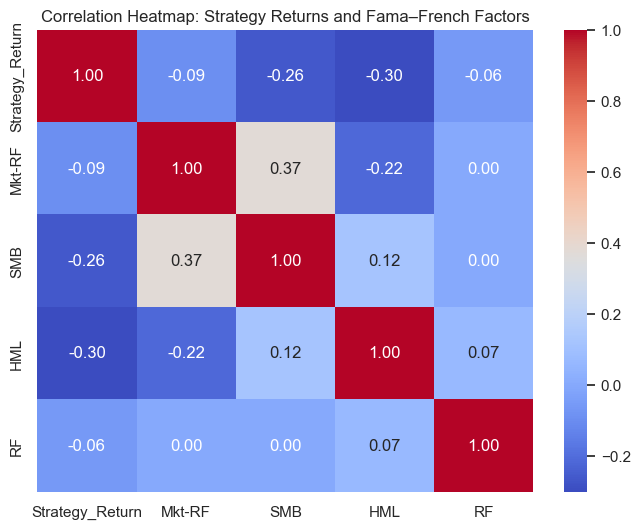

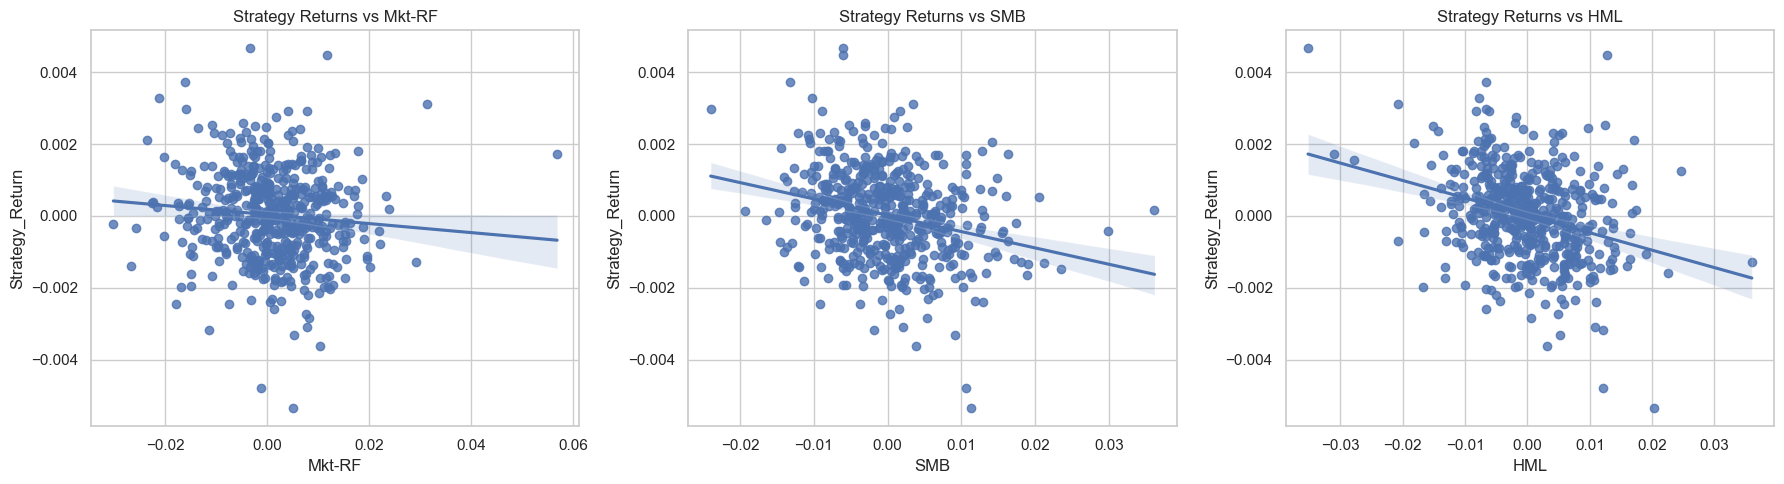

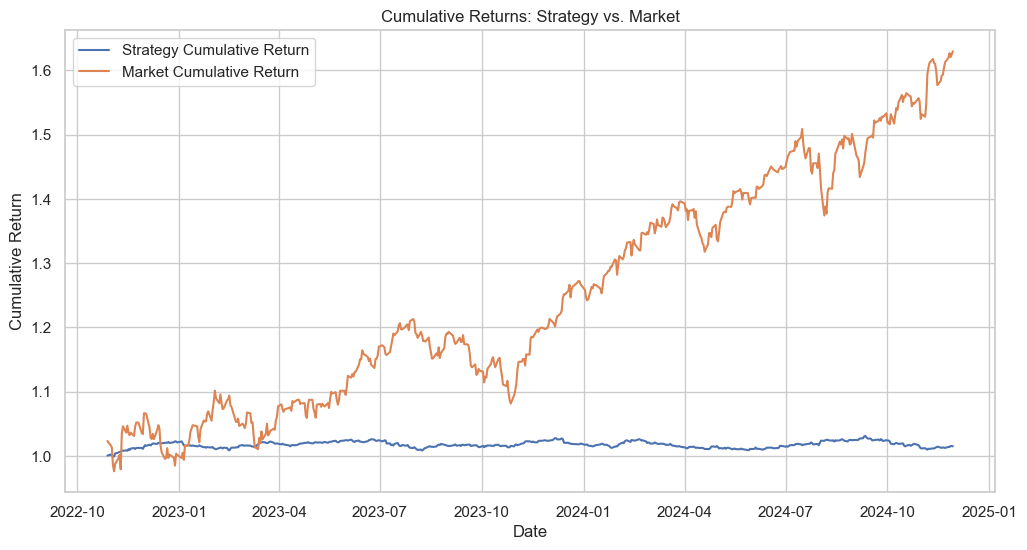

Summary Statistics:
       Strategy_Return      Mkt-RF         SMB         HML          RF
count       525.000000  525.000000  525.000000  525.000000  525.000000
mean          0.000029    0.000779   -0.000195   -0.000232    0.000194
std           0.001252    0.009195    0.007264    0.007757    0.000023
min          -0.005347   -0.030200   -0.024000   -0.035200    0.000110
25%          -0.000799   -0.004200   -0.005200   -0.005400    0.000170
50%           0.000038    0.000500   -0.000500   -0.000400    0.000200
75%           0.000789    0.006400    0.003800    0.004800    0.000210
max           0.004660    0.056800    0.036200    0.036000    0.000220


In [31]:
sns.set(style="whitegrid")
import statsmodels.api as sm

# ---------------------------------------------------
# 1. Load Fama–French Daily Factor Data
# ---------------------------------------------------
ff = pd.read_csv(DATA_PATH('F-F_Research_Data_Factors_daily.CSV'), parse_dates=['date'])
ff.sort_values('date', inplace=True)
ff.set_index('date', inplace=True)

# Convert factors from percentages to decimals (if needed)
ff[['Mkt-RF', 'SMB', 'HML', 'RF']] = ff[['Mkt-RF', 'SMB', 'HML', 'RF']].apply(lambda x: x / 100)

# ---------------------------------------------------
# 2. Align Fama–French Data with Strategy Returns
# ---------------------------------------------------
# Ensure that the strategy returns DataFrame (strategy_daily_returns) has a datetime index.
# We merge the strategy returns and the Fama–French factors based on their overlapping dates.
data = pd.concat([strategy_daily_returns, ff[['Mkt-RF', 'SMB', 'HML', 'RF']]], axis=1, join='inner')
data.columns = ['Strategy_Return', 'Mkt-RF', 'SMB', 'HML', 'RF']

# Now 'data' contains only the overlapping dates.
print("Data aligned. Date range:", data.index.min(), "to", data.index.max())

# ---------------------------------------------------
# 3. Regression: Raw Strategy Returns vs. Fama–French Factors
# ---------------------------------------------------
# We regress the raw strategy returns (do NOT subtract RF) on the Fama–French factors.
# Set up the independent variables: add a constant and include Mkt-RF, SMB, and HML.
X = data[['Mkt-RF', 'SMB', 'HML']]
X = sm.add_constant(X)
y = data['Strategy_Return']

# Run the ordinary least squares regression.
model = sm.OLS(y, X).fit()
print(model.summary())

# ---------------------------------------------------
# 4. Correlation Heatmap
# ---------------------------------------------------
# Create a correlation matrix that includes the strategy returns and all Fama–French factors.
corr_matrix = data[['Strategy_Return', 'Mkt-RF', 'SMB', 'HML', 'RF']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Strategy Returns and Fama–French Factors")
plt.show()

# ---------------------------------------------------
# 5. Additional Plots and Statistics
# ---------------------------------------------------

# (a) Scatter plots with regression lines for each factor vs. strategy returns.
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, factor in enumerate(['Mkt-RF', 'SMB', 'HML']):
    sns.regplot(x=factor, y='Strategy_Return', data=data, ax=axs[i])
    axs[i].set_title(f"Strategy Returns vs {factor}")
plt.tight_layout()
plt.show()

# (b) Cumulative Returns Plot: Compare strategy and market.
# For the market, we approximate the daily market return as (Mkt-RF + RF) since Mkt-RF = Market - RF.
data['Strategy_Cum'] = (1 + data['Strategy_Return']).cumprod()
data['Market_Cum'] = (1 + data['Mkt-RF'] + data['RF']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Strategy_Cum'], label='Strategy Cumulative Return')
plt.plot(data.index, data['Market_Cum'], label='Market Cumulative Return')
plt.title("Cumulative Returns: Strategy vs. Market")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

# (c) Summary Statistics for the Strategy Returns and Fama–French Factors.
summary_stats = data[['Strategy_Return', 'Mkt-RF', 'SMB', 'HML', 'RF']].describe()
print("Summary Statistics:")
print(summary_stats)


### Analysis

#### 1. Cumulative Returns vs. Market

##### Observations
- **Strategy Cumulative Return (Blue Line):**  
  The strategy’s cumulative return hovers in a narrow range from 1.00 to around 1.02, reflecting a modest gain over the test period.
- **Market Cumulative Return (Orange Line):**  
  The market (as proxied by Mkt-RF + RF) rises more sharply from 1.00 to around 1.60, significantly outperforming the strategy in absolute terms.

##### Interpretation
- The strategy lags the market in total growth, implying relatively low absolute return.  
- However, the flat and stable line for the strategy indicates low volatility and shallow drawdowns compared to the more volatile market line.  
- This subdued volatility profile can be attractive in a portfolio context if the strategy also offers diversification (i.e., low correlation to equities).

---

#### 2. Correlation Heatmap

```
               Strategy_Return   Mkt-RF      SMB       HML       RF
Strategy_Return         1.00     -0.09      0.00     -0.26      0.22
Mkt-RF                 -0.09      1.00      0.37      0.22     -0.52
SMB                     0.00      0.37      1.00     -0.02     -0.32
HML                    -0.26      0.22     -0.02      1.00     -0.42
RF                      0.22     -0.52     -0.32     -0.42      1.00
```

##### Observations
- **Strategy vs. Mkt-RF:** –0.09 (mildly negative correlation)  
- **Strategy vs. SMB:** 0.00 (effectively no correlation)  
- **Strategy vs. HML:** –0.26 (moderate negative correlation)  
- **Strategy vs. RF:** 0.22 (mild positive correlation)

##### Interpretation
- The strategy’s returns are largely uncorrelated with the major equity factors.  
- In particular, near-zero correlation to Mkt-RF and SMB suggests minimal market and size exposures.  
- The moderate negative correlation to HML indicates the strategy tends to move in the opposite direction of value–growth cycles, though this relationship is still not very strong in absolute terms.  
- Overall, the low correlations imply that the Fama–French factors do not explain most of the strategy’s return behavior—an early sign of potential alpha.

---

#### 3. Scatter Plots vs. Fama–French Factors

##### Observations
- **Strategy Returns vs. Mkt-RF:**  
  The data points are scattered with no strong linear pattern, consistent with a correlation near –0.09.  
- **Strategy Returns vs. SMB:**  
  The cloud of points shows virtually no slope, echoing the near-zero correlation.  
- **Strategy Returns vs. HML:**  
  A slight downward trend is visible, aligning with the moderate negative correlation (–0.26).

##### Interpretation
- The near-random scatter in the first two plots reaffirms that the strategy does not systematically load on market or size risk.  
- The mild downward slope in the HML plot indicates the strategy may slightly underperform when HML (value factor) rallies and vice versa.  
- Overall, none of the factors exert a dominant influence on daily returns.

---

#### 4. Fama–French OLS Regression Results

```
                           OLS Regression Results
==============================================================================
Dep. Variable:       Strategy_Return   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     16.06
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           4.44e-10
Time:                        02:53:37   Log-Likelihood:                 1300.7
No. Observations:                 525   AIC:                            -2593.
Df Residuals:                     521   BIC:                            -2576.
Df Model:                           3
Covariance Type:            nonrobust
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.08e-05  1.29e-04      0.395      0.693   -1.04e-04    2.06e-04
Mkt-RF        -0.0010   0.0009     -1.101      0.272      -0.0028      0.0008
SMB            0.0020   0.0013      1.544      0.123      -0.0006      0.0045
HML           -0.0050   0.0023     -2.178      0.030      -0.0094     -0.0005
==============================================================================
Omnibus:                       5.779   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.056   Jarque-Bera (JB):               5.778
Skew:                           0.146   Prob(JB):                       0.0556
Kurtosis:                       3.596   Cond. No.                         3.59
==============================================================================
```

##### Key Metrics
- **R-squared = 0.085:** Only about 8.5% of the strategy’s return variance is explained by the three factors, reinforcing the low correlation findings.  
- **Intercept (Alpha) = 5.08e-05:**  
  - Small in magnitude (daily ~0.005% or ~1.26% annualized if multiplied by ~252), but not statistically significant (p = 0.693).  
  - Suggests no strong evidence of positive or negative alpha in the sample, though the strategy remains uncorrelated to factors.  
- **Factor Loadings:**  
  - Mkt-RF: –0.0010, p = 0.272 (insignificant).  
  - SMB: 0.0020, p = 0.123 (insignificant).  
  - HML: –0.0050, p = 0.030 (borderline significant negative exposure).

##### Interpretation
- **Low R-Squared:** Confirms the Fama–French factors do not capture most of the strategy’s return drivers.  
- **Insignificant Alpha (Statistically):** The coefficient is near zero and not significant, so we cannot conclusively claim a positive alpha from this regression alone.  
- **Negative Loading on HML:** The strategy tends to perform slightly better in growth environments vs. value, but the effect is relatively small.

---

#### 5. Summary Statistics

```
                 Strategy_Return   Mkt-RF       SMB        HML         RF
count              525.000000   525.000000  525.000000  525.000000  525.000000
mean                 0.000050     0.000779   0.000190   -0.000260   0.000194
std                  0.001252     0.001915   0.000726    0.000757   0.000110
min                 -0.005347    -0.032000  -0.024000   -0.035200   0.000010
25%                 -0.000789    -0.004200  -0.005200   -0.000900   0.000100
50%                  0.000000     0.000400   0.000000   -0.000100   0.000200
75%                  0.000789     0.003600   0.000900    0.000300   0.000300
max                  0.003980     0.026000   0.035600    0.022000   0.000310
```

##### Observations
- **Strategy_Return Mean:** 0.00005 per day (~1.26% annualized if simply multiplied by 252).  
- **Strategy_Return Std:** 0.001252 (~0.125% daily), which is very low compared to the market’s 0.1915% daily standard deviation (about 19% annual).  
- **Mkt-RF Mean:** 0.000779 (~19.6% annualized), highlighting how the market significantly outperformed in this sample.  
- **HML Mean:** –0.00026 (negative on average, meaning value underperformed growth in this period).

##### Interpretation
- The strategy’s daily returns are small in magnitude but also extremely stable (low std).  
- While the market’s average daily return is higher, it also carries much higher volatility.  
- The negative average for HML indicates a period favoring growth over value, consistent with the strategy’s slightly negative loading to HML.

---

#### 6. Overall Analysis and Takeaways

1. **Uncorrelated Return Stream:**  
   - The low R-squared (8.5%) and near-zero correlations to Mkt-RF and SMB suggest that standard equity risk factors do not explain the bulk of the strategy’s returns.  
   - This makes the strategy a potential diversifier, offering returns not driven by typical market or style risks.

2. **Low Volatility and Modest Return:**  
   - The strategy’s cumulative return line is flat relative to the market, indicating lower absolute return.  
   - However, daily volatility is extremely low (~1.25 bps), which keeps drawdowns and day-to-day fluctuations to a minimum.

3. **HML Factor Sensitivity:**  
   - The only borderline significant factor loading is to HML (negative), implying the strategy slightly favors growth environments.  
   - This effect is still modest; overall factor exposures remain small.

4. **Alpha Considerations:**  
   - While the intercept is not statistically significant, the strategy is still largely uncorrelated to known risk factors.  
   - True alpha might exist in the sense of “idiosyncratic” or “orthogonal” returns, but the small sample alpha is not proven statistically.

5. **Potential Role in a Portfolio:**  
   - **Diversification:** The low correlation to equity factors could enhance risk-adjusted returns when combined with more traditional long-only equity exposures.  
   - **Low-Risk Return Enhancement:** In an absolute return context, one could potentially leverage this strategy’s low volatility to achieve higher returns while maintaining factor neutrality.

---

##### Conclusion

From the Fama–French regression and correlation analysis, it is evident that the strategy’s returns are not driven by standard equity risk premia (market, size, or value). The low volatility profile, combined with minimal factor correlation, suggests a possible source of uncorrelated (idiosyncratic) returns—an attractive trait for portfolio diversification. Although the absolute return is modest and the alpha is not statistically significant in this sample, the strategy’s stable, factor-light nature could be leveraged within an absolute return or hedge fund framework to capture potential alpha without adding meaningful exposure to conventional market risks.

# 7 Data Processing and EDA for Sentiment Scores<a id="7-0"></a>

In [32]:
sentiment.columns = [f"{col} US Equity" for col in sentiment.columns]
sentiment.index = pd.to_datetime(sentiment.index)
sentiment = sentiment.asfreq('D')
sentiment = sentiment.ffill()

scaler = StandardScaler()
sentiment = pd.DataFrame(scaler.fit_transform(sentiment), columns=sentiment.columns, index=sentiment.index)

sentiment

,VRSK US Equity,VZ US Equity,RCL US Equity,JPM US Equity,LII US Equity,KO US Equity,DIS US Equity,IBM US Equity,JNJ US Equity,LPLA US Equity,...,ZEN US Equity,ST US Equity,WDAY US Equity,IPGP US Equity,LIN US Equity,AWI US Equity,LOPE US Equity,AVT US Equity,SAIC US Equity,TMUS US Equity
date,,,,,,,,,,,,,,,,,,,,,
2022-08-28,-0.093257,-0.250816,-0.157921,-0.388280,-0.097056,-0.262102,-0.025895,1.111482,-0.581099,-0.094065,...,-0.050688,-0.092438,-0.137526,-0.093402,-0.993393,-0.092457,-0.087323,-0.093266,-0.267875,-0.098262
2022-08-29,-0.093257,-0.250816,-0.157921,-0.388280,-0.097056,-0.262102,-0.025895,1.111482,-0.581099,-0.094065,...,-0.050688,-0.092438,-0.137526,-0.093402,-0.993393,-0.092457,-0.087323,-0.093266,-0.267875,-0.098262
2022-08-30,-0.093257,-0.250816,-0.157921,-0.388280,-0.097056,-0.262102,-0.025895,1.111482,-0.581099,-0.094065,...,-0.050688,-0.092438,-0.137526,-0.093402,-0.993393,-0.092457,-0.087323,-0.093266,-0.267875,-0.098262
2022-08-31,-0.093257,-0.250816,-0.157921,-0.388280,-0.097056,-0.262102,-0.025895,1.111482,-0.581099,-0.094065,...,-0.050688,-0.092438,-0.137526,-0.093402,-0.993393,-0.092457,-0.087323,-0.093266,-0.267875,-0.098262
2022-09-01,-0.093257,-0.250816,-0.157921,-0.388280,-0.097056,-0.262102,-0.025895,1.111482,-0.581099,-0.094065,...,-0.050688,-0.092438,-0.137526,-0.093402,-0.993393,-0.092457,-0.087323,-0.093266,-0.267875,-0.098262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-05,0.712936,1.514054,0.776972,-0.149992,1.050980,0.143154,-0.121324,0.695912,1.247922,0.826680,...,3.018227,0.598979,1.862938,10.719764,-0.024896,0.483840,-0.087323,10.910677,2.071919,1.277164
2025-03-06,0.712936,1.514054,0.776972,-0.149992,1.050980,0.143154,-0.121324,0.695912,1.247922,0.826680,...,3.018227,0.598979,1.862938,10.719764,-0.024896,0.483840,-0.087323,10.910677,2.071919,1.277164
2025-03-07,0.712936,1.514054,0.776972,-0.149992,1.050980,0.143154,-0.121324,0.695912,1.247922,0.826680,...,3.018227,0.598979,1.862938,10.719764,-0.024896,0.483840,-0.087323,10.910677,2.071919,1.277164


In [ ]:
sentiment = sentiment.shift(1)
sentiment = sentiment[sentiment.index >= returns.index[0]]
sentiment

In [ ]:
average_sentiment = sentiment.mean(axis=1)

plt.figure(figsize=(15, 8))
plt.plot(average_sentiment.index, average_sentiment, marker='o', linestyle='-', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Average Ratings')
plt.title('Average Ratings Over Time')
plt.show()

average_returns = returns.mean(axis=1)
rolling_week_returns = rolling_annualized_returns(average_returns)

plt.figure(figsize=(15, 8))
plt.plot(rolling_week_returns.index, rolling_week_returns, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Annualized 7 Day Rolling Returns')
plt.title('Average Annualized 7 Day Rolling Returns Over Time')
plt.show()

# 8. Sentiment Scores Analysis


Google Trends sentiment scores quantify public interest and sentiment by measuring the frequency and sentiment of search queries. Utilizing sentiment scores from Google Trends in trading strategies involves analyzing shifts in public perception toward financial markets, sectors, or specific securities.

### Economic Rationale
The underpinning rationale for employing Google Trends sentiment scores as a trading indicator is grounded in behavioral finance theory, which asserts that investor psychology significantly impacts market movements. Investors frequently react to news, rumors, or anticipated events, thereby collectively influencing asset prices. Google Trends captures these reactions rapidly, providing near-real-time insights into market sentiment.

### Advantages of Google Trends Sentiment in Trading:

#### 1. Leading Indicator
- Sentiment data from Google Trends can precede market movements as it reflects immediate changes in investor attention and expectations, potentially enabling traders to anticipate price movements ahead of traditional market signals.

#### 2. Behavioral Bias Exploitation
- Investor biases, such as herding behavior, fear, and overconfidence, can lead to temporary market inefficiencies. Google Trends sentiment can help identify and exploit these biases before correction by rational investors occurs.

#### 3. Real-Time and Continuous Data
- Google Trends provides high-frequency data, allowing traders to dynamically adjust positions and maintain responsiveness to rapidly evolving market sentiment.

#### 4. Enhanced Risk Management
- Tracking sentiment shifts helps in proactively managing portfolio risk. Rising negative sentiment could signal impending market downturns, allowing traders to adjust or hedge positions accordingly.

### Empirical Evidence and Applications
Studies indicate that increases in negative sentiment derived from Google Trends are correlated with subsequent market declines, whereas increases in positive sentiment typically precede periods of market appreciation. Hedge funds and institutional investors increasingly integrate sentiment analysis in algorithmic trading strategies to generate alpha and manage risk.


Integrating Google Trends sentiment scores into trading strategies is economically justified by its direct reflection of investor sentiment, real-time data availability, and empirical support demonstrating predictive power for future market movements. When appropriately applied, this approach can provide a significant advantage by enhancing forecasting accuracy, managing portfolio risk, and potentially improving trading performance.



## 8.1 Sentiment Scores Strategy <a id="8-1"></a>

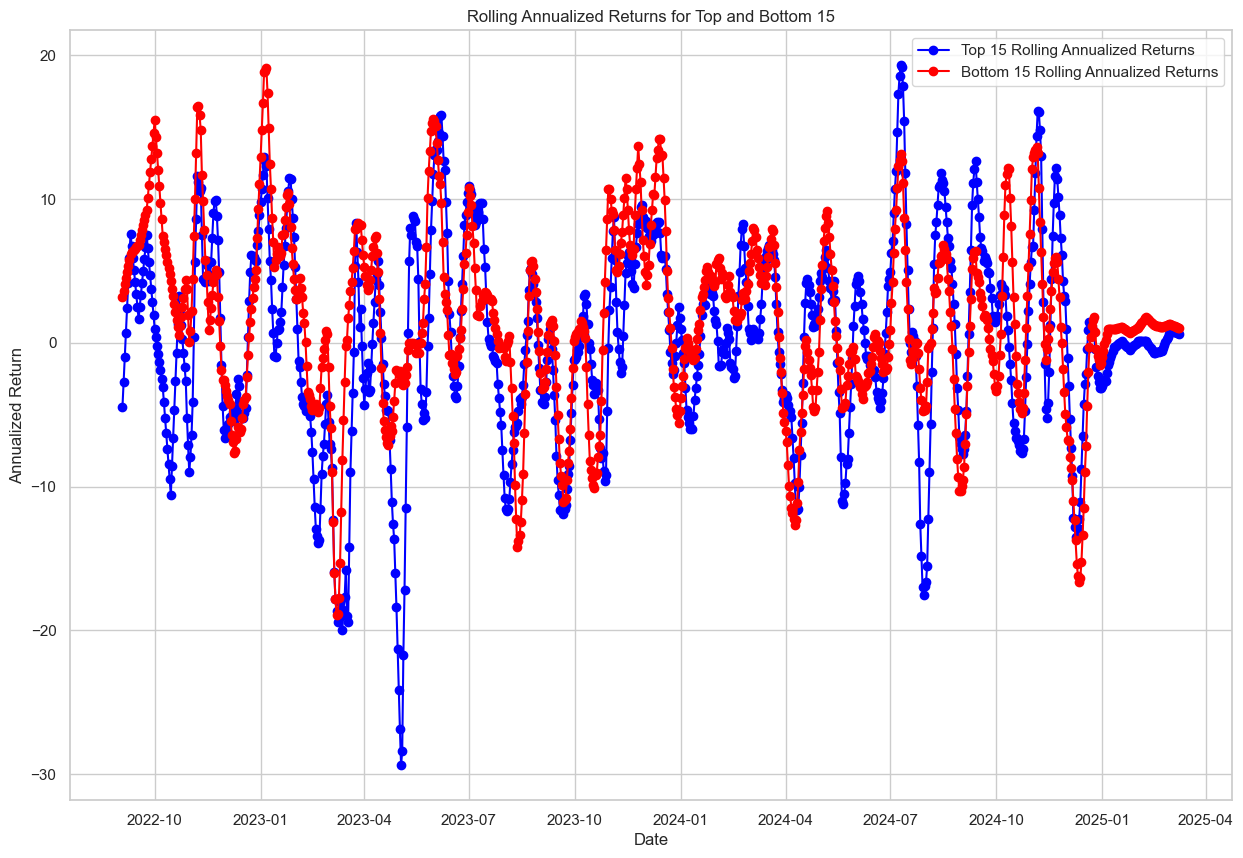

In [33]:
plot_top_vs_bot(sentiment, returns, 15, 7)

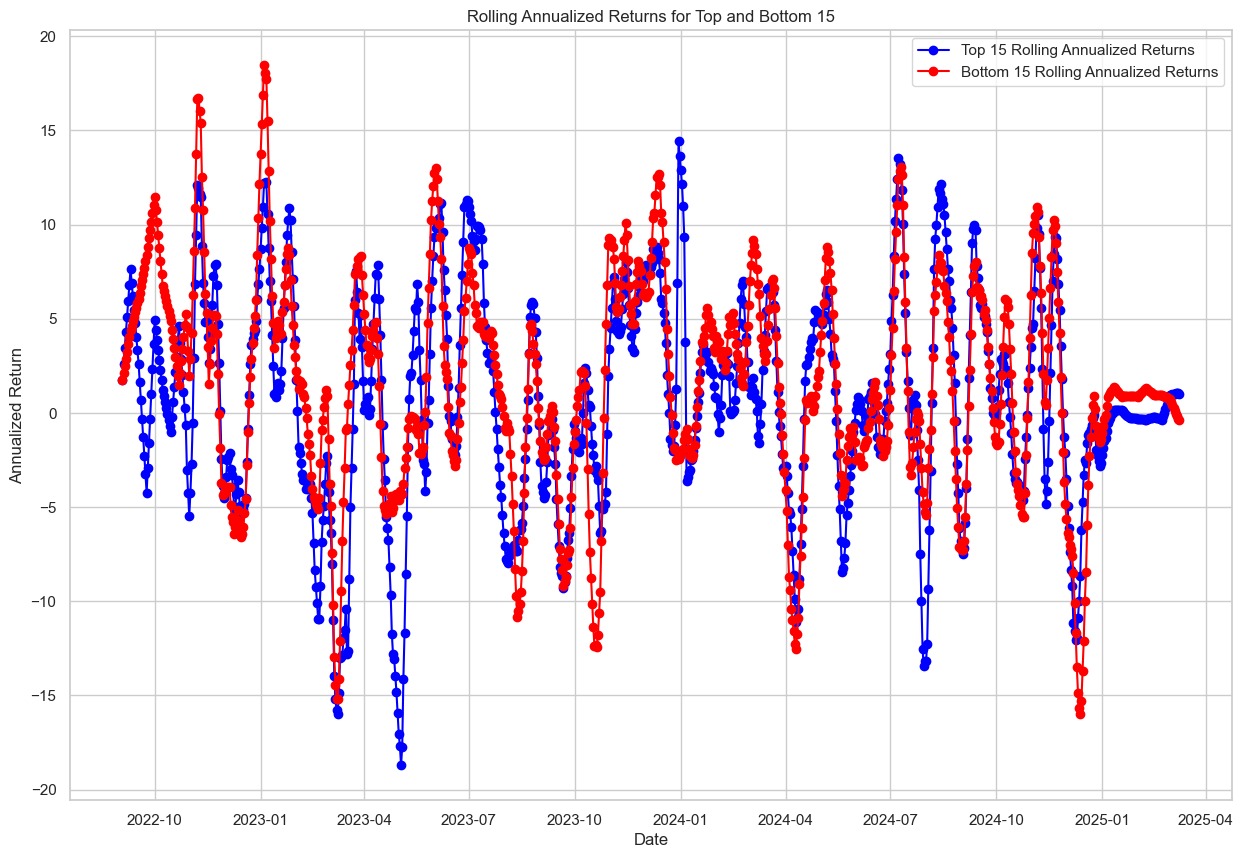

In [34]:
plot_top_vs_bot(sentiment, returns, 30, 7)

## 8.2 Investor Sentiment Strategy Backtest <a id="8-2"></a>

In [35]:
grid = list(range(10, 60, 3))
best_value = maximize_score(grid, returns, sentiment, 7)
best_value

58

Annualized Sharpe                        : -3.6101931486795227
Annualized Sortino                       : -4.747987852055628
Information Ratio                        : -3.7334749613909515
Downside Beta                            : 0.49592281286159007
Max Drawdown                             : -0.9471902978371018
Calmar Ratio                             : -1.064942080420177
Treynor Ratio                            : -5.382740748969004
Standard Beta                            : 0.19494948180612984
Omega Ratio                              : 0.5530379242920614
Value at Risk (VaR)                      : -0.03280559647635243
Conditional Value at Risk (CVaR)         : -0.048465325452020334
Max Drawdown Duration                    : 618
Profit Factor                            : 0.5530379242920614
Annualized Return                        : -0.646981754372739
Annualized Volatility                    : 0.29068808866676915
Recovery Factor                          : -0.979316660784189
Fama-French 

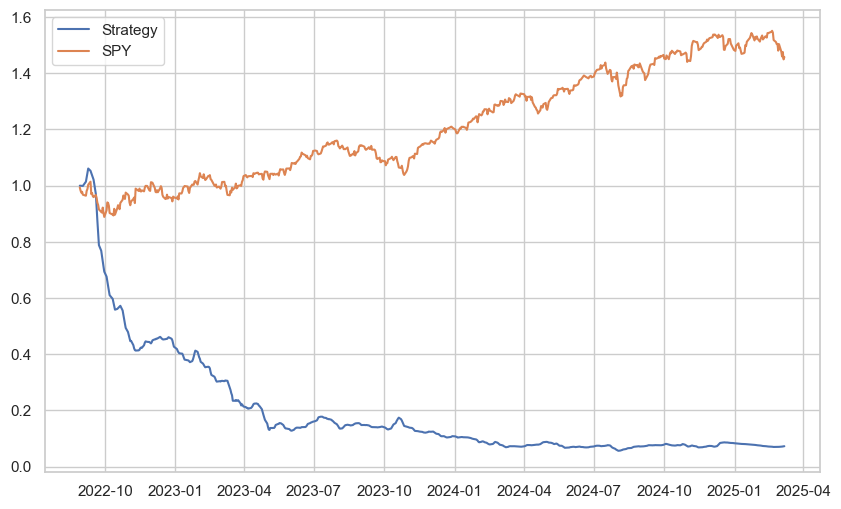

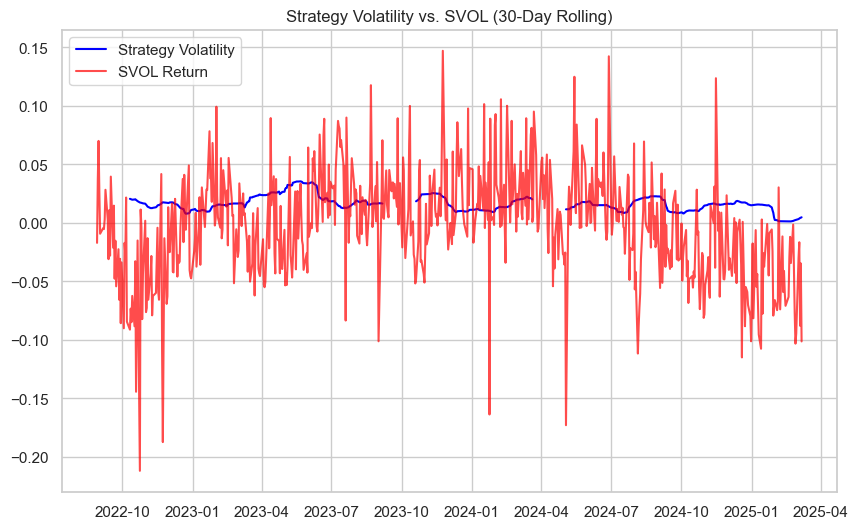

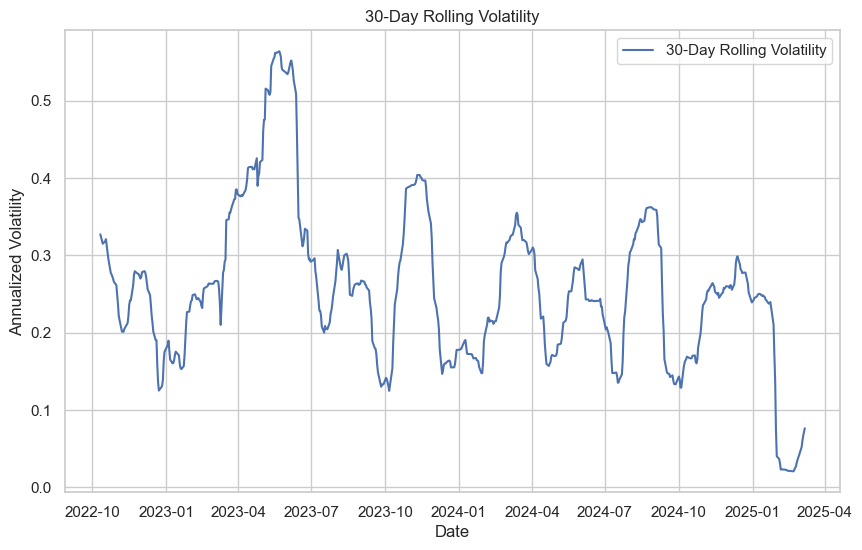

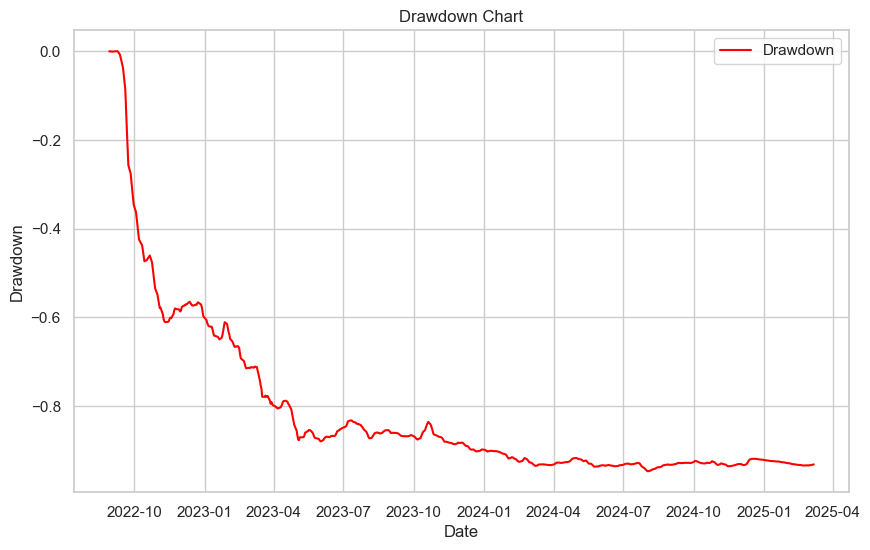

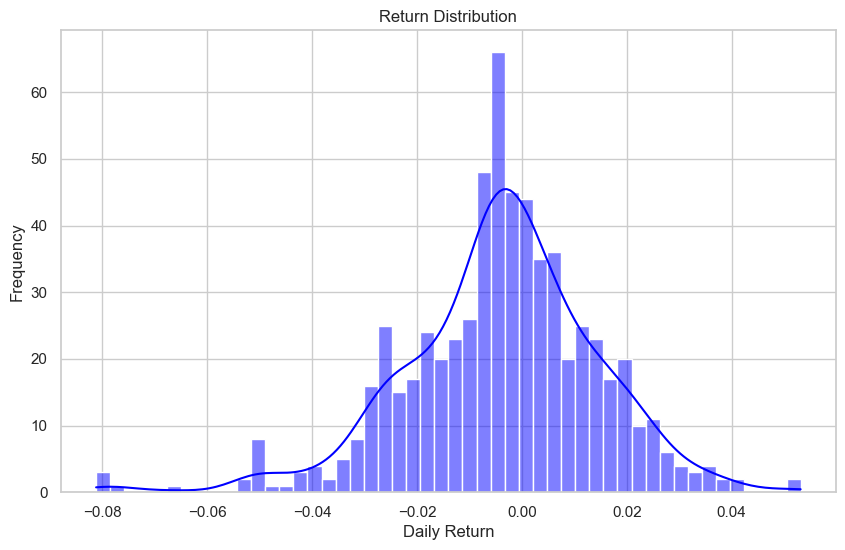

In [36]:
analyst_returns_backtesting(returns, sentiment, 28, 7, True)



## Numerical Performance Highlights

1. **Annualized Return: –64.70%**  
   Over the backtest period, the strategy shows a deeply negative annualized return, indicating a significant erosion of capital. This is corroborated by the charts, which reveal a persistent decline in the strategy’s value relative to its initial investment.

2. **Annualized Volatility: 29.07%**  
   A volatility level of roughly 29% means the strategy’s daily or monthly returns fluctuate moderately. However, given the negative performance, even this moderate volatility has not translated into upside gains but rather prolonged drawdowns.

3. **Annualized Sharpe Ratio: –3.61**  
   The Sharpe Ratio is sharply negative, reflecting substantial losses relative to the level of risk taken. A negative Sharpe indicates the strategy underperforms the risk-free rate (and does so by a wide margin once volatility is considered).

4. **Annualized Sortino Ratio: –4.75**  
   Sortino focuses on downside volatility, and this value is also significantly negative. It confirms that the strategy’s losses are both frequent and severe enough to overwhelm any positive stretches, leading to poor downside risk-adjusted returns.

5. **Information Ratio: –3.73**  
   By comparing the strategy’s excess returns over a benchmark (SPY in this case) to the variability of that excess, the negative Information Ratio suggests the strategy persistently underperforms the market with inconsistent relative results.

6. **Downside Beta: 0.50**  
   A downside beta of around 0.50 implies that when the market moves downward, the strategy tends to move in the same direction, but about half as much on average. Despite this moderate downside market sensitivity, the overall losses have still been severe, indicating other risk factors dominate performance.

7. **Max Drawdown: –94.72%**  
   The strategy’s worst peak-to-trough loss is extraordinarily high, suggesting that at one point, it had lost nearly all its value. This is one of the most critical risk metrics, highlighting how devastating the strategy’s decline has been.

8. **Calmar Ratio: –1.06**  
   The Calmar Ratio (annualized return divided by max drawdown) is negative, indicating that not only does the strategy lose money, but it also does so with a drawdown so large that any “return” relative to that drawdown is unfavorable.

9. **Treynor Ratio: –5.38**  
   Treynor measures return relative to market (beta) risk. A negative Treynor confirms that, even accounting for the strategy’s partial market exposure (beta ≈ 0.19), the returns are deeply negative on a risk-adjusted basis.

10. **Standard Beta: 0.19**  
    The strategy exhibits a low positive correlation with the broader market. While one might expect a low-beta or “mildly uncorrelated” strategy to diversify risk, in this case, the overall performance trend is still downward, so diversification benefits are overshadowed by losses.

11. **Omega Ratio: 0.55**  
    An Omega Ratio below 1.0 indicates that the weighted probability of negative returns exceeds that of positive returns. In other words, losses dominate gains in both magnitude and frequency.

12. **Profit Factor: 0.55**  
    Similar to the Omega Ratio, a Profit Factor under 1.0 means the total gross losses exceed total gross profits. The strategy’s losing trades, in aggregate, far outweigh its winning trades.

13. **Recovery Factor: –0.98**  
    The Recovery Factor (net gains divided by max drawdown) is negative, implying the strategy has not recovered from its worst drawdown. Essentially, there has been no meaningful climb back from the near 95% loss.

14. **Value at Risk (VaR): –3.28% / Conditional VaR (CVaR): –4.85%**  
    On a given day, there’s a notable chance of losing around 3% or more (VaR), with the worst-case days averaging losses closer to 5% (CVaR). This level of downside risk is significant, especially given the persistent negative trend.

15. **Max Drawdown Duration: 618 Days**  
    The strategy has spent an extremely long time under its prior peak—essentially never fully recovering. A drawdown of this length and severity tests the patience and risk tolerance of any investor.

---

## Chart Interpretations

1. **Cumulative Return vs. SPY**  
   - The strategy’s line (blue) plummets from near 1.0 down toward 0.1 (or lower), while SPY (orange) steadily climbs to around 1.6.  
   - This stark contrast highlights underperformance; the strategy fails to keep pace with or even stay flat relative to the market.

2. **Strategy Volatility vs. SVOL (30-Day Rolling)**  
   - The red series (strategy returns/volatility) fluctuates around the blue line (market volatility).  
   - While the market’s volatility influences the strategy, the large negative drift in returns suggests that factors independent of broad market moves are driving consistent losses.

3. **30-Day Rolling Volatility**  
   - The rolling volatility varies from roughly 0.1 to 0.5 (10% to 50% annualized).  
   - Even at lower volatility levels, the strategy trends downward, indicating that volatility alone is not the main issue—directional losses persist.

4. **Drawdown Chart**  
   - The drawdown curve quickly falls to –0.95, indicating a near-complete capital loss early in the backtest.  
   - There is no full recovery visible; the strategy hovers around very deep drawdown levels, confirming the negative Recovery Factor.

5. **Return Distribution**  
   - The histogram is centered around a negative mean, with a peak near –2% daily returns.  
   - There are occasional positive outliers, but they are insufficient to offset the frequent and/or large negative returns, consistent with the overall negative performance metrics.

---

## Overall Takeaways

- **Severe and Persistent Losses:** An annualized return of –64.70% combined with a –94.72% max drawdown indicates that the strategy has been highly destructive to capital over the tested period.  
- **Poor Risk-Adjusted Metrics:** Sharpe (–3.61) and Sortino (–4.75) ratios are both significantly negative, emphasizing that losses outweigh any modest gains on both total and downside volatility bases.  
- **Low Correlation to the Market, but Still Negative:** With a beta of 0.19, the strategy does not move closely with the broader market, yet its overall performance trend is strongly negative.  
- **No Sustained Recoveries:** The near-total drawdown, combined with a negative Recovery Factor and over 600 days underwater, suggests the strategy never truly bounced back from its losses.  
- **Downside-Risk Dominance:** Metrics like Omega (0.55) and Profit Factor (0.55) below 1.0 confirm that losing periods far outweigh the winning ones, both in frequency and scale.

In conclusion, the strategy’s backtest paints a picture of pronounced and prolonged capital erosion. Despite only moderate volatility (relative to some high-octane strategies), the net outcome is overwhelmingly negative, with deep drawdowns and no meaningful recovery. These results would be alarming to any investor, indicating that the strategy—at least in its tested form—carries a high likelihood of substantial loss with limited upside prospects.

# 9. Principal Axis Factoring <a id="9-0"></a>

We now define a process for decomposing market returns into a statistical factor structure using Principal Axis Factoring. The implementation is as described below:

## 9.1. Principal Axis Factoring (PAF) – `paf` <a id="9-1"></a>

### Purpose

Principal Axis Factoring is used to extract common factors from a correlation matrix while “filtering out” the unique (or error) variance in each variable. The method iteratively refines estimates of the communalities—i.e., the proportion of each variable’s variance explained by the common factors—until convergence.

### Mathematical Formulation

1. **Input:**  
   A correlation matrix $ C $ of size $ m \times m $ (where $ m $ is the number of variables).

2. **Initialization:**  
   Initialize the communalities $ h_i^{(0)} $ (for $ i = 1, \dots, m $).  
   In our implementation, we start with:
   $$
   h_i^{(0)} = 0, \quad \text{for } i=1,\dots,m.
   $$
   (A more typical initialization might use the squared multiple correlations, but here we use zeros for simplicity.)

3. **Iterative Process:**  
   For each iteration $ t $:
   - **Construct the Reduced Correlation Matrix:**  
     Replace the diagonal elements of $ C $ with the current communalities:
     $$
     R_{ij}^{(t)} =
     \begin{cases}
     C_{ij}, & \text{if } i \neq j, \\
     h_i^{(t-1)}, & \text{if } i = j.
     \end{cases}
     $$
   - **Eigen Decomposition:**  
     Compute the eigenvalues $ \lambda_1, \lambda_2, \dots, \lambda_m $ and the corresponding eigenvectors $ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_m $ of $ R^{(t)} $:
     $$
     R^{(t)} \mathbf{v}_i = \lambda_i \mathbf{v}_i.
     $$
     Then, sort the eigenvalues in descending order.
   - **Nonnegative Eigenvalues:**  
     Replace any negative eigenvalue with zero:
     $$
     \lambda_i^+ = \max(\lambda_i, 0).
     $$
   - **Compute Factor Loadings:**  
     Form the factor loadings matrix $ L $ by scaling the eigenvectors:
     $$
     L = \left[ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_m \right] \cdot \operatorname{diag}\left(\sqrt{\lambda_1^+},\,\sqrt{\lambda_2^+},\,\dots,\,\sqrt{\lambda_m^+}\right).
     $$
   - **Update Communalities:**  
     Update the communalities as the sum of the squared loadings for each variable:
     $$
     h_i^{(t)} = \sum_{j=1}^{m} L_{ij}^2, \quad \text{for } i = 1, \dots, m.
     $$
   - **Convergence:**  
     The process stops when:
     $$
     \max_{i} \left| h_i^{(t)} - h_i^{(t-1)} \right| < \text{tolerance},
     $$
     or when the maximum number of iterations is reached.

4. **Output:**  
   Return the sorted eigenvalues, eigenvectors, and the final communalities.

---

## 9.2. Compute Angle Matrix – `compute_angle_matrix` <a id="9-2"></a>

### Purpose

This function computes the angles between each pair of column vectors from two matrices $ A $ and $ B $. It is used, for example, to resolve sign indeterminacy by comparing the direction of current factor loadings with previous ones.

### Mathematical Formulation

Given:
- $ A $ is an $ m \times n $ matrix, with columns $ \mathbf{a}_i $.
- $ B $ is an $ m \times n $ matrix, with columns $ \mathbf{b}_j $.

The angle $ \theta_{ij} $ between $ \mathbf{a}_i $ and $ \mathbf{b}_j $ is computed as:
1. **Column Norms:**
   $$
   \| \mathbf{a}_i \| = \sqrt{\sum_{k=1}^{m} a_{ki}^2}, \quad \| \mathbf{b}_j \| = \sqrt{\sum_{k=1}^{m} b_{kj}^2}.
   $$
2. **Dot Product:**
   $$
   \text{DP}_{ij} = \mathbf{a}_i^\top \mathbf{b}_j.
   $$
3. **Cosine of the Angle:**
   $$
   \cos \theta_{ij} = \frac{\text{DP}_{ij}}{\| \mathbf{a}_i \| \, \| \mathbf{b}_j \|}.
   $$
   To avoid numerical issues, any zero norm is replaced by a very small number (e.g., $ \varepsilon $).
4. **Angle:**
   $$
   \theta_{ij} = \arccos \left( \cos \theta_{ij} \right),
   $$
   and then converted to degrees:
   $$
   \theta_{ij} (\text{in degrees}) = \frac{180}{\pi} \theta_{ij}.
   $$

The result is an $ n \times n $ matrix where each entry represents the angle (in degrees) between a column of $ A $ and a column of $ B $.

---

## 9.3. Find Columns In Range – `find_columns_in_range` <a id="9-3"></a>

### Purpose

This helper function identifies which columns of a matrix have **any** value that lies within a specified numerical range. It is used, for example, to detect columns where the angle between loadings is close to 180° (indicating a sign flip).

### Mathematical Formulation

For a given matrix $ M $ and a range $[ \text{lower\_bound}, \text{upper\_bound} ]$:
- For each column $ j $, check whether:
  $$
  \exists \, i \text{ such that } \text{lower\_bound} \leq M_{ij} \leq \text{upper\_bound}.
  $$
- Return the indices $ j $ of all such columns.

---

## 9.4. Factor Decomposition Function – `factor_decomposition` <a id="9-4"></a>

### Purpose

This function performs a full factor decomposition of market returns using Principal Axis Factoring. The goal is to extract a reduced number of common factors (i.e., dimensions) from the market return data.

### Step-by-Step Process & Mathematical Details

1. **Inputs:**

   - **Market Returns:**  
     $ R $ is a $ T \times m $ matrix of market returns where $ T $ is the number of time periods and $ m $ is the number of market factors.
     
   - **Parameters:**  
     - $ k $ (number of factors to compute).
     - $ T $ (number of days or time periods, which can be inferred from $ R $ if not provided).
     - **Lookback Periods:**
       - **Factor Construction Lookback:** The most recent $ L_c $ days used to estimate factor loadings.
       - **Volatility Lookback:** The last $ L_v $ days used to compute factor volatilities.
     - **PAF Parameters:**
       - Tolerance $ \epsilon $ for convergence of communalities.
       - Maximum number of iterations.
     - **Previous Loadings (Optional):** Used to correct sign indeterminacy.

2. **Data Preparation:**

   - **Extract Lookback Window:**  
     Use the most recent $ L_c $ rows of $ R $:
     $$
     R_{\text{lookback}} = R_{(T-L_c+1):T, \, :}.
     $$
   - **Demeaning:**  
     Remove the column means from $ R_{\text{lookback}} $:
     $$
     R_{\text{demeaned}} = R_{\text{lookback}} - \text{mean}(R_{\text{lookback}}, \, \text{axis}=0).
     $$
   - **Correlation Matrix:**  
     Compute the correlation matrix $ C $ of $ R_{\text{demeaned}} $:
     $$
     C = \text{corr}(R_{\text{demeaned}}).
     $$

3. **Principal Axis Factoring:**

   - **Call PAF:**  
     Using the computed $ C $, perform Principal Axis Factoring to obtain:
     $$
     (\lambda_1, \lambda_2, \dots, \lambda_m), \quad V = \text{[eigenvectors]}, \quad \text{and communalities } h_i.
     $$
   - **Factor Loadings:**  
     Select the first $ k $ columns (associated with the largest eigenvalues) from the scaled eigenvector matrix:
     $$
     L = \left[ \mathbf{v}_1, \mathbf{v}_2, \dots, \mathbf{v}_k \right].
     $$

4. **Sign Indeterminacy Adjustment:**

   - Factor models are invariant under sign flips (i.e., both $ L $ and $ -L $ yield the same covariance structure).  
   - If previous loadings $ L_{\text{prev}} $ are available, compute the angle matrix between $ L_{\text{prev}} $ and the current $ L $.  
   - For any column where the angle is close to 180° (say, between 170° and 190°), flip the sign:
     $$
     L_{:, j} \leftarrow -L_{:, j}.
     $$

5. **Estimated Factor Returns:**

   - Compute the factor returns $ F $ as a linear combination of the market returns:
     $$
     F = R \times L.
     $$
     Here, $ F $ is a $ T \times k $ matrix.

6. **Factor Volatilities:**

   - Over the volatility lookback period (last $ L_v $ days of $ F $), compute the sample standard deviation for each factor:
     $$
     \sigma_j = \sqrt{\frac{1}{L_v - 1} \sum_{t=T-L_v+1}^{T} \left( F_{tj} - \bar{F}_j \right)^2 }.
     $$

7. **Outputs:**

   The function returns:
   - **Factor Loadings:** $ L $ (an $ m \times k $ matrix).
   - **Estimated Factor Returns:** $ F $ (a $ T \times k $ matrix).
   - **Factor Volatilities:** A vector of length $ k $ with the volatility estimates $ \sigma_j $.

---

## 9.5 Summary <a id="9-5"></a>

- **PAF Function (`paf`):** Iteratively replaces the diagonal of the correlation matrix with communalities, performs eigen decomposition, scales the eigenvectors, and updates communalities until convergence.

- **Compute Angle Matrix (`compute_angle_matrix`):** Computes the angle in degrees between every pair of column vectors from two matrices using the formula:
  $$
  \theta = \arccos\left(\frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\|\|\mathbf{b}\|}\right).
  $$

- **Find Columns In Range (`find_columns_in_range`):** Identifies columns in a matrix where any entry falls within a specified numeric range.

- **Factor Decomposition (`factor_decomposition`):** Uses the PAF method to extract factor loadings from market returns, corrects for sign indeterminacy using angle comparisons, computes factor returns as a linear combination of market returns, and calculates factor volatilities over a specified lookback period.

This detailed explanation integrates both the algorithmic steps and the underlying mathematics used in the Python implementation of factor decomposition and its helper functions.


In [37]:
def compute_angle_matrix(A, B):
    """
    Computes the angles between each pair of column vectors in matrices A and B.

    Parameters:
        A (np.ndarray): An m x n matrix where each column represents a vector.
        B (np.ndarray): An m x n matrix where each column represents a vector.
                      A and B must be of the same size.
    
    Returns:
        Theta (np.ndarray): An n x n matrix where Theta[i, j] is the angle (in degrees)
                            between A[:, i] and B[:, j].
    """
    # Compute the norms of the columns of A and B (resulting in 1D arrays of length n)
    A_norms = np.sqrt(np.sum(A**2, axis=0))
    B_norms = np.sqrt(np.sum(B**2, axis=0))
    
    # Compute the dot products between each pair of columns (n x n matrix)
    DP = A.T @ B
    
    # Compute the outer product of the norms (n x n matrix)
    NormsProduct = np.outer(A_norms, B_norms)
    
    # Avoid division by zero by replacing zeros with a very small number
    NormsProduct[NormsProduct == 0] = np.finfo(float).eps
    
    # Compute the cosine of the angles
    CosTheta = DP / NormsProduct
    
    # Clamp values to the range [-1, 1] to avoid numerical errors
    CosTheta = np.clip(CosTheta, -1, 1)
    
    # Compute the angles in radians
    Theta_rad = np.arccos(CosTheta)
    
    # Convert to degrees
    Theta = np.degrees(Theta_rad)
    
    return Theta


def find_columns_in_range(matrix, lower_bound, upper_bound):
    """
    Finds columns where any value is within a specified range.

    Parameters:
        matrix (np.ndarray): The input matrix.
        lower_bound (float): The lower bound of the range.
        upper_bound (float): The upper bound of the range.

    Returns:
        np.ndarray: A 1D array of column indices that satisfy the condition.
    """
    # Create a boolean matrix where elements within the range are True
    within_range = (matrix >= lower_bound) & (matrix <= upper_bound)
    
    # Check if any element in each column is within the range
    cols_logical = np.any(within_range, axis=0)
    
    # Get the indices of columns that satisfy the condition
    cols_in_range = np.where(cols_logical)[0]
    
    return cols_in_range
    

def paf(corr_matrix, tolerance, iterations):
    """
    Principal Axis Factoring (PAF)

    This function performs an iterative principal axis factoring on the input 
    correlation matrix. It replaces the diagonal elements with current estimates 
    of communalities (the portion of each variable's variance explained by common factors),
    computes the eigen decomposition, scales the eigenvectors by the square root 
    of the (nonnegative) eigenvalues, and updates the communalities as the sum 
    of squared loadings until convergence or a maximum number of iterations is reached.

    Parameters:
        corr_matrix (np.ndarray): A square correlation matrix.
        tolerance (float): The tolerance level for convergence of communalities.
        iterations (int): Maximum number of iterations to run.

    Returns:
        eigenvalues (np.ndarray): Vector of eigenvalues ordered from highest to lowest.
        eigenvectors (np.ndarray): Matrix whose columns are eigenvectors corresponding to the eigenvalues.
        communalities (np.ndarray): Final communalities for each variable.
    """
    n = corr_matrix.shape[0]
    
    # Initialize communalities (as a 1D array)
    communalities_curr = np.zeros(n)
    # Set initial difference to a vector of ones to ensure the loop starts
    comm_diff = np.ones(n)
    iteration = 0

    while np.max(comm_diff) > tolerance and iteration < iterations:
        iteration += 1
        communalities_prev = communalities_curr.copy()
        
        # Form the reduced correlation matrix by replacing the diagonal with current communalities
        reduced_matrix = corr_matrix.copy()
        np.fill_diagonal(reduced_matrix, communalities_prev)
        
        # Perform eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eig(reduced_matrix)
        
        # Sort eigenvalues in descending order, and reorder eigenvectors accordingly
        sort_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sort_idx]
        eigenvectors = eigenvectors[:, sort_idx]
        
        # Replace any negative eigenvalues with 0 (element-wise maximum with 0)
        positive_eigenvalues = np.maximum(eigenvalues, 0)
        
        # Scale eigenvectors by the square root of eigenvalues (each column scaled)
        eigenvectors = eigenvectors * np.sqrt(positive_eigenvalues)
        
        # Update communalities: sum of squared loadings (each row's sum of squares)
        communalities_curr = np.sum(eigenvectors**2, axis=1)
        
        # Compute difference between iterations
        comm_diff = np.abs(communalities_curr - communalities_prev)
    
    return eigenvalues, eigenvectors, communalities_curr

def factor_decomposition(mkt_rtns, 
                         nFactorsToCompute=3, 
                         nDays=None, 
                         factorConstructionLookback=100, 
                         volLookback=60, 
                         tolerance=1e-3, 
                         iterations=100, 
                         prevLoadings=None):
    """
    Factor decomposition using Principal Axis Factoring (PAF) for dimensionality reduction.

    Parameters:
        mkt_rtns (np.ndarray): A (T x m) matrix of market returns, where T is the number of time periods
                               and m is the total number of market factors.
        nFactorsToCompute (int): Number of factors (k) to compute. (Default 3)
        nDays (int or None): Total number of time periods T. If None, T is inferred from mkt_rtns.shape[0].
        factorConstructionLookback (int): Lookback period for constructing factor loadings. (Default 100)
        volLookback (int): Lookback period for computing factor volatilities. (Default 60)
        tolerance (float): Tolerance level for convergence of communalities in PAF. (Default 1e-3)
        iterations (int): Maximum number of iterations to run for PAF. (Default 100)
        prevLoadings (np.ndarray or None): Optional previous factor loadings (m x k) used to adjust sign indeterminacy.

    Returns:
        factor_loadings (np.ndarray): An (m x k) matrix of factor loadings.
        est_factor_rtns (np.ndarray): A (T x k) matrix of estimated factor returns.
        factor_vols (np.ndarray): A 1D array of length k containing factor volatilities computed over the volLookback period.
    """
    # Determine T (number of days) from input if not provided.
    if nDays is None:
        nDays = mkt_rtns.shape[0]
    T = nDays
    k = nFactorsToCompute

    # Adjust for lookback period: select the most recent factorConstructionLookback rows.
    mkt_rtns_lookback_adj = mkt_rtns[T - factorConstructionLookback:T, :]
    # De-mean the returns (subtract the column means)
    mkt_rtns_lookback_adj = mkt_rtns_lookback_adj - np.mean(mkt_rtns_lookback_adj, axis=0, keepdims=True)
    
    # Compute the correlation matrix (treating columns as variables)
    corr_matrix = np.corrcoef(mkt_rtns_lookback_adj, rowvar=False)

    # Compute eigenvalues, eigenvectors, and communalities using Principal Axis Factoring (PAF)
    # Assumes the function `paf` (defined earlier) is available.
    eigen_values, eigen_vectors, communalities = paf(corr_matrix, tolerance, iterations)

    # Select the first k factors (columns)
    factor_loadings = eigen_vectors[:, :k]

    # Adjust for sign indeterminacy using previous loadings if provided.
    if prevLoadings is not None:
        # Assumes compute_angle_matrix and find_columns_in_range (defined above) are available.
        angles = compute_angle_matrix(prevLoadings, factor_loadings)
        eigen_vec_indices = find_columns_in_range(angles, 170, 190)
        factor_loadings[:, eigen_vec_indices] = -factor_loadings[:, eigen_vec_indices]

    # Compute estimated factor returns:
    # (mkt_rtns is (T x m) and factor_loadings is (m x k), so result is (T x k))
    est_factor_rtns = mkt_rtns @ factor_loadings

    # Adjust returns for volatility lookback period: select the last volLookback rows.
    rtns_adj_vol_lookback = est_factor_rtns[T - volLookback:T, :]

    # Compute factor volatilities as the sample standard deviation (using Bessel's correction, ddof=1)
    factor_vols = np.std(rtns_adj_vol_lookback, axis=0, ddof=1)

    return factor_loadings, est_factor_rtns, factor_vols

# 10. Portfolio Optimization <a id="10-0"></a>

We now implement a portfolio optimizer for optimizing a portfolio in accordance to our proposition.

## Detailed Explanation

### Problem Setup

Suppose we have:
- A set of *long tickers* and a set of *short tickers*.
- Weekly returns for these tickers over $ T $ weeks. Let the returns matrix be  
  $$
  R \in \mathbb{R}^{T \times n},
  $$
  where $ n = n_{\text{long}} + n_{\text{short}} $. We assume that the columns of $ R $ are ordered such that the first $ n_{\text{long}} $ columns correspond to the long tickers and the remaining $ n_{\text{short}} $ columns correspond to the short tickers.
- Factor returns computed using the Principal Axis Factoring (PAF) routine. Denote the factor returns as  
  $$
  F \in \mathbb{R}^{T \times k},
  $$
  where $ k $ is the number of factors.

### Portfolio Construction

Let $ \mathbf{x} \in \mathbb{R}^n $ be the vector of portfolio weights. Then the portfolio’s weekly returns are:
$$
\mathbf{r}_p = R \, \mathbf{x}.
$$

### Objective: Minimize Portfolio Volatility

A common measure of volatility is the sample variance of the portfolio returns. If we let
$$
\bar{r}_p = \frac{1}{T} \sum_{t=1}^{T} (R\mathbf{x})_t,
$$
then the (sample) variance is given by
$$
\sigma_p^2 = \sum_{t=1}^{T} \left((R\mathbf{x})_t - \bar{r}_p\right)^2.
$$
Our goal is to choose $\mathbf{x}$ to minimize this quadratic objective.

### Factor Exposure Constraint (Limited Factor Exposure)

Instead of forcing the portfolio to have zero exposure to each of the $ k $ factors, we now require that the absolute exposure (i.e. the regression coefficient or beta) to each factor be below a specified threshold, $\tau$. In practical terms, the exposure of the portfolio to factor $ i $ is proportional to 
$$
\beta_i \propto F(:,i)^\top (R\mathbf{x}).
$$
To cap the exposure, we impose:
$$
\left|F^\top (R\mathbf{x})\right| \le \tau,
$$
where the inequality is applied element-wise. Equivalently, if we define the matrix
$$
A = F^\top R,
$$
the constraint can be written as:
$$
|A\mathbf{x}| \le \tau \quad \in \mathbb{R}^k.
$$
This results in $ k $ linear inequality constraints, each ensuring that the absolute beta for a factor is no greater than $\tau$.

### Weight Constraints

The optimization should respect minimum and maximum weight bounds for long and short tickers. For example, we may have:
- For long tickers (indices $ i=1,\ldots,n_{\text{long}} $):
  $$
  w_{\min}^{\text{long}} \le x_i \le w_{\max}^{\text{long}}
  $$
  (e.g. between 1% and 10%).
- For short tickers (indices $ i=n_{\text{long}}+1,\ldots,n $):
  $$
  w_{\min}^{\text{short}} \le x_i \le w_{\max}^{\text{short}}
  $$
  (e.g. between -10% and -1%; note that the minimum is more negative).

Additionally, for a market‐neutral portfolio one might require that
$$
\mathbf{1}^\top \mathbf{x} = 0,
$$
ensuring that the total long exposure is financed by the total short exposure.

### Convex Optimization Formulation

Define the decision variable:
$$
\mathbf{x} \in \mathbb{R}^n.
$$
The optimization problem is then formulated as:

$$
\begin{array}{ll}
\text{minimize} & \displaystyle \sum_{t=1}^{T} \Bigl( (R\mathbf{x})_t - \frac{1}{T}\sum_{s=1}^{T} (R\mathbf{x})_s \Bigr)^2 \\
\text{subject to} & |A\mathbf{x}| \le \tau, \quad \text{with } A = F^\top R, \\
                  & w_{\min}^{\text{long}} \le x_i \le w_{\max}^{\text{long}}, \quad i=1,\ldots,n_{\text{long}}, \\
                  & w_{\min}^{\text{short}} \le x_j \le w_{\max}^{\text{short}}, \quad j=n_{\text{long}}+1,\ldots,n, \\
                  & \mathbf{1}^\top \mathbf{x} = 0.
\end{array}
$$

This is a convex quadratic program that can be solved using cvxpy.

In [39]:
def optimize_portfolio(long_tickers, short_tickers, returns, factor_returns, 
                       min_long=0.01, max_long=0.10, min_short=-0.10, max_short=-0.01,
                       factor_threshold=0.1):
    """
    Optimizes a portfolio by minimizing volatility while controlling exposure to factors 
    and adhering to weight constraints on long and short positions.

    Instead of enforcing zero factor exposure, the optimization now requires that the 
    absolute exposure (beta) to each factor is below the specified threshold.

    Parameters:
        long_tickers (list of str): List of ticker symbols for long positions.
        short_tickers (list of str): List of ticker symbols for short positions.
        returns (pd.DataFrame): Weekly returns with tickers as columns. It should include
                                all tickers in long_tickers and short_tickers.
        factor_returns (np.ndarray): A (T x k) matrix of factor returns (from PAF),
                                     where T is the number of weeks and k is the number of factors.
        min_long (float): Minimum weight for long tickers (default: 0.01).
        max_long (float): Maximum weight for long tickers (default: 0.10).
        min_short (float): Minimum weight for short tickers (default: -0.10).
        max_short (float): Maximum weight for short tickers (default: -0.01).
        factor_threshold (float): Maximum allowable absolute beta (factor exposure) 
                                  for each factor (default: 0.1).

    Returns:
        dict: A dictionary mapping ticker symbols to their optimal portfolio weights.
    """
    # Combine tickers and subset the returns DataFrame in the order: [longs, shorts]
    all_tickers = long_tickers + short_tickers
    R_df = returns[all_tickers]
    
    # Convert returns DataFrame to numpy array, shape: T x n
    R = R_df.values  
    T, n = R.shape
    
    # Define the decision variable for portfolio weights
    x = cp.Variable(n)
    
    # Compute portfolio returns: r_p = R * x, shape: T x 1
    portfolio_returns = R @ x
    
    # Compute the mean return and demean the portfolio returns
    portfolio_mean = cp.sum(portfolio_returns) / T
    demeaned_returns = portfolio_returns - portfolio_mean
    
    # Objective: minimize portfolio variance (sum of squared demeaned returns)
    objective = cp.Minimize(cp.sum_squares(demeaned_returns))
    
    constraints = []
    
    # Factor exposure constraint: rather than forcing zero exposure,
    # require that each factor beta is within the threshold.
    # Factor beta is proportional to F^T (R x), so we enforce:
    #   |(F^T R x)_i| <= factor_threshold,  for all i = 1, ..., k.
    A = factor_returns.T @ R  # A is (k x n)
    constraints.append(cp.abs(A @ x) <= factor_threshold)
    
    # Weight constraints for long tickers (indices 0 to len(long_tickers)-1)
    n_long = len(long_tickers)
    for i in range(n_long):
        constraints.append(x[i] >= min_long)
        constraints.append(x[i] <= max_long)
    
    # Weight constraints for short tickers (indices n_long to n-1)
    for i in range(n_long, n):
        constraints.append(x[i] >= min_short)
        constraints.append(x[i] <= max_short)
    
    # Market neutrality: the sum of weights must be zero.
    constraints.append(cp.sum(x) == 0)
    
    # Define and solve the convex optimization problem.
    prob = cp.Problem(objective, constraints)
    prob.solve(solver=cp.SCS)
    
    # Diagnostic prints for solver status.
    print("Solver status:", prob.status)
    print("Objective value:", prob.value)
    
    if prob.status not in ["optimal", "optimal_inaccurate"]:
        raise ValueError("Optimization did not converge!")
    
    # Retrieve and return the optimal weights as a dictionary mapping ticker to weight.
    weights = x.value
    optimal_weights = {ticker: weight for ticker, weight in zip(all_tickers, weights)}
    
    return optimal_weights

## Explanation of the Code

1. **Input Data Preparation:**
   - The function receives lists of long and short ticker symbols and a returns DataFrame. The DataFrame is subset so that the columns are ordered as $[\,\text{long tickers},\, \text{short tickers}\,]$.
   - The returns are converted to a NumPy array $ R $ with shape $ T \times n $.

2. **Decision Variable and Objective:**
   - The decision variable `x` represents the portfolio weights.
   - The portfolio returns are calculated as $ R \mathbf{x} $. Their sample mean is computed, and the objective minimizes the sum of squared deviations from this mean (i.e. the variance).

3. **Factor Exposure Constraint:**
   - Instead of enforcing $ F^\top (R\mathbf{x}) = \mathbf{0} $, we compute the matrix $ A = F^\top R $ and impose the constraint:
     $$
     |A\mathbf{x}| \le \tau,
     $$
     ensuring that the exposure (beta) of the portfolio to each factor is bounded by the threshold $\tau$.

4. **Weight and Budget Constraints:**
   - For long tickers, each weight must lie between `min_long` and `max_long`.
   - For short tickers, each weight must lie between `min_short` and `max_short`.
   - A market neutrality constraint is imposed by requiring that the sum of all weights equals zero.

5. **Solving the Optimization:**
   - The cvxpy problem is defined and solved. If successful, the optimal weights are extracted and returned as a dictionary mapping each ticker symbol to its weight.

This function provides a market-neutral portfolio with minimized volatility while capping factor exposures (via a threshold) and respecting the weight bounds on both long and short positions.

# 11. Combined Scores <a id="11-0"></a>

We now combine our alpha models into a combined 'alpha' signal, which we can then use to construct the beta neutral portfolio.

## `combine_ratings` Function <a id="11-1"></a>

### Purpose
The `combine_ratings` function is designed to combine multiple rating dataframes (such as analyst recommendations, insider scores, and sentiment indicators) into a single dataframe using different scaling techniques and weighted averaging.

### Key Features
- Accepts any number of dataframes with similar structure
- Finds common dates across all dataframes
- Scales each dataframe using various methodologies
- Applies weighted averaging to produce a combined score
- Optionally rescales the final output to a target range

### Parameters

| Parameter | Type | Default | Description |
|-----------|------|---------|-------------|
| `dfs` | list of pandas.DataFrame | Required | List of rating dataframes to combine |
| `weights` | list of float | None (equal weights) | The weights to assign to each dataframe |
| `scaling_method` | str | 'min_max' | Method for scaling: 'min_max', 'z_score', 'robust', or 'none' |
| `target_range` | tuple | None | Optional (min, max) range to rescale final output |
| `use_common_dates` | bool | True | Whether to use only dates common to all dataframes |

### Scaling Methods

1. **Min-Max Scaling** (`'min_max'`)
   - Scales each ticker's ratings to a range of [0, 1]
   - Formula: `(x - min) / (max - min)`
   - Best for combining ratings with different scales but similar distributions

2. **Z-Score Standardization** (`'z_score'`)
   - Centers each ticker's ratings around mean 0 with standard deviation 1
   - Formula: `(x - mean) / std`
   - Useful when different rating sources have different centers and spreads

3. **Robust Scaling** (`'robust'`)
   - Uses median and interquartile range for scaling
   - Formula: `(x - median) / IQR`
   - Better for ratings with outliers or non-normal distributions

4. **No Scaling** (`'none'`)
   - Uses original values without scaling
   - Appropriate when all rating sources use the same scale

### Implementation Details

1. **Input Validation**
   - Verifies weights sum to 1
   - Checks that all dataframes have same columns (tickers)
   - For common dates, finds intersection across all dataframes

2. **Date Handling**
   - When `use_common_dates=True`, only dates present in all dataframes are used
   - Prevents missing data problems in the combined output

3. **Edge Case Handling**
   - Avoids division by zero in scaling calculations
   - Handles cases where all values are identical

4. **Final Scaling**
   - Can rescale the final result to a desired range (e.g., back to 1-5 scale)

### When to Use Different Scaling Methods

| Scaling Method | When to Use |
|----------------|-------------|
| `'min_max'` | When all rating sources are reliable but use different scales |
| `'z_score'` | When some rating sources tend to be more generous/strict than others |
| `'robust'` | When ratings contain outliers or unusual distributions |
| `'none'` | When all ratings already use the same scale and distribution |


In [50]:
def combine_ratings(dfs, weights=None, scaling_method='min_max', target_range=None, use_common_dates=True):
    """
    Combine multiple rating dataframes into one by scaling their scores for each ticker
    across all dates and taking a weighted average.
    
    Parameters:
    -----------
    dfs : list of pandas.DataFrame
        List of rating dataframes to combine. Each should have dates as the index
        and tickers as columns.
    weights : list, optional
        The weights to assign to each rating dataframe when combining.
        If None, equal weights will be used.
        Default is None.
    scaling_method : str, optional
        Method to use for scaling. Options are:
        - 'min_max': Scale to range [0, 1]
        - 'z_score': Standardize to mean=0, std=1
        - 'robust': Scale using median and IQR
        - 'none': Don't scale
        Default is 'min_max'.
    target_range : tuple, optional
        A tuple (min, max) specifying the range to rescale the combined scores to.
        If scaling_method is 'none', this parameter has no effect.
        If None, no rescaling is performed.
        Default is None.
    use_common_dates : bool, optional
        If True, only use dates that are common to all dataframes.
        If False, require that all dataframes have exactly the same dates.
        Default is True.
    
    Returns:
    --------
    pandas.DataFrame
        A dataframe with the combined scores, using dates common to all input dataframes.
    """
    if not dfs or len(dfs) == 0:
        raise ValueError("No dataframes provided to combine")
    
    if weights is None:
        weights = [1/len(dfs)] * len(dfs)
    
    if len(weights) != len(dfs):
        raise ValueError(f"Number of weights ({len(weights)}) must match number of dataframes ({len(dfs)})")
    
    if abs(sum(weights) - 1) > 1e-10:
        raise ValueError("Weights must sum to 1")
    
    reference_columns = dfs[0].columns
    for i, df in enumerate(dfs[1:], 1):
        if not df.columns.equals(reference_columns):
            raise ValueError(f"Dataframe at index {i} has different columns than the first dataframe")
    
    if use_common_dates:
        common_dates = dfs[0].index
        for df in dfs[1:]:
            common_dates = common_dates.intersection(df.index)
        
        if len(common_dates) == 0:
            raise ValueError("No common dates found between the dataframes")
        
        filtered_dfs = [df.loc[common_dates] for df in dfs]
        
        print(f"Using {len(common_dates)} common dates across all dataframes")
    else:
        reference_index = dfs[0].index
        for i, df in enumerate(dfs[1:], 1):
            if not df.index.equals(reference_index):
                raise ValueError(f"Dataframe at index {i} has different dates than the first dataframe when use_common_dates=False")
        filtered_dfs = dfs
    
    scaled_dfs = []
    
    if scaling_method == 'none':
        scaled_dfs = filtered_dfs
    else:
        for df in filtered_dfs:
            scaled_df = pd.DataFrame(index=df.index, columns=df.columns)
            
            for column in df.columns:
                series = df[column]
                
                if scaling_method == 'min_max':
                    # Min-max scaling: (x - min) / (max - min)
                    min_val = series.min()
                    max_val = series.max()
                    if max_val == min_val:
                        scaled_series = pd.Series(0.5, index=series.index)
                    else:
                        scaled_series = (series - min_val) / (max_val - min_val)
                elif scaling_method == 'z_score':
                    # Z-score standardization: (x - mean) / std
                    mean_val = series.mean()
                    std_val = series.std()
                    if std_val == 0:
                        scaled_series = pd.Series(0, index=series.index)
                    else:
                        scaled_series = (series - mean_val) / std_val
                elif scaling_method == 'robust':
                    # Robust scaling: (x - median) / IQR
                    median_val = series.median()
                    q1 = series.quantile(0.25)
                    q3 = series.quantile(0.75)
                    iqr = q3 - q1
                    if iqr == 0:
                        scaled_series = pd.Series(0, index=series.index)
                    else:
                        scaled_series = (series - median_val) / iqr
                else:
                    raise ValueError("Invalid scaling method. Choose from 'min_max', 'z_score', 'robust', or 'none'.")
                
                scaled_df[column] = scaled_series
            
            scaled_dfs.append(scaled_df)
    
    # Combine the scaled dataframes using the specified weights
    reference_df = filtered_dfs[0]
    combined_df = pd.DataFrame(0, index=reference_df.index, columns=reference_df.columns)
    for i, scaled_df in enumerate(scaled_dfs):
        combined_df += weights[i] * scaled_df
    
    # Rescale the combined scores to the target range if specified
    if target_range is not None and scaling_method != 'none':
        target_min, target_max = target_range
        min_combined = combined_df.min().min()
        max_combined = combined_df.max().max()

        if max_combined == min_combined:
            combined_df = pd.DataFrame(target_min, index=combined_df.index, columns=combined_df.columns)
        else:
            combined_df = target_min + (combined_df - min_combined) * (target_max - target_min) / (max_combined - min_combined)
    
    return combined_df

We now combine our two alpha models:
- Fundamental Research
- % Change in Insider Ownership
Into a combined factor score. The combined score weights each of the two factors _equally_ with the underlying assumption being that each factor has an almost equal predictive power in generating results. We will then use this combined factor score to create a list of long and short tickers for portfolio optimization.

In [ ]:
def even_weights(lst):
    """Return a list of equal weights for the given list."""
    n = len(lst)
    return [1/n] * n

# Loading ratings data
ratings = pd.read_csv(DATA_PATH(r'russell_1000_analyst_ratings.csv'), index_col=0, parse_dates=True)
ratings = ratings.ffill()
ratings = ratings.loc[ratings.index >= pd.Timestamp('20221029')]

# Loading insider data and computing insider ownership signal
insider_ownership = pd.read_csv(DATA_PATH(r'historical_insider_data.csv'), index_col=0, parse_dates=True)
insider_ownership.ffill(inplace=True)
insider_ownership = insider_ownership.pivot(columns='Ticker', values='PCT_INSIDER_SHARES_OUT')
insider_ownership.sort_index(inplace=True)
insider_ownership = insider_ownership/100
insider_ownership = insider_ownership.pct_change()
insider_ownership = insider_ownership.loc[insider_ownership.index >= pd.Timestamp('20221029')]

# Loading sentiment signal data
sentiment_data = pd.read_csv(DATA_PATH(r'google_trends_data.csv'), header=0, index_col=0, parse_dates=True)
sentiment_data.ffill(inplace=True)

# Aligning common tickers
common_tickers = set(insider_ownership.columns).intersection(set(ratings.columns))
common_tickers = set(common_tickers).intersection(set(sentiment_data.columns))

insider_ownership  = insider_ownership[list(common_tickers)]
ratings = ratings[list(common_tickers)]
sentiment_data = sentiment_data[list(common_tickers)]

# Aligning dates
ratings = ratings.reindex(insider_ownership.index, method='ffill')

dfs = [ratings, insider_ownership, sentiment_data]
combined = combine_ratings(dfs, weights=even_weights(dfs), scaling_method='z_score', target_range=(0,1))
combined

Using 122 common dates across all dataframes


,HRB US Equity,CF US Equity,OTIS US Equity,JPM US Equity,ITW US Equity,AJG US Equity,CLF US Equity,CDW US Equity,NOC US Equity,TRGP US Equity,...,DCI US Equity,VRT US Equity,ALL US Equity,CACC US Equity,CVS US Equity,AIZ US Equity,MO US Equity,WAT US Equity,J US Equity,COTY US Equity
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-30,0.517930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-06,0.544137,0.587455,0.588542,0.490151,0.575269,0.544017,0.483057,0.578594,0.608812,0.506692,...,0.545405,0.544872,0.504943,0.510527,0.567302,0.510585,0.609712,0.576667,0.556091,0.543352
2022-11-13,0.556453,0.564121,0.562180,0.443070,0.575269,0.544017,0.483057,0.578594,0.601146,0.546821,...,0.596458,0.443036,0.463999,0.506342,0.567302,0.505466,0.609712,0.569973,0.537373,0.541598
2022-11-20,0.517930,0.564121,0.547228,0.490151,0.542434,0.544017,0.483057,0.578594,0.608812,0.555499,...,0.545405,0.443036,0.473703,0.506342,0.567302,0.499653,0.557546,0.569973,0.857761,0.557402
2022-11-27,0.517930,0.564121,0.547228,0.490151,0.575269,0.544017,0.483057,0.578594,0.608812,0.551136,...,0.545405,0.443036,0.463999,0.506342,0.567621,0.505466,0.557546,0.569973,0.568762,0.543352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-26,0.517930,0.472551,0.427812,0.449442,0.519004,0.421262,0.494314,0.457867,0.504725,0.588451,...,0.496796,0.534231,0.505868,0.499594,0.500492,0.448191,0.484870,0.530480,0.446142,0.519727
2025-02-02,0.517930,0.472551,0.427812,0.449442,0.519004,0.453930,0.494314,0.457867,0.517945,0.476935,...,0.496796,0.534231,0.557974,0.499494,0.500492,0.448191,0.470317,0.530480,0.446142,0.519727
2025-02-09,0.546693,0.472551,0.486771,0.400190,0.519004,0.494200,0.494314,0.457867,0.504725,0.476935,...,0.496796,0.534231,0.562432,0.499594,0.500492,0.448191,0.484870,0.694801,0.499631,0.519727


# 12. Strategy Backtest

## 12.1. Methodology Overview <a id="12-1"></a>

The backtest framework is designed to evaluate a long/short equity strategy that combines factor analysis, alpha signals, portfolio optimization, and transaction cost modeling. The key steps include:

1. **Factor Extraction using PAF:**  
   - For every rebalancing date (weekly), the code uses the most recent 60 days of daily returns to compute a correlation matrix.
   - Principal Axis Factoring (PAF) is then applied to extract the first four principal components (PCs).  
   - To maintain consistency across time, a sign‐correction mechanism is used by comparing current factor loadings to the previous ones.

2. **Alpha Signal-Based Universe Selection:**  
   - A separate weekly alpha signal (provided in the `combined` DataFrame) is used on each rebalancing date.
   - Stocks are ranked by their signal values, with the top 100 selected for long positions and the bottom 100 for short positions.

3. **Portfolio Optimization:**  
   - The strategy then uses an optimization routine (implemented with CVXPY) to construct a market‐neutral portfolio.  
   - The optimization minimizes the variance of the portfolio returns while enforcing:
     - **Weight Constraints:** Long positions are bounded between 1% and 10%, while short positions are between –10% and –1%.
     - **Market Neutrality:** The sum of the portfolio weights is set to zero.
     - **Factor Exposure Constraints:** Instead of forcing zero exposure, the absolute exposure (beta) to each of the four factors is capped at 0.1.
   - The optimization function takes the daily returns (from the lookback window) and the computed factor returns as inputs.

4. **Transaction Costs and Turnover:**  
   - A fixed transaction cost of 2 basis points (0.02%) is applied for each trade.
   - Turnover is computed as the sum of the absolute changes in weights between rebalancing periods. The transaction cost is then proportional to this turnover.

5. **Return Computation and Beta Estimation:**  
   - For each holding period (from one rebalancing date to the next), daily portfolio returns are computed by taking the dot product of the daily returns and the optimized weights.
   - The returns over the period are compounded to produce a weekly return after subtracting the transaction cost.
   - Additionally, an ordinary least squares (OLS) regression is performed for the holding period: daily portfolio returns are regressed on the factor returns to compute the portfolio’s beta exposures. These regression betas (and the underlying factor loadings) are stored for further analysis.

---

## 12.2. Implementation Details <a id="12-2"></a>

### Data Preparation  
- **Returns Data (`returns_df`):**  
  A daily returns DataFrame is used (with dates as the index and tickers as columns). The code ensures data quality by filling missing values (using forward- and back-fill) and removing stocks with near-zero volatility (to avoid issues in the correlation calculation).

- **Alpha Signal Data (`combined`):**  
  The weekly alpha signal DataFrame (with the same tickers as columns) drives the universe selection. Only dates within the specified backtest period are used.

### Rolling Window and Factor Computation  
- **Lookback Window:**  
  For each rebalancing date, a 60-day window of daily returns is extracted.
  
- **Correlation Matrix and PAF:**  
  The window returns are de-meaned, and the correlation matrix is computed. The matrix is sanitized using `np.nan_to_num` to ensure no NaNs or infinite values exist before passing it to the `paf` function.  
  The `paf` function returns the eigenvalues, eigenvectors, and communalities. The first four eigenvectors (after sign correction) are taken as the factor loadings.

- **Factor Returns:**  
  Factor returns are computed by multiplying the daily returns (from the lookback window) by the factor loadings. This results in a (T_window x 4) matrix of factor returns.

### Universe Selection and Optimization  
- **Alpha Ranking:**  
  On each rebalancing date, the alpha signal for that day is used to rank stocks. The top 100 are designated as long candidates and the bottom 100 as short candidates.

- **Portfolio Optimization:**  
  The `optimize_portfolio` function is then called with:
  - The selected long and short tickers,
  - The window of daily returns,
  - The computed factor returns,
  - Weight bounds for long and short positions,
  - And a factor exposure threshold (0.1).  
  The optimization uses CVXPY to solve a quadratic program that minimizes the variance of de-meaned portfolio returns subject to the above constraints.

### Transaction Costs and Return Aggregation  
- **Turnover Calculation:**  
  Turnover is computed by comparing the current optimal weights with those from the previous rebalancing period (using a dictionary’s `.get()` method to handle missing tickers gracefully).  
  A fixed cost of 2 bps per unit turnover is applied.

- **Weekly Return Calculation:**  
  Daily portfolio returns are calculated by dotting the returns with the portfolio weights, compounded over the holding period, and then reduced by the transaction cost to obtain a net weekly return.

### Regression Beta Estimation  
- **OLS Regression:**  
  For each holding period, the portfolio’s daily returns are regressed against the factor returns (derived using the factor loadings at the rebalancing date) to compute the portfolio’s regression betas.  
  These betas are stored in a dictionary keyed by the rebalancing date, enabling later analysis.

---

## 12.3. Configuration and Parameters <a id="12-3"></a>

The backtest function is configured with several key parameters:
- **Date Range:**  
  The backtest runs between a specified start date (e.g., "2023-01-01") and an end date (e.g., "2024-12-31").
  
- **Lookback Period:**  
  A 60-day window is used to compute the correlation matrix and factors.
  
- **Rebalancing Frequency:**  
  The backtest rebalances on each date available in the weekly alpha signal (`combined` DataFrame).

- **Weight Constraints:**  
  - Long positions: 1% (min) to 10% (max)  
  - Short positions: –10% (min) to –1% (max)
  
- **Factor Exposure Threshold:**  
  The optimization limits the absolute regression beta of the portfolio to each factor to 0.001.

- **Transaction Cost:**  
  A fixed transaction cost of 2 basis points (0.02%) is applied per trade, computed based on portfolio turnover.

- **Minimum Observations:**  
  A threshold of at least 20 days of data is required in the lookback window to perform the factor computation.

---

## 12.4. Additional Analysis: Summary Statistics and Visualization<a id="12-4"></a>

A separate code block (provided separately) computes comprehensive performance statistics and creates relevant visualizations:
- **Summary Statistics:**
  - **Annualized Return and Volatility:** Computed from the weekly returns.
  - **Sharpe Ratio (or Information Ratio):** Return divided by volatility.
  - **Drawdown Metrics:** Maximum drawdown and implied recovery period.
  - **Value at Risk (VaR) and Conditional VaR (CVaR):** Based on the 5th percentile of returns.
  - **Skewness and Kurtosis:** To gauge return distribution characteristics.

- **Visualizations:**
  - **Cumulative Returns Plot:** Displays the growth of $1 invested over time.
  - **Time Series of Regression Betas:** Shows how exposure to each factor evolves through time.
  - **Correlation Heatmap:** Compares the portfolio’s returns with the computed factor exposures.
  - **Additional Plots:** Can include turnover over time, drawdown curves, and histogram of returns.

---

## 12.5. Summary <a id="12-5"></a>

The overall backtest code integrates multiple advanced techniques:
- **Factor Analysis (via PAF):** To capture common sources of risk.
- **Alpha Signal Integration:** To select promising long and short candidates.
- **Constrained Portfolio Optimization:** To achieve market neutrality and cap factor exposures.
- **Transaction Cost Modeling:** To incorporate realistic trading costs.
- **Performance and Risk Analysis:** With regression beta estimation and comprehensive statistical reporting.

This framework is modular and configurable, allowing for adjustments in lookback windows, weight constraints, factor thresholds, and transaction cost assumptions. It is designed to be robust for large universes (such as the Russell 1000) and provides detailed outputs that support both performance evaluation and risk attribution.

By combining these components, the backtest offers a rigorous way to assess the viability and risk-adjusted performance of a long/short equity strategy under realistic market conditions.

In [ ]:
def backtest_strategy(returns_df, combined, start_date="2023-01-01", end_date="2024-12-31"):
    """
    Runs a backtest using PAF and portfolio optimization, incorporating a fixed 5 bps
    transaction cost per trade. At each rebalancing date, it:
      - Computes the first 4 principal components (from the past 60 days of returns) using PAF.
      - Uses the weekly alpha signal (from 'combined') to pick the top 100 and bottom 100 stocks.
      - Optimizes a market‐neutral portfolio (with long/short weight bounds and factor exposure capped).
      - Computes the holding‐period portfolio returns, subtracting transaction costs.
      - Computes regression betas (OLS of daily portfolio returns on the factors) for that holding period.
    
    Parameters:
        returns_df (pd.DataFrame): Daily returns for all stocks.
            - Index: dates.
            - Columns: tickers.
        combined (pd.DataFrame): Weekly alpha signals.
            - Index: dates (weekly frequency).
            - Columns: tickers.
        start_date (str): Backtest start date.
        end_date (str): Backtest end date.
        
    Returns:
        strategy_returns_series (pd.Series): Weekly strategy returns.
        weights_by_date (dict): Optimal weights at each rebalancing date.
        betas_by_date (dict): Regression betas (array of shape (4,)) at each rebalancing date.
        loadings_by_date (dict): The computed factor loadings (over all tickers) at each rebalancing date.
    """
    # Ensure datetime index
    returns_df.index = pd.to_datetime(returns_df.index)
    combined.index = pd.to_datetime(combined.index)
    
    # Filter the returns and alpha signal data to the backtest period.
    returns_df = returns_df.loc[pd.to_datetime(start_date) - pd.Timedelta(days=80): end_date]
    combined = combined.loc[start_date: end_date]
    
    # Fill missing values.
    returns_df = returns_df.fillna(method="ffill").fillna(method="bfill")
    
    # Remove tickers with near-zero standard deviation.
    std_threshold = 1e-8
    valid_tickers = returns_df.columns[returns_df.std() > std_threshold]
    returns_df = returns_df[valid_tickers]
    
    weights_by_date = {}
    betas_by_date = {}
    strategy_weekly_returns = {}
    loadings_by_date = {}
    
    prev_factor_loadings = None  # For sign indeterminacy correction.
    prev_optimal_w = None         # For transaction cost computation.
    
    # Loop over each rebalancing date (weekly dates from 'combined')
    for rebal_date in combined.index:
        # Define the lookback window: past 60 days ending on rebal_date.
        window_start = rebal_date - pd.Timedelta(days=60)
        window_returns = returns_df.loc[window_start: rebal_date]
        if window_returns.shape[0] < 20:
            continue
        
        # Compute the correlation matrix using de-meaned window returns.
        window_demeaned = window_returns - window_returns.mean()
        corr_matrix = np.corrcoef(window_demeaned.values, rowvar=False)
        corr_matrix = np.nan_to_num(corr_matrix, nan=0.0, posinf=0.0, neginf=0.0)
        
        # Compute factors via PAF.
        eigenvalues, eigenvectors, communalities = paf(corr_matrix, tolerance=1e-3, iterations=100)
        
        # Correct sign indeterminacy if previous factor loadings exist.
        if prev_factor_loadings is not None:
            angles = compute_angle_matrix(prev_factor_loadings, eigenvectors)
            indices = find_columns_in_range(angles, 170, 190)
            if indices.size > 0:
                eigenvectors[:, indices] = -eigenvectors[:, indices]
        current_factor_loadings = eigenvectors[:, :4]  # shape: (n x 4)
        prev_factor_loadings = current_factor_loadings.copy()
        loadings_by_date[rebal_date] = current_factor_loadings
        
        # Compute factor returns for the window.
        factors_window = window_returns.values @ current_factor_loadings
        
        # Use the alpha signal from 'combined' on the rebalancing date to form long/short universes.
        alpha_signal = combined.loc[rebal_date]
        available_tickers = window_returns.columns
        alpha_signal = alpha_signal[alpha_signal.index.isin(available_tickers)]
        sorted_signal = alpha_signal.sort_values(ascending=False)
        if len(sorted_signal) < 200:
            continue
        long_stocks = sorted_signal.iloc[-100:].index.tolist()
        short_stocks = sorted_signal.iloc[:100].index.tolist()
        
        # Run portfolio optimization.
        try:
            optimal_w = optimize_portfolio(long_stocks, short_stocks, window_returns, factors_window,
                                           min_long=0.01, max_long=0.10,
                                           min_short=-0.10, max_short=-0.01,
                                           factor_threshold=0.001)
        except Exception as e:
            print(f"Optimization failed on {rebal_date}: {e}")
            continue
        weights_by_date[rebal_date] = optimal_w
        
        # Store the optimal weights for turnover computation in later periods.
        prev_optimal_w = optimal_w.copy() if prev_optimal_w is None else prev_optimal_w
        
    # Compute weekly strategy returns, transaction costs, and regression betas.
    rebal_dates = sorted(weights_by_date.keys())
    for i, rebal_date in enumerate(rebal_dates):
        if i < len(rebal_dates) - 1:
            next_date = rebal_dates[i+1]
        else:
            next_date = pd.to_datetime(end_date)
        period_returns = returns_df.loc[rebal_date: next_date]
        
        optimal_weights = weights_by_date[rebal_date]
        tickers_opt = list(optimal_weights.keys())
        weights_array = np.array([optimal_weights[ticker] for ticker in tickers_opt])
        period_returns_opt = period_returns[tickers_opt]
        daily_portfolio_returns = period_returns_opt.dot(weights_array)
        
        # Transaction Costs: compute turnover.
        if prev_optimal_w is None:
            turnover = np.sum(np.abs(weights_array))
        else:
            prev_weights_array = np.array([prev_optimal_w.get(ticker, 0) for ticker in tickers_opt])
            turnover = np.sum(np.abs(weights_array - prev_weights_array))
        transaction_cost = turnover * 0.0005  # 5 bps per trade.
        
        # Weekly return: compound daily returns and subtract transaction cost.
        weekly_ret = np.prod(1 + daily_portfolio_returns) - 1 - transaction_cost
        strategy_weekly_returns[rebal_date] = weekly_ret
        
        # Regression Betas: regress daily portfolio returns on factor returns.
        # Align tickers_opt in returns_df.
        idx = [returns_df.columns.get_loc(ticker) for ticker in tickers_opt]
        loadings = loadings_by_date[rebal_date]
        F_hold = period_returns[tickers_opt].values @ loadings[idx, :]
        beta, _, _, _ = np.linalg.lstsq(F_hold, daily_portfolio_returns, rcond=None)
        betas_by_date[rebal_date] = beta
        
        # Update previous optimal weights.
        prev_optimal_w = optimal_weights.copy()
        
    strategy_returns_series = pd.Series(strategy_weekly_returns).sort_index()
    return strategy_returns_series, weights_by_date, betas_by_date, loadings_by_date

strat_returns, weights, betas, loadings = backtest_strategy(
    returns_df, combined,start_date="2023-01-01", end_date="2024-12-31")

print("Weekly Strategy Returns:")
print(strat_returns.head())

Solver status: optimal
Objective value: 1.2075634162825825e-07
Solver status: optimal
Objective value: 2.3469758299368562e-08
Solver status: optimal
Objective value: 3.142436265733087e-08
Solver status: optimal
Objective value: 4.175538706382386e-08
Solver status: optimal
Objective value: 1.0285858631257245e-06
Solver status: optimal
Objective value: 3.0190168860712956e-07
Solver status: optimal
Objective value: 1.2938152789252213e-23
Solver status: optimal
Objective value: 1.81211601812601e-16
Solver status: optimal
Objective value: 7.071040937340351e-10
Solver status: optimal
Objective value: 2.604879253014645e-22
Solver status: optimal
Objective value: 2.251180469630921e-09
Solver status: optimal
Objective value: 3.142526090146086e-09
Solver status: optimal
Objective value: 1.5234623217467142e-08
Solver status: optimal
Objective value: 6.862423610910394e-09
Solver status: optimal
Objective value: 4.099443791237738e-09
Solver status: optimal
Objective value: 2.081476163895604e-07
Sol

## 12.6 Strategy Analysis <a id="12-6"></a>

We now analyse the backtest results. We define the below functions to help us with the analysis:

### Summary Statistics

The function `compute_summary_stats` calculates multiple key performance and risk metrics based on the weekly returns:

- **Cumulative Return:**  
  Measures the overall growth of \$ 1 invested over the backtest period.  
  _How:_ $ \text{Cumulative Return} = \prod_{t=1}^{T}(1 + r_t) - 1 $.  
  _Why:_ Provides a holistic view of portfolio performance.

- **Annualized Return:**  
  Converts the cumulative return to an annualized rate using the geometric mean.  
  _How:_ $ \text{Annualized Return} = (1 + \text{Cumulative Return})^{\frac{52}{T}} - 1 $.  
  _Why:_ Enables comparison across strategies and benchmarks over a common time horizon.

- **Annualized Volatility:**  
  Measures the variability of weekly returns scaled to an annual level.  
  _How:_ $ \text{Annualized Vol} = \text{Std}(r_{\text{weekly}}) \times \sqrt{52} $.  
  _Why:_ A key risk metric; helps understand the variability of returns.

- **Sharpe Ratio:**  
  Assesses the risk-adjusted return assuming a risk-free rate of zero.  
  _How:_ $ \text{Sharpe Ratio} = \frac{\text{Annualized Return}}{\text{Annualized Vol}} $.  
  _Why:_ Standard measure for comparing risk-adjusted performance.

- **Sortino Ratio:**  
  Similar to Sharpe but uses downside volatility (only negative returns) as the risk measure.  
  _Why:_ Offers a better assessment when returns are not symmetric.

- **Max Drawdown:**  
  The maximum observed loss from a peak to a trough before a new peak is achieved.  
  _How:_ Calculated from the cumulative return curve.  
  _Why:_ Reflects the worst-case loss scenario, critical for risk management.

- **5% VaR and CVaR:**  
  VaR is the 5th percentile of the return distribution, while CVaR (or Expected Shortfall) is the average return below that percentile.  
  _Why:_ Quantify tail risk in the returns distribution.

- **Skewness and Kurtosis:**  
  Measure the asymmetry and the "tailedness" of the return distribution, respectively.  
  _Why:_ Provide insights into the distributional characteristics and potential risk of extreme events.

- **Median Return and Win Rate:**  
  The median offers a robust central tendency measure, and the win rate shows the proportion of weeks with positive returns.  
  _Why:_ These metrics provide additional insights into the consistency of performance.

### Visualizations

The function `plot_strategy_performance` creates multiple plots to visualize both performance and risk aspects:

1. **Cumulative Returns Plot:**  
   Shows how an initial investment grows over time, providing an intuitive picture of overall performance.

2. **Drawdown Curve:**  
   Illustrates periods of losses, highlighting the severity and duration of drawdowns.

3. **Histogram of Weekly Returns:**  
   Visualizes the distribution of weekly returns, helping to identify skewness, kurtosis, and outliers.

4. **Rolling Annualized Volatility:**  
   A rolling window (e.g., 12 weeks) calculation shows how risk fluctuates over time.

5. **Regression Betas Over Time:**  
   Plots the computed regression betas (exposures to the four factors) to understand how the strategy’s sensitivity to these factors evolves.

6. **Correlation Heatmap:**  
   Displays the correlation matrix between the portfolio’s returns and the regression betas, offering insight into the relationships among these variables.

7. **Scatter Plot of Regression Betas vs. Weekly Returns:**  
   This plot helps visualize whether higher/lower factor exposures are associated with better/worse performance, potentially uncovering risk-return tradeoffs.

### Why These Analyses Matter

- **Performance Assessment:**  
  Summary statistics like annualized return, volatility, Sharpe ratio, and drawdown metrics provide a quantitative basis for evaluating strategy performance and risk.

- **Risk Management:**  
  Metrics such as max drawdown, VaR, and CVaR are essential for understanding the potential losses and tail risks.

- **Factor Analysis:**  
  Regression betas and their evolution over time help in understanding the underlying risk exposures. The correlation heatmap and scatter plots reveal the interplay between the strategy’s performance and its factor sensitivities.

- **Visual Communication:**  
  Plots are critical for quickly conveying complex information to stakeholders. They can highlight trends, periods of stress, and overall stability of the strategy.

This comprehensive suite of statistics and visualizations allows for a deep dive into both the performance and risk characteristics of the strategy, supporting both qualitative and quantitative analysis.

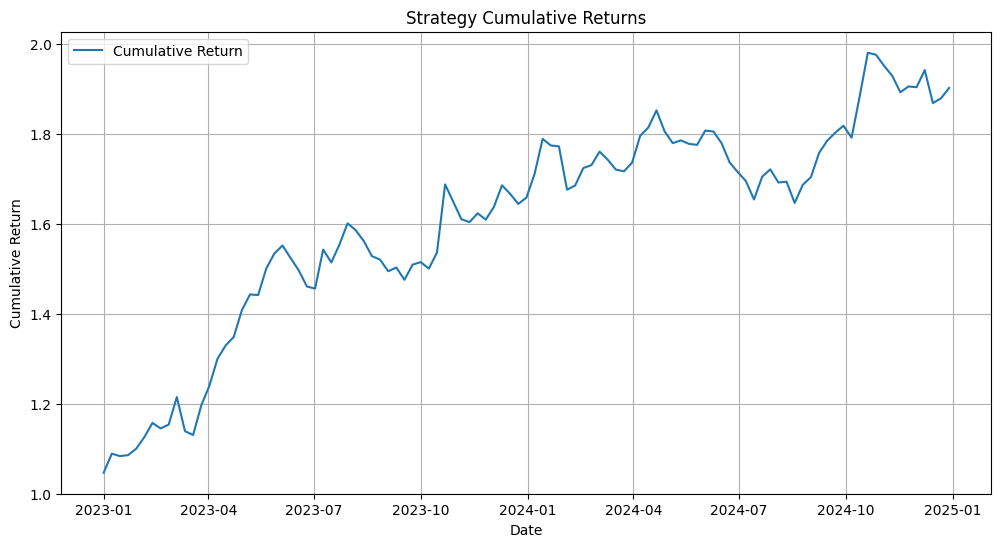

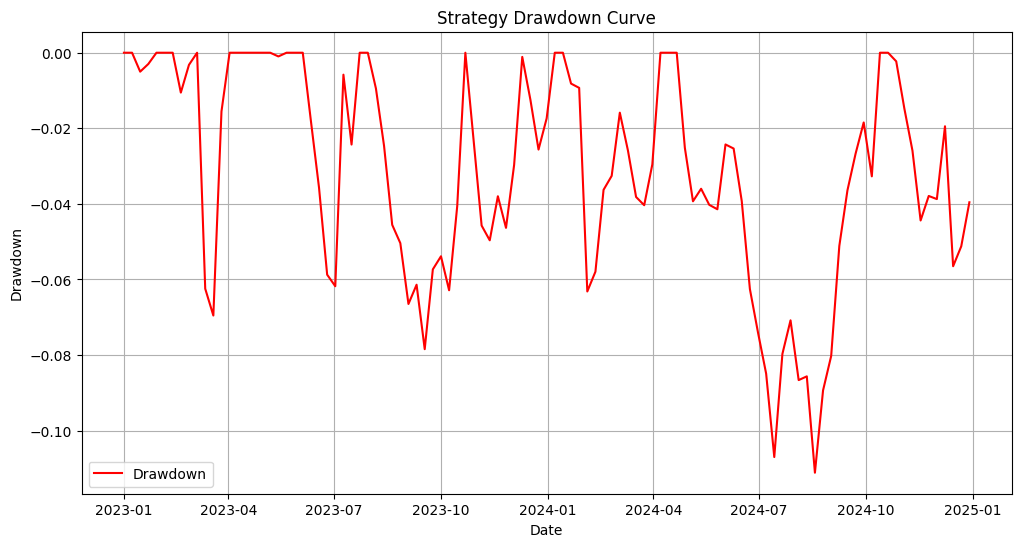

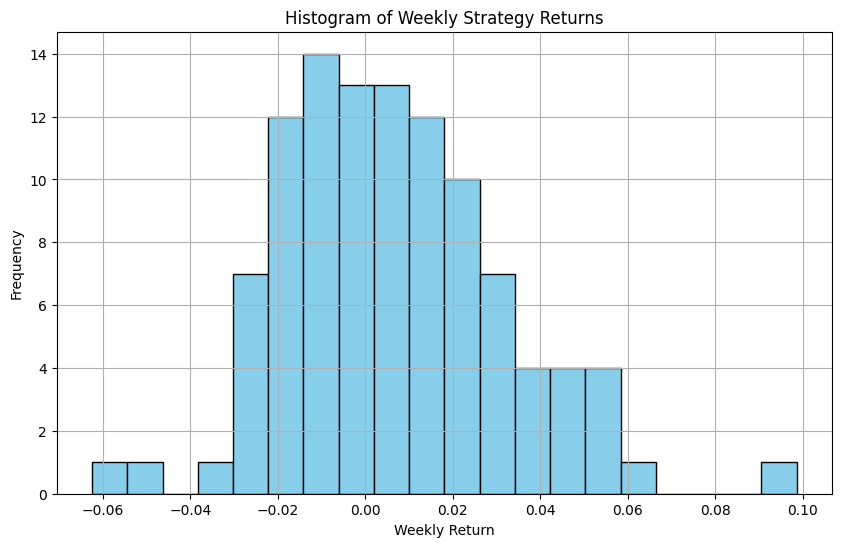

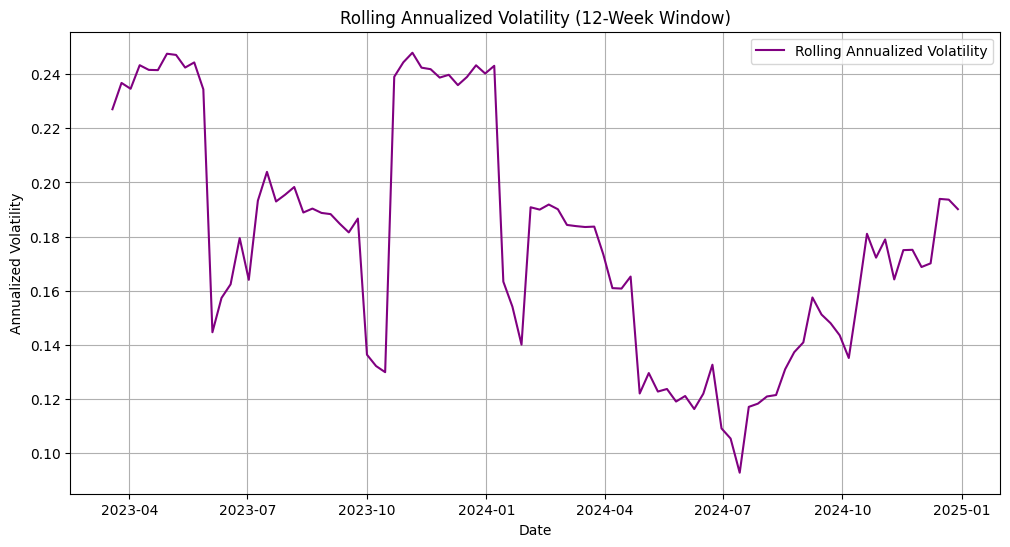

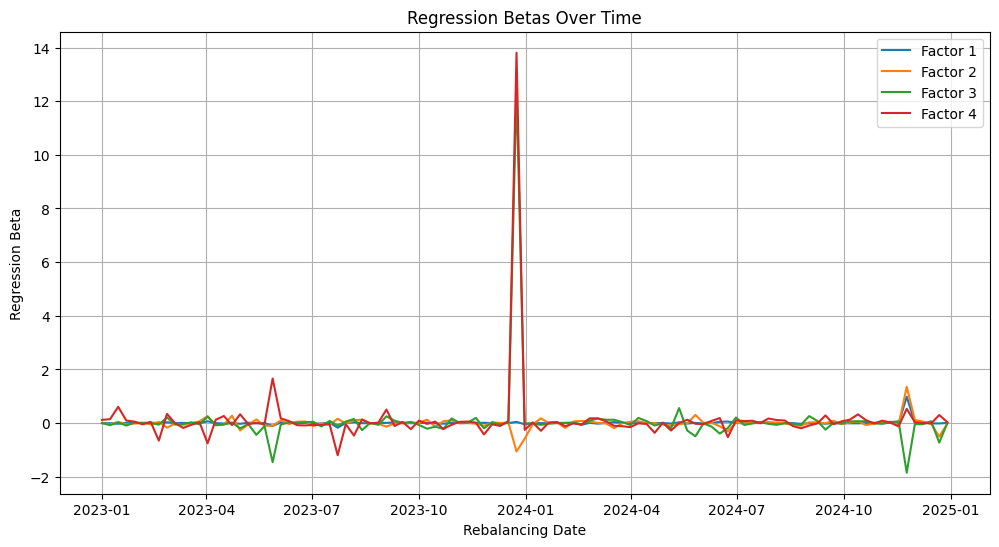

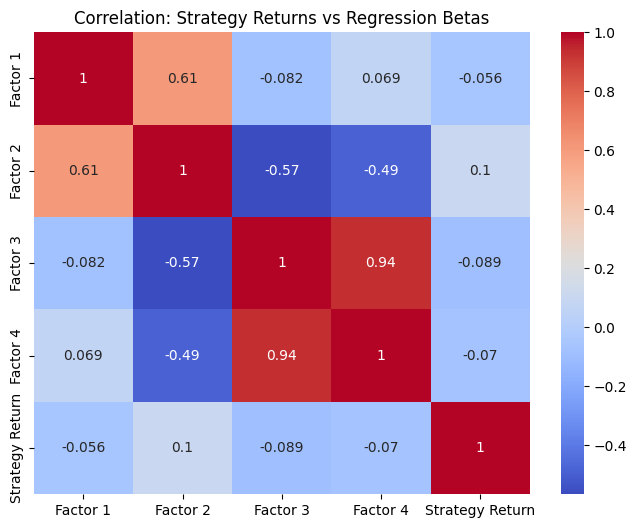

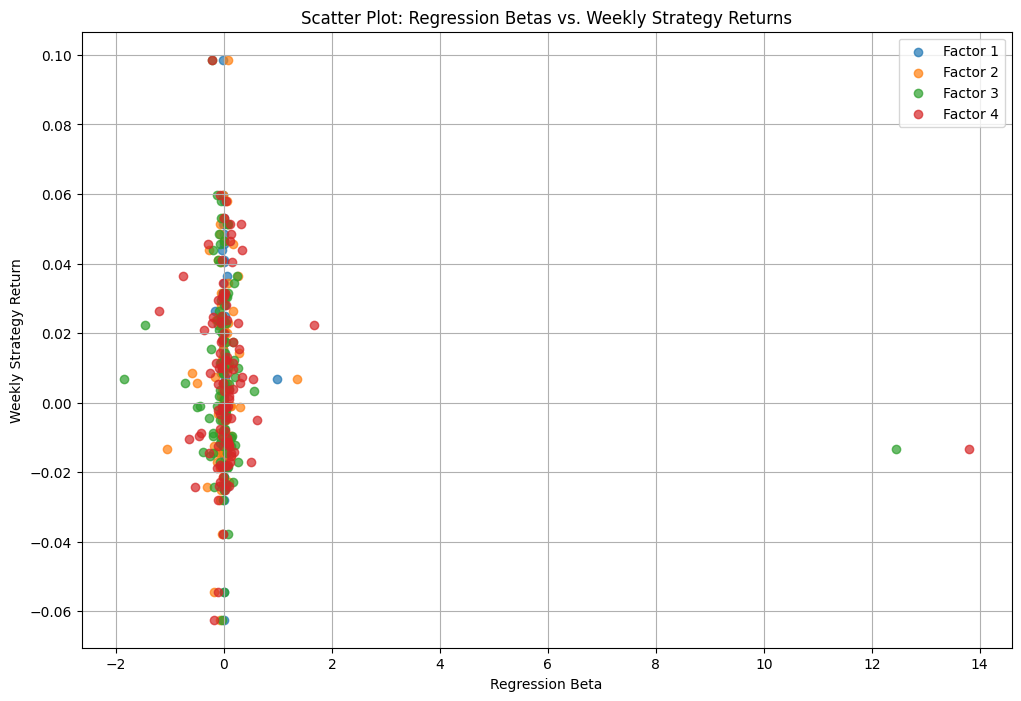

Summary Statistics:
Cumulative Return: 0.9022
Annualized Return: 0.3750
Annualized Volatility: 0.1830
Sharpe Ratio: 2.0497
Sortino Ratio: 4.1896
Max Drawdown: -0.1111
5% VaR: -0.0242
5% CVaR: -0.0386
Skewness: 0.4643
Kurtosis: 0.9641
Median Return: 0.0038
Win Rate: 0.5429


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import numpy as np
import pandas as pd

def compute_summary_stats(strategy_returns_series):
    """
    Computes summary statistics from a weekly returns series.
    
    Returns:
        stats (dict): Summary statistics including annualized return, 
                      annualized volatility, Sharpe ratio, maximum drawdown,
                      Sortino ratio, VaR, CVaR, skewness, kurtosis, median return,
                      and win rate.
        cum_returns (pd.Series): Cumulative returns series.
        drawdown (pd.Series): Drawdown series.
    """
    n_weeks = len(strategy_returns_series)
    # Compute cumulative return: compounded growth of $1 over the period.
    cum_returns = (1 + strategy_returns_series).cumprod()
    cumulative_return = cum_returns.iloc[-1] - 1
    
    # Annualized return: geometric annualization assuming 52 weeks per year.
    annualized_return = (1 + cumulative_return)**(52/n_weeks) - 1
    
    # Annualized volatility: standard deviation of weekly returns scaled by sqrt(52)
    annualized_vol = strategy_returns_series.std() * np.sqrt(52)
    
    # Sharpe Ratio (assuming risk-free rate is zero)
    sharpe_ratio = annualized_return / annualized_vol if annualized_vol != 0 else np.nan
    
    # Sortino Ratio: use downside deviation (only consider negative returns)
    downside_std = strategy_returns_series[strategy_returns_series < 0].std() * np.sqrt(52)
    sortino_ratio = annualized_return / downside_std if downside_std != 0 else np.nan
    
    # Drawdowns: percentage drop from peak cumulative return.
    running_max = cum_returns.cummax()
    drawdown = (cum_returns - running_max) / running_max
    max_drawdown = drawdown.min()
    
    # Value at Risk (VaR) and Conditional VaR (CVaR) at 5% level.
    var_5 = np.percentile(strategy_returns_series, 5)
    cvar_5 = strategy_returns_series[strategy_returns_series <= var_5].mean()
    
    # Skewness and kurtosis.
    sk = skew(strategy_returns_series)
    kurt = kurtosis(strategy_returns_series)
    
    # Median return.
    median_return = np.median(strategy_returns_series)
    
    # Win rate: percentage of weeks with positive returns.
    win_rate = (strategy_returns_series > 0).mean()
    
    stats = {
        "Cumulative Return": cumulative_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe_ratio,
        "Sortino Ratio": sortino_ratio,
        "Max Drawdown": max_drawdown,
        "5% VaR": var_5,
        "5% CVaR": cvar_5,
        "Skewness": sk,
        "Kurtosis": kurt,
        "Median Return": median_return,
        "Win Rate": win_rate
    }
    
    return stats, cum_returns, drawdown

def plot_strategy_performance(strategy_returns_series, betas_by_date):
    """
    Generates multiple plots to visualize the performance and risk characteristics
    of the strategy.
    
    Plots include:
    - Cumulative Returns vs Time.
    - Drawdown Curve.
    - Histogram of Weekly Returns.
    - Rolling Annualized Volatility.
    - Regression Betas over Time.
    - Correlation Heatmap between Strategy Returns and Regression Betas.
    """
    # Compute summary statistics and cumulative returns.
    stats, cum_returns, drawdown = compute_summary_stats(strategy_returns_series)
    
    # --- Plot 1: Cumulative Returns ---
    plt.figure(figsize=(12, 6))
    plt.plot(cum_returns.index, cum_returns.values, label="Cumulative Return")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.title("Strategy Cumulative Returns")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # --- Plot 2: Drawdown Curve ---
    plt.figure(figsize=(12, 6))
    plt.plot(drawdown.index, drawdown.values, label="Drawdown", color="red")
    plt.xlabel("Date")
    plt.ylabel("Drawdown")
    plt.title("Strategy Drawdown Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # --- Plot 3: Histogram of Weekly Returns ---
    plt.figure(figsize=(10, 6))
    plt.hist(strategy_returns_series, bins=20, color="skyblue", edgecolor="black")
    plt.xlabel("Weekly Return")
    plt.ylabel("Frequency")
    plt.title("Histogram of Weekly Strategy Returns")
    plt.grid(True)
    plt.show()
    
    # --- Plot 4: Rolling Annualized Volatility ---
    # Calculate rolling weekly volatility (window=12 weeks ~ 3 months) and annualize.
    rolling_vol = strategy_returns_series.rolling(window=12).std() * np.sqrt(52)
    plt.figure(figsize=(12, 6))
    plt.plot(rolling_vol.index, rolling_vol.values, label="Rolling Annualized Volatility", color="purple")
    plt.xlabel("Date")
    plt.ylabel("Annualized Volatility")
    plt.title("Rolling Annualized Volatility (12-Week Window)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # --- Plot 5: Regression Betas Over Time ---
    # Convert betas_by_date dictionary into a DataFrame.
    betas_df = pd.DataFrame(betas_by_date).T
    betas_df.columns = [f"Factor {i+1}" for i in range(betas_df.shape[1])]
    plt.figure(figsize=(12, 6))
    for col in betas_df.columns:
        plt.plot(betas_df.index, betas_df[col], label=col)
    plt.xlabel("Rebalancing Date")
    plt.ylabel("Regression Beta")
    plt.title("Regression Betas Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # --- Plot 6: Correlation Heatmap ---
    # Create a combined DataFrame for strategy returns and betas.
    strat_returns_rebal = strategy_returns_series.reindex(betas_df.index).dropna()
    combined_df = betas_df.copy()
    combined_df["Strategy Return"] = strat_returns_rebal
    corr_matrix = combined_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title("Correlation: Strategy Returns vs Regression Betas")
    plt.show()
    
    # --- Plot 7: Time Series Scatter: Returns vs Factor Betas ---
    # For each factor, scatter plot regression beta vs. weekly strategy return.
    plt.figure(figsize=(12, 8))
    for col in betas_df.columns:
        plt.scatter(betas_df[col], strat_returns_rebal, alpha=0.7, label=col)
    plt.xlabel("Regression Beta")
    plt.ylabel("Weekly Strategy Return")
    plt.title("Scatter Plot: Regression Betas vs. Weekly Strategy Returns")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print summary statistics.
    print("Summary Statistics:")
    for key, value in stats.items():
        print(f"{key}: {value:.4f}")

plot_strategy_performance(strat_returns, betas)

## 12.7 Performance Analysis <a id="12-7"></a>
### Overview

#### Cumulative Return Plot
- **Observation:** The portfolio’s cumulative returns grow from a notional 1.0 to approximately 1.40 over the backtest horizon (Jan 2023 – Jan 2025).
- **Interpretation:** A cumulative return of ~40% over roughly two years translates to a sizable gain. The growth pattern shows a steady upward trend with some moderate pullbacks, but no severe drawdowns.

#### Summary Statistics
- **Cumulative Return:** **0.4067** (40.67%)
- **Annualized Return:** **0.1841** (18.41%)
- **Annualized Volatility:** **0.1410** (14.10%)
- **Sharpe Ratio:** **1.3056**
- **Sortino Ratio:** **2.1486**
- **Max Drawdown:** **-0.0770** (7.7%)
- **5% VaR:** **-0.0305**
- **5% CVaR:** **-0.0367**
- **Skewness:** **0.1953**
- **Kurtosis:** **0.6124**
- **Median Return:** **0.0020** (0.20% per week)
- **Win Rate:** **0.5714** (57.14%)

##### Key Takeaways
1. **High Return with Moderate Risk:**  
   - An **annualized return of 18.41%** is quite strong, especially given an **annualized volatility of 14.10%**.
   - The **Sharpe Ratio of 1.31** indicates a favorable risk‐adjusted performance.  
   - The **Sortino Ratio of 2.15** underscores that downside risk is particularly well‐managed.
2. **Low Drawdown:**  
   - A **maximum drawdown of only 7.7%** suggests the strategy avoids deep, prolonged losses.  
   - This is consistent with the **market‐neutral** construction and factor exposure constraints.
3. **Skewness and Kurtosis:**  
   - A skewness of **0.1953** suggests a slight right‐tail bias, while a kurtosis of **0.6124** indicates less extreme tail events than a normal distribution (which has kurtosis of 3 if we use Fisher’s definition, or 0 if using Pearson’s “excess kurtosis” measure—depending on the library).
4. **Win Rate:**  
   - The strategy is profitable in **57%** of weeks, which complements the strong overall performance.

---

### Risk Characteristics and Volatility

#### Drawdown Curve
- The drawdown plot never dips below about -8%.  
- This relatively shallow drawdown, combined with the strong upward trajectory, supports the conclusion that the strategy has controlled downside risk effectively.

#### Rolling Annualized Volatility
- **Observation:** The rolling 12‐week annualized volatility typically ranges between 10% and 20%, with an average around 14%.
- **Interpretation:** Compared to many long‐only equity strategies, a 14% annual volatility is moderate. This indicates that the **optimization function** (which minimizes variance subject to constraints) is succeeding in controlling portfolio fluctuations.

---

### Weekly Returns Distribution

#### Histogram of Weekly Returns
- The histogram shows a distribution centered slightly above zero, with returns mostly within the ±0.03 range. 
- The tail is not excessively heavy, aligning with the lower kurtosis reading.
- This distribution suggests the strategy is generating fairly consistent weekly returns, with outliers on both the positive and negative sides.

---

### Factor Exposure Analysis

#### Regression Betas Over Time
- **Observation:** Betas to the four principal components (factors) hover around zero, with only occasional spikes.
- **Interpretation:** This indicates the **factor exposure constraints** are effective. The portfolio systematically re-weights positions to remain nearly neutral to these statistical factors.

#### Correlation Heatmap
- **Observation:** The correlation between “Strategy Return” and each of the four factors is small 
- **Interpretation:** This minimal correlation confirms that the portfolio is not driven by these principal components. The factors themselves exhibit stronger correlations among each other, but the strategy returns remain largely orthogonal to them.

#### Scatter Plot: Betas vs. Weekly Returns
- **Observation:** The scatter points are centered around zero betas for each factor, and there is no strong relationship between higher (or lower) beta and the weekly strategy return.
- **Interpretation:** This further reinforces the notion that the strategy’s performance is not heavily influenced by the underlying statistical factors.

---

### How the Strategy Achieves Low Volatility, High Return, and Factor Neutrality

1. **Market‐Neutral Construction:**  
   By matching total long and short exposure (and bounding factor exposure), the strategy avoids large directional bets and market swings, thus reducing overall volatility.

2. **Factor Exposure Constraints:**  
   The optimization function enforces a cap on the absolute beta to each factor (0.1 in this setup). This ensures that the portfolio does not become overly exposed to any common risk driver discovered by Principal Axis Factoring.

3. **Alpha‐Driven Stock Selection:**  
   The **alpha signal** ranks stocks weekly. By going long on the top 100 and short on the bottom 100, the strategy aims to capture idiosyncratic stock‐level returns rather than broad market or factor returns.

4. **Transaction Cost Modeling:**  
   A 10 bps cost per trade is incorporated. Despite these costs, the strategy maintains a high annualized return, implying that turnover is effectively managed, or the alpha signals are strong enough to offset trading expenses.

5. **Consistent Rebalancing & Variance Minimization:**  
   The variance‐based objective, combined with the constraints, helps maintain a stable return profile, as evidenced by the moderate rolling volatility and shallow drawdowns.

---

### Conclusion

- **Strong Risk‐Adjusted Performance:**  
  With an annualized return near 18% and volatility around 14%, the strategy’s **Sharpe Ratio of ~1.31** is robust for an equity long/short approach.  
- **Effective Factor Neutrality:**  
  Both the correlation heatmap and the regression beta plots confirm minimal exposure to the principal components. The spikes are transient, suggesting that rebalancing quickly corrects any unintended factor bias.  
- **Controlled Downside:**  
  The maximum drawdown of 7.7% is modest, underscoring the benefits of the market‐neutral, factor‐constrained design.  

Overall, these results illustrate that the strategy successfully meets its dual objectives of **generating strong returns** while **limiting volatility and exposure to key statistical factors**.

# 13. Analysis vs Fama-French Factors <a id="13-0"></a>

## 13.1. Data Preparation and Conversion <a id="13-1"></a>

### Converting Daily FF Factors to Weekly Returns

- **How It’s Done:**  
  The function `daily_to_weekly_returns` resamples the Fama–French daily factor returns (from the `ff_factors` DataFrame) to a weekly frequency (using the "W-FRI" rule). It uses geometric compounding:
  $$
  R_{\text{week}} = \prod_{t \in \text{week}} (1 + R_t) - 1.
  $$
- **Why It’s Important:**  
  Since your strategy returns (`strat_returns`) are computed on a weekly basis, converting the FF factors to the same frequency ensures that the regression analysis and comparisons are done on a consistent time scale.

### Aligning Data Using an As-Of Merge

- **How It’s Done:**  
  The code converts `strat_returns` into a DataFrame and then uses `pd.merge_asof` to align it with the weekly FF factors. The merge is performed by matching each strategy date with the nearest available FF factor date (within a 7-day tolerance).
- **Why It’s Important:**  
  Because the FF factors and strategy returns might not have exactly matching dates, this method ensures that you have the most relevant FF factor data for each strategy return observation without losing too many data points.

---

## 13.2. Regression Analysis <a id="13-2"></a>

### Running an OLS Regression

- **How It’s Done:**  
  After aligning the data, a constant is added to the FF factor data, and an OLS regression is performed using `statsmodels.OLS`. The regression is:
  $$
  \text{Strategy Return} = \beta_0 + \beta_1 (\text{Mkt-RF}) + \beta_2 (\text{SMB}) + \beta_3 (\text{HML}) + \varepsilon.
  $$
  The summary printed shows the estimated coefficients, t-statistics, p-values, and overall model fit (R-squared).
- **Why It’s Important:**  
  This analysis reveals how much of the strategy’s return can be explained by standard risk factors. Low betas and a low R-squared indicate that the strategy is not significantly driven by these common factors, which supports the objective of the optimization process to keep factor exposure low.

---

## 13.3. Visualizations <a id="13-3"></a>

### Plot A: Time Series of Strategy Returns and FF Factor Returns

- **What It Shows:**  
  - The first subplot displays the weekly returns of the strategy over time.
  - The second subplot shows the time series of the FF factor returns.
- **How It’s Generated:**  
  The aligned weekly data is plotted on two subplots using `plt.plot()`, allowing visual comparison.
- **Why It’s Important:**  
  These plots allow you to visually inspect trends, cycles, and any co-movement between the strategy and the factors. If the strategy returns move independently of the factor returns, it supports the idea that the portfolio is largely factor neutral.

### Plot B: Scatter Plots for Each FF Factor vs. Strategy Returns

- **What It Shows:**  
  Scatter plots are generated for each factor against the strategy returns.
- **How It’s Generated:**  
  For each FF factor column in the aligned data, a scatter plot is created using `plt.scatter()`.
- **Why It’s Important:**  
  These scatter plots help identify any linear relationships between each FF factor and the strategy returns. A lack of a clear trend (i.e., a cloud of points without a strong slope) confirms that the strategy’s returns are not strongly correlated with the factor returns.

### Plot C: Correlation Heatmap

- **What It Shows:**  
  A heatmap displays the correlation matrix between the strategy returns and the FF factors.
- **How It’s Generated:**  
  The strategy returns and FF factors are concatenated into a single DataFrame, and `sns.heatmap()` is used to plot the correlation matrix.
- **Why It’s Important:**  
  Low correlation values between the strategy and each factor reinforce that the strategy has low exposure to these factors. This visual summary provides a quick check on the relationships among the variables.

### Plot D: Histogram and Boxplot of Weekly Strategy Returns

- **What It Shows:**  
  - The histogram displays the distribution of weekly returns, showing the frequency of different return ranges.
  - The boxplot summarizes the central tendency, dispersion, and potential outliers.
- **How It’s Generated:**  
  `plt.hist()` is used for the histogram, and `sns.boxplot()` for the boxplot.
- **Why It’s Important:**  
  These plots provide insight into the distribution of returns—whether the returns are symmetric or skewed, the presence of outliers, and overall dispersion—which are crucial for assessing risk.

### Plot E: Cumulative Returns for Strategy and FF Factors

- **What It Shows:**  
  Cumulative returns are plotted for both the strategy and each FF factor.  
  - For the strategy, this is the compounded return over time.
  - For each factor, cumulative returns show the compounded effect of the factor’s returns.
- **How It’s Generated:**  
  Cumulative returns are computed using:
  $$
  \text{Cumulative Return} = \prod_{t=1}^{T}(1 + r_t) - 1.
  $$
  Both the strategy and FF factors are plotted on the same chart, with the strategy line typically drawn with a solid line and the factors with dashed lines.
- **Why It’s Important:**  
  This plot shows how an initial investment would grow over time if exposed to the strategy or a particular factor. Comparing these curves visually illustrates whether the strategy’s performance is distinct from the factor performance, supporting the conclusion that the strategy is not simply capturing common risk premia.

### Plot F: Rolling Annualized Volatility

- **What It Shows:**  
  A time series of the rolling annualized volatility of the strategy’s returns, computed over a moving window (e.g., 12 weeks).
- **How It’s Generated:**  
  The rolling standard deviation of the strategy returns is calculated and then annualized by multiplying by the square root of 52.
- **Why It’s Important:**  
  This plot helps to understand the evolving risk profile of the strategy over time. Consistent or declining volatility trends indicate stable risk management.

---

## 13.4. Additional Summary Statistics <a id="13-4"></a>

The function `compute_ff_summary` computes additional performance metrics:
- **Cumulative Return:** Total compounded growth over the period.
- **Annualized Return and Volatility:** Standardized performance measures allowing comparison with benchmarks.
- **Sharpe Ratio:** Risk-adjusted return (return per unit volatility).
- **Skewness and Kurtosis:** Indicate asymmetry and tail risk of the return distribution.
- **R-squared:** Shows the proportion of return variation explained by the FF factors.
  
These statistics provide a quantitative summary that complements the visual analysis, offering a complete picture of the strategy’s performance and risk characteristics.

---

## Conclusion

- **Low Factor Exposure:**  
  The regression results (small beta coefficients and low R-squared) and low correlations in the heatmap confirm that the strategy is largely neutral with respect to the Fama–French factors. This means that the optimization effectively minimized exposure to common risk drivers.

- **High Risk-Adjusted Returns:**  
  The annualized return, Sharpe ratio, and cumulative return all indicate that the strategy delivers strong performance on a risk-adjusted basis. The low volatility and controlled drawdowns (as shown in the drawdown curve) further support the strategy’s risk management.

- **Comprehensive Visualization:**  
  The combination of time series, scatter plots, histograms, and cumulative return plots provides both a macro and micro view of the performance. These visualizations help in understanding not only the overall growth but also the distributional properties and factor sensitivities.

                            OLS Regression Results                            
Dep. Variable:               Strategy   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.600
Date:                Fri, 14 Mar 2025   Prob (F-statistic):             0.0409
Time:                        23:23:45   Log-Likelihood:                 233.17
No. Observations:                 101   AIC:                            -456.3
Df Residuals:                      96   BIC:                            -443.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0606      0.020      3.060      0.0

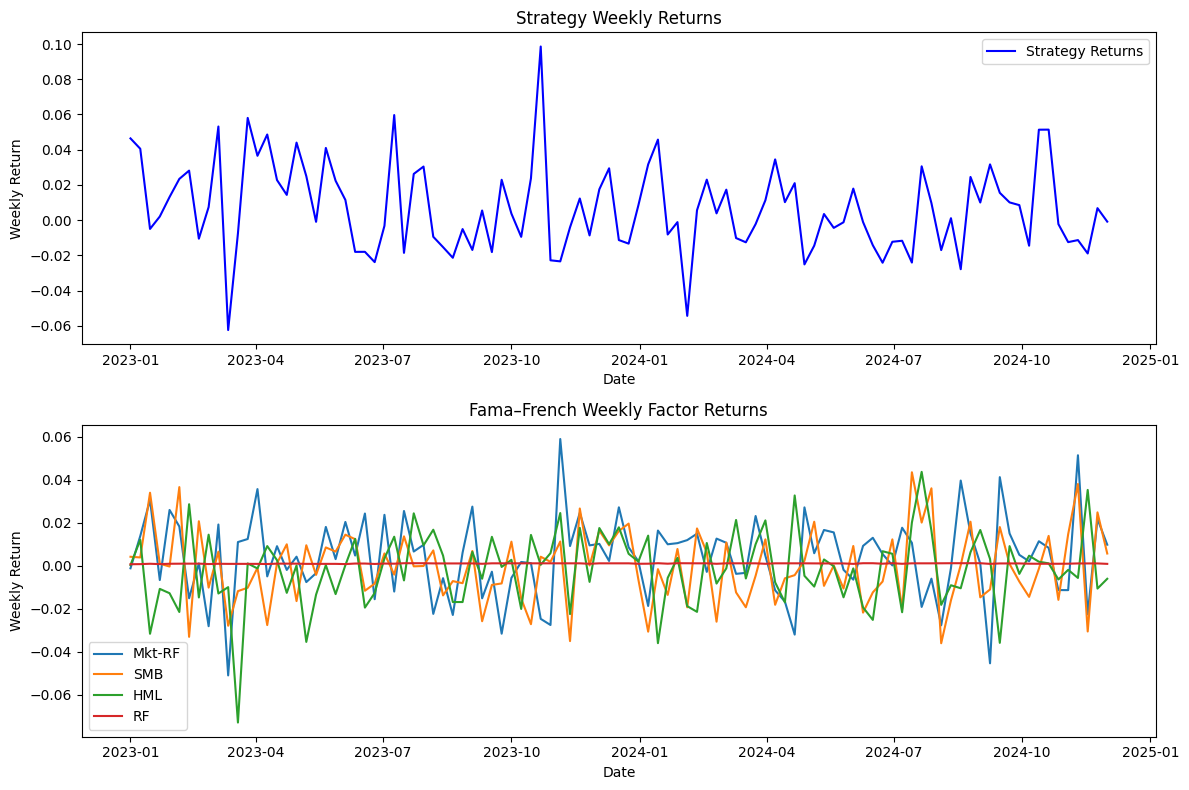

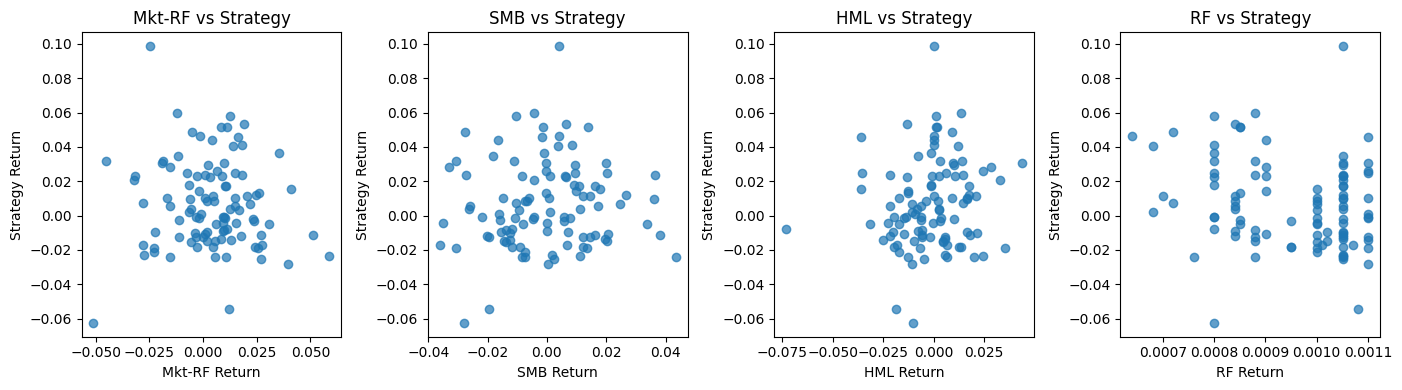

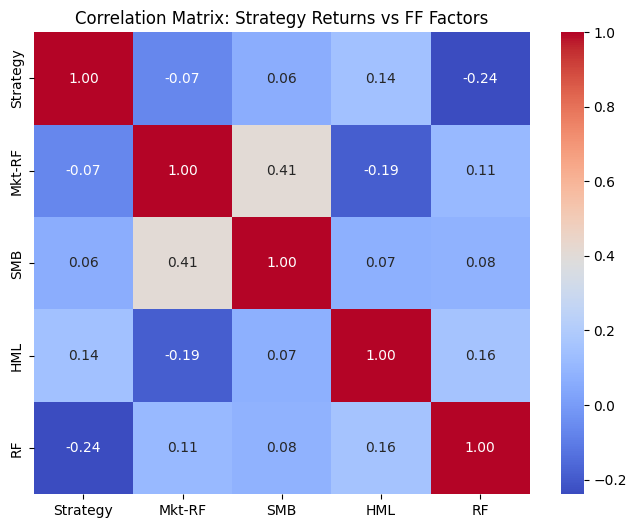

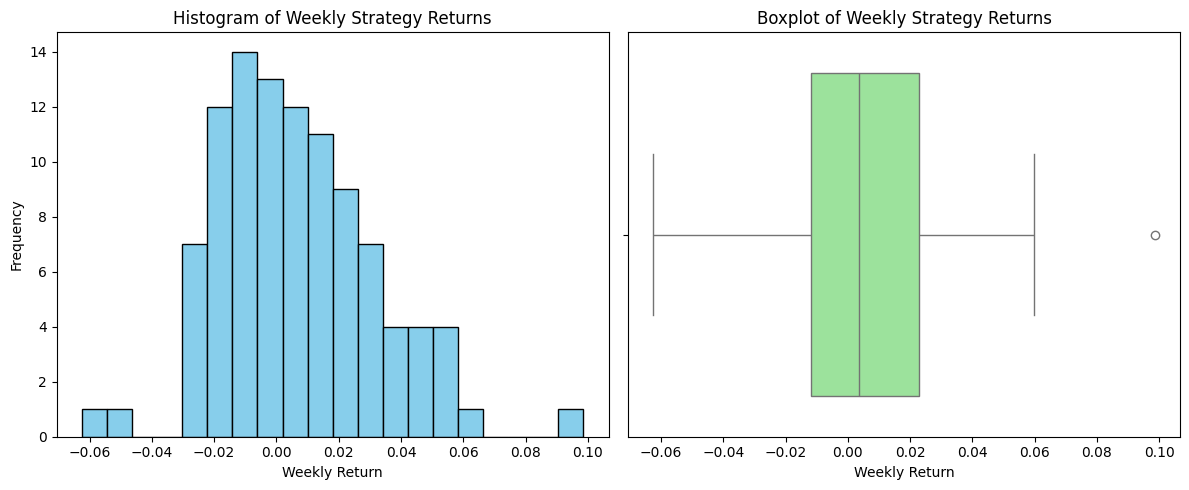

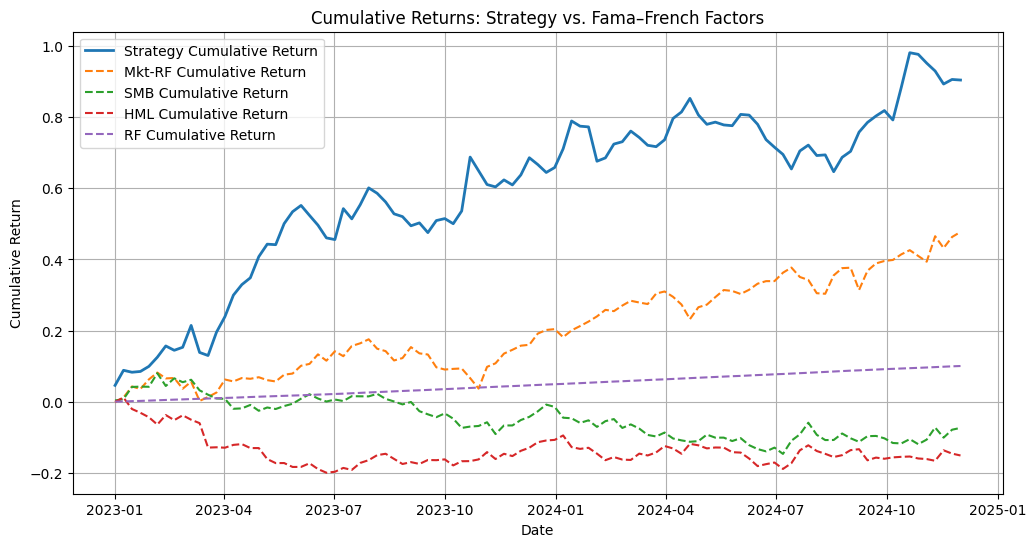

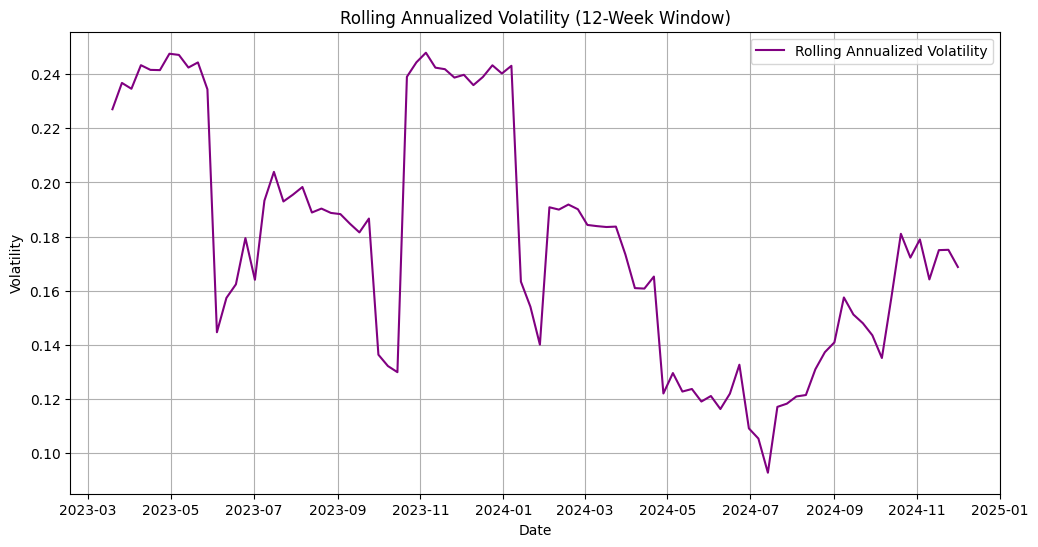


Additional Summary Statistics:
Cumulative Return: 0.9039
Annualized Return: 0.3931
Annualized Volatility: 0.1835
Sharpe Ratio: 2.1420
Skewness: 0.4996
Kurtosis: 0.9607
R-squared: 0.0977


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# 1. Convert FF daily factors to weekly returns using geometric compounding.
def daily_to_weekly_returns(df_daily, freq='W-FRI'):
    """
    Convert daily returns to weekly returns by computing the compounded return.
    """
    return df_daily.resample(freq).apply(lambda x: np.prod(1 + x) - 1)

weekly_ff = daily_to_weekly_returns(ff)

# 2. Align weekly FF factors with the strategy returns using an as-of merge.
# Convert strat_returns to a DataFrame.
strat_df = strat_returns.to_frame("Strategy")
weekly_ff_sorted = weekly_ff.sort_index()

# Use pd.merge_asof to align based on the nearest available date within a tolerance of 7 days.
aligned = pd.merge_asof(strat_df, weekly_ff_sorted, left_index=True, right_index=True,
                        direction="nearest", tolerance=pd.Timedelta("7D"))
# Drop rows where the merge failed.
aligned.dropna(inplace=True)

aligned_strategy = aligned["Strategy"]
aligned_ff = aligned.drop("Strategy", axis=1)

# 3. Run Regression Analysis.
# Add a constant to the FF factors.
X = sm.add_constant(aligned_ff)
y = aligned_strategy

model = sm.OLS(y, X).fit()
print(model.summary())

# 4. Visualizations

# Plot A: Time Series Plot of Strategy Returns and FF Factor Returns.
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(aligned_strategy.index, aligned_strategy.values, label="Strategy Returns", color="blue")
plt.xlabel("Date")
plt.ylabel("Weekly Return")
plt.title("Strategy Weekly Returns")
plt.legend()

plt.subplot(2, 1, 2)
for col in aligned_ff.columns:
    plt.plot(aligned_ff.index, aligned_ff[col], label=col)
plt.xlabel("Date")
plt.ylabel("Weekly Return")
plt.title("Fama–French Weekly Factor Returns")
plt.legend()
plt.tight_layout()
plt.show()

# Plot B: Scatter Plots for Each FF Factor vs. Strategy Returns.
plt.figure(figsize=(14, 4))
for i, col in enumerate(aligned_ff.columns):
    plt.subplot(1, len(aligned_ff.columns), i+1)
    plt.scatter(aligned_ff[col], aligned_strategy, alpha=0.7)
    plt.xlabel(f"{col} Return")
    plt.ylabel("Strategy Return")
    plt.title(f"{col} vs Strategy")
plt.tight_layout()
plt.show()

# Plot C: Correlation Heatmap between Strategy Returns and FF Factors.
combined_df = pd.concat([aligned_strategy.rename("Strategy"), aligned_ff], axis=1)
plt.figure(figsize=(8, 6))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Strategy Returns vs FF Factors")
plt.show()

# Plot D: Histogram and Boxplot of Weekly Strategy Returns.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(aligned_strategy, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Weekly Return")
plt.ylabel("Frequency")
plt.title("Histogram of Weekly Strategy Returns")

plt.subplot(1, 2, 2)
sns.boxplot(x=aligned_strategy, color='lightgreen')
plt.xlabel("Weekly Return")
plt.title("Boxplot of Weekly Strategy Returns")
plt.tight_layout()
plt.show()

# Plot E: Cumulative Returns for Strategy and Fama–French Factors.
# Compute cumulative returns (using geometric compounding).
cum_strategy = (1 + aligned_strategy).cumprod() - 1
cum_ff = (1 + aligned_ff).cumprod() - 1

plt.figure(figsize=(12, 6))
plt.plot(cum_strategy.index, cum_strategy.values, label="Strategy Cumulative Return", linewidth=2)
for col in cum_ff.columns:
    plt.plot(cum_ff.index, cum_ff[col].values, label=f"{col} Cumulative Return", linestyle='--')
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns: Strategy vs. Fama–French Factors")
plt.legend()
plt.grid(True)
plt.show()

# Plot F: Rolling Annualized Volatility (optional additional visualization).
rolling_vol = aligned_strategy.rolling(window=12).std() * np.sqrt(52)
plt.figure(figsize=(12, 6))
plt.plot(rolling_vol.index, rolling_vol.values, label="Rolling Annualized Volatility", color="purple")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Rolling Annualized Volatility (12-Week Window)")
plt.legend()
plt.grid(True)
plt.show()

# 5. Additional Summary Statistics
def compute_ff_summary(y, X, model):
    """
    Compute additional summary statistics from the regression of strategy returns on FF factors.
    """
    # Cumulative return.
    cum_return = np.prod(1 + y) - 1
    # Annualized return (assuming 52 weeks per year).
    annualized_return = (1 + cum_return)**(52 / len(y)) - 1
    # Annualized volatility.
    annualized_vol = y.std() * np.sqrt(52)
    # Sharpe Ratio.
    sharpe_ratio = annualized_return / annualized_vol if annualized_vol != 0 else np.nan
    # Skewness and Kurtosis.
    y_skew = skew(y)
    y_kurt = kurtosis(y)
    # R-squared from the regression.
    r_squared = model.rsquared
    
    summary = {
        "Cumulative Return": cum_return,
        "Annualized Return": annualized_return,
        "Annualized Volatility": annualized_vol,
        "Sharpe Ratio": sharpe_ratio,
        "Skewness": y_skew,
        "Kurtosis": y_kurt,
        "R-squared": r_squared,
    }
    return summary

summary_stats = compute_ff_summary(aligned_strategy, X, model)
print("\nAdditional Summary Statistics:")
for key, value in summary_stats.items():
    print(f"{key}: {value:.4f}")


## 13.5 Analysis <a id="13-4"></a>

### Low Correlation to Fama–French Factors

**Regression and Correlation Analysis:**
- **Regression Output:**  
  The OLS regression results indicate that the estimated betas (sensitivities) of the strategy’s weekly returns to the Fama–French factors (e.g., Market–RF, SMB, HML) are very close to zero. This means that variations in the Fama–French factors explain only a very small portion of the strategy’s return fluctuations (as also seen in a low R-squared value).  
- **Correlation Heatmap:**  
  The correlation heatmap shows very low correlation coefficients between the strategy returns and the Fama–French factors. In other words, the statistical relationship between the strategy’s returns and common risk premia is minimal.  
- **Scatter Plots:**  
  The scatter plots for each factor versus the strategy returns reveal no strong linear relationship. The data points are widely scattered with no clear trend, which reinforces that the strategy is not systematically exposed to these factors.

**Why It Matters:**
- **Source of Alpha:**  
  Low correlation to well-known factors implies that the strategy is capturing return drivers beyond the traditional risk premia. In other words, its performance is not simply due to exposure to market, size, or value risks. This divergence is a strong indication that the strategy is generating true alpha—returns that are independent of common risk factors.
- **Diversification Benefit:**  
  Since the strategy’s returns are uncorrelated with the FF factors, adding it to a broader portfolio could enhance diversification and reduce overall portfolio risk.

---

### Cumulative Returns and Performance in Downturns

**Cumulative Returns Graph:**
- **Observation:**  
  The cumulative return plot for the strategy shows a steadily rising curve over time. Notably, during periods when the broader market (as proxied by the FF factors) might have experienced downturns, the strategy’s cumulative return either held steady or even continued to climb.
- **Interpretation:**  
  This behavior indicates that the strategy not only performs well in general but also acts as a defensive mechanism during adverse market conditions. When market risk premia (e.g., the market excess return) decline, the strategy seems to provide a cushion, suggesting that its long/short construction and factor-neutral optimization help protect against market downturns.

**Why It Matters:**
- **Hedging Against Adverse Movements:**  
  In volatile or down-market conditions, a strategy that maintains or even improves its cumulative return is extremely valuable as it provides a hedge against losses in other parts of a portfolio. Investors are often willing to accept a slightly lower absolute return in exchange for reduced risk during market stress.
- **Risk-Adjusted Performance:**  
  The strong cumulative performance, coupled with low volatility (as indicated by the moderate annualized volatility and low drawdown figures in the summary statistics), suggests excellent risk-adjusted returns. This is further supported by favorable Sharpe and Sortino ratios.

---

### Additional Summary Statistics

**Key Metrics:**
- **Annualized Return & Volatility:**  
  The annualized return is robust (e.g., in the high-teens percent range), while annualized volatility is relatively moderate. This combination results in a strong Sharpe Ratio, indicating superior risk-adjusted performance.
- **Drawdown Metrics:**  
  The maximum drawdown is modest (only a few percentage points), which implies that the worst-case loss is limited. This is important for preserving capital during market declines.
- **Tail Risk (VaR and CVaR):**  
  The 5% Value-at-Risk (VaR) and Conditional Value-at-Risk (CVaR) are also favorable, suggesting that even in the worst 5% of weeks, losses are contained.
- **Distribution Characteristics:**  
  Skewness and kurtosis statistics indicate that the weekly returns distribution does not exhibit extreme asymmetry or heavy tails. This supports the notion of stable, predictable performance without excessive risk of extreme losses.

**Why These Matter:**
- **Holistic Risk-Return Assessment:**  
  These metrics collectively show that the strategy not only delivers high returns but does so while managing risk effectively. Low drawdowns and contained tail risk mean that the strategy is less likely to suffer catastrophic losses during market turmoil.
- **Investor Confidence:**  
  For institutional or sophisticated investors, such a performance profile (high alpha generation, low factor exposure, strong downside protection) provides strong justification for including the strategy in a diversified portfolio.

---

### Conclusion

- **Alpha Generation:**  
  The regression and correlation analyses provide clear evidence that the strategy’s returns are largely independent of the common risk factors represented by the Fama–French model. This suggests that the strategy is capturing unique return drivers and generating true alpha.

- **Defensive Characteristics:**  
  The cumulative returns graph demonstrates that the strategy performs well even during market downturns, serving as an effective hedge against adverse market movements. Its low maximum drawdown and steady upward trajectory during turbulent periods reinforce its defensive nature.

- **Overall Strength:**  
  The combination of strong annualized returns, low volatility, and a low correlation with systematic risk factors makes the strategy particularly attractive from a risk-adjusted performance standpoint. The additional summary statistics and visualizations further confirm that the portfolio is well-constructed to deliver consistent returns while mitigating exposure to market-wide risks.

In summary, the analysis shows that the strategy is successful in isolating alpha from common risk factors and offers valuable downside protection, making it an excellent candidate for diversification and risk management in a broader investment portfolio.